<a href="https://colab.research.google.com/github/MarcStorm/pommerman/blob/master/pommerman/AlexMathias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''An example to show how to set up an pommerman game programmatically'''
import time
import pommerman
from util import flatten_state
from pommerman import agents
from pommerman import constants as c
from pommerman.configs import ffa_v0_fast_env
from pommerman.envs.v0 import Pomme
from pommerman.characters import Bomber
from pommerman import utility
from pommerman import forward_model
from pommerman import constants

# Notebook 6.3
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class ReinforceModel(forward_model.ForwardModel):
    def __init__(self):
        super().__init__()
    
    @staticmethod
    def get_rewards(agents, game_type, step_count, max_steps):

        def any_lst_equal(lst, values):
            '''Checks if list are equal'''
            return any([lst == v for v in values])

        alive_agents = [num for num, agent in enumerate(agents) \
                        if agent.is_alive]
        if game_type == constants.GameType.FFA:
            if len(alive_agents) == 1:
                # An agent won. Give them +1, others -1.
                return [2 * int(agent.is_alive) - 1 for agent in agents]
            elif step_count >= max_steps:
                # Game is over from time. Everyone gets -1.
                return [-1] * 4
            else:
                # Game running: 0 for alive, -1 for dead.
                
                return [int(agent.is_alive) - 1 for agent in agents]


class NewAgent(agents.BaseAgent):
    """The Random Agent that returns random actions given an action_space."""

    def __init__(self, Character=Bomber, *args, **kwargs):
        super(NewAgent,self).__init__(Character,*args, **kwargs)
        self.seq = [c.Action.Right, c.Action.Up, c.Action.Left, c.Action.Down]
        self.index = 0
    
    def act(self, obs, action_space):
        if self.index == 4:
            self.index = 0
        action = self.seq[self.index]
        self.index += 1
        return 0
    
# Print all possible environments in the Pommerman registry
print(pommerman.REGISTRY)

# Instantiate the environment
config = ffa_v0_fast_env()
env = Pomme(**config["env_kwargs"])

# Create a set of agents (exactly four)
agent_list = [
    NewAgent(config["agent"](0, config["game_type"])),
    agents.SimpleAgent(config["agent"](1, config["game_type"])),
    agents.SimpleAgent(config["agent"](2, config["game_type"])),
    agents.RandomAgent(config["agent"](3, config["game_type"])),
    # agents.DockerAgent("pommerman/simple-agent", port=12345),
]

env.set_agents(agent_list)
env.set_training_agent(0) #<- Does not call act method on training agents in env.act
env.model = ReinforceModel()
env.set_init_game_state(None)

# Run the episodes just like OpenAI Gym
#for i_episode in range(1):
#    state = env.reset()
#    done = False
#    while not done:  
#        actions = env.act(state)
#        state, reward, done, info = env.step(actions)

        #Update


#    print('Episode {} finished'.format(i_episode))
#    print(info)
#time.sleep(2)
#env.close()

    

ModuleNotFoundError: ignored

In [2]:
!pip install 

  Could not find a version that satisfies the requirement pommerman (from versions: )
No matching distribution found for pommerman


## Notebook 6.3 Network and Train

In [0]:
class PolicyNet(nn.Module):
    """Policy network"""

    def __init__(self, n_inputs, n_hidden, n_outputs, learning_rate):
        super(PolicyNet, self).__init__()
        # network
        self.ffn = nn.Sequential(
            nn.Linear(n_inputs, n_hidden),
            nn.ReLU(),
            nn.Dropout(0.25),
            #nn.BatchNorm1d(n_hidden),
            nn.Linear(n_hidden, n_hidden),
            nn.ReLU(),
            nn.Dropout(0.25),
            #nn.BatchNorm1d(n_hidden),
            nn.Linear(n_hidden, n_hidden),
            nn.ReLU(),
            #nn.BatchNorm1d(n_hidden),
            nn.Linear(n_hidden, n_hidden),
            nn.ReLU(),
            nn.Dropout(0.25),
            #nn.BatchNorm1d(n_hidden),
            nn.Linear(n_hidden, n_outputs),
        )
        
        self.ffn.apply(self.init_weights)
        
        #self.hidden = nn.Linear(n_inputs, n_hidden)
        #self.hidden2 = nn.Linear(n_hidden, n_hidden)
        #self.out = nn.Linear(n_hidden, n_outputs)
        # training
        self.optimizer = optim.Adam(self.parameters(), lr=learning_rate)

    def forward(self, x):
        x = flatten_state(x)
        #print(x)
        #x = self.hidden(x)
        #x = F.relu(x)
        #x = F.relu(self.hidden2(x))
        #x = self.out(x)
        
        x = self.ffn(x)
        return F.softmax(x, dim=1)
    
    def loss(self, action_probabilities, returns):
        return -torch.mean(torch.mul(torch.log(action_probabilities), returns))
    
    def init_weights(m, *args):
        if type(m) == nn.Linear:
            torch.nn.init.xavier_uniform(m.weight)
            m.bias.data.fill_(0.01)
    
def compute_returns(rewards, discount_factor):
    """Compute discounted returns."""
    returns = np.zeros(len(rewards))
    returns[-1] = rewards[-1]
    for t in reversed(range(len(rewards)-1)):
        returns[t] = rewards[t] + discount_factor * returns[t+1]
    return returns

# Example:
# def forward(self, x):
#     x = flatten_state(x)
# where x is np.atleast1d(S[0])

# Flattens a state s on the form list<dict> where each dict contains information of a state
#def flatten_state(s):
    #print("\n Flatten: ",s)
#    return torch.from_numpy(np.array([flatten_state_aux(x) for x in s])).float()

#def flatten_state_aux(s):
    # Lists
    #print("\n Augs: ",s)
#    alive = [1 if x in s['alive'] else 0 for x in range(10,14)]
    #print(alive)
#    board = s['board']
#    bomb_blast_strength = s['bomb_blast_strength']
#    bomb_life = s['bomb_life']
    # Tuples
#    position = s['position']
    # Ints
#    blast_strength = s['blast_strength']
#    can_kick = s['can_kick']
#    ammo = s['ammo']
    # Enums
#    teammate = s['teammate'] #9 for FFA
#    enemies = s['enemies'] #11,12,13 for FFA and training agent id = 0
    
#    a = np.append(np.array(alive),np.array(board).flatten())
#    a = np.append(a,np.array(bomb_blast_strength).flatten())
#    a = np.append(a,np.array(bomb_life).flatten())
#    a = np.append(a,position[0])
#    a = np.append(a,position[1])
#    a = np.append(a,blast_strength)
#    a = np.append(a,can_kick)
#    a = np.append(a,ammo)
    # Commented out as we get size 376 but expected 372. I assume we calculated wrong.
    # Makes sense to ignore these imo
    #a = np.append(a,teammate.value)
    #a = np.append(a,[e.value for e in enemies])
    #print(np.shape(a))
#    return a.astype(float)
    

# training settings
n_inputs = 372
n_hidden = 500
n_outputs = env.action_space.n

num_episodes = 100
#rollout_limit = env.spec.timestep_limit # max rollout length
discount_factor = 0.9 # reward discount factor (gamma), 1.0 = no discount
learning_rate = 0.001 # you know this by now
val_freq = 25 # validation frequency

# setup policy network

policy = PolicyNet(n_inputs, n_hidden, n_outputs, learning_rate)

# train policy network

try:
    training_rewards, losses = [], []
    print('start training')
    for i in range(num_episodes):
        rollout = []
        s = env.reset()
        done = False
        #policy.train()
        while not done:
            # generate rollout by iteratively evaluating the current policy on the environment
            with torch.no_grad():
                a_prob = policy(np.atleast_1d(s[0]))
            a = (np.cumsum(a_prob.numpy()) > np.random.rand()).argmax() # sample action
            
            actions = env.act(s)
            actions.insert(0,a)
            
            #print(actions)
            
            s1, r, done, _ = env.step(actions)
            #print(r)
            rollout.append((s[0], a, r[0]))
            #print("\n\nrollout:",rollout,"\n\n")
            s = s1
        # prepare batch
        print('done with episode:',i)
        rollout = np.array(rollout)
        states = np.vstack(rollout[:,0])
        actions = np.vstack(rollout[:,1])
        rewards = np.array(rollout[:,2], dtype=float)
        returns = compute_returns(rewards, discount_factor)
        # policy gradient update
        policy.optimizer.zero_grad()
        a_probs = policy([s[0] for s in states]).gather(1, torch.from_numpy(actions)).view(-1)
        loss = policy.loss(a_probs, torch.from_numpy(returns).float())
        loss.backward()
        policy.optimizer.step()
        # bookkeeping
        training_rewards.append(sum(rewards))
        losses.append(loss.item())
        #policy.eval()
        # print
        if (i+1) % val_freq == 0:
            # validation
            validation_rewards = []
            for _ in range(10):
                s = env.reset()
                reward = 0
                done = False
                while not done:
                    #env.render()
                    with torch.no_grad():
                        probs = policy(np.atleast_1d(s[0]))
                        a = probs.argmax().item()
                        print(probs, "max actions: ", a,probs.argmax())
                        
                    actions = env.act(s)
                    actions.insert(0,a)
                    
                    s, r, done, _ = env.step(actions)
                    reward += r[0]
                validation_rewards.append(reward)
                #env.render(close=True)
            print('{:4d}. mean training reward: {:6.2f}, mean validation reward: {:6.2f}, mean loss: {:7.4f}'.format(i+1, np.mean(training_rewards[-val_freq:]), np.mean(validation_rewards), np.mean(losses[-val_freq:])))
    env.close()
    print('done')
except KeyboardInterrupt:
    print('interrupt')    

start training
done with episode: 0
done with episode: 1
done with episode: 2
done with episode: 3
done with episode: 4
done with episode: 5
done with episode: 6
done with episode: 7
done with episode: 8
done with episode: 9
done with episode: 10
done with episode: 11
done with episode: 12
done with episode: 13
done with episode: 14
done with episode: 15
done with episode: 16
done with episode: 17
done with episode: 18
done with episode: 19
done with episode: 20
done with episode: 21
done with episode: 22
done with episode: 23
done with episode: 24
tensor([[0.0091, 0.7202, 0.1144, 0.0120, 0.1050, 0.0392]]) max actions:  1 tensor(1)
tensor([[0.0009, 0.9337, 0.0282, 0.0010, 0.0309, 0.0053]]) max actions:  1 tensor(1)
tensor([[0.0005, 0.9649, 0.0140, 0.0004, 0.0163, 0.0039]]) max actions:  1 tensor(1)
tensor([[0.0016, 0.9373, 0.0212, 0.0011, 0.0360, 0.0029]]) max actions:  1 tensor(1)
tensor([[0.0010, 0.9239, 0.0229, 0.0013, 0.0467, 0.0041]]) max actions:  1 tensor(1)
tensor([[0.0016, 0.9

tensor([[0.0022, 0.8964, 0.0317, 0.0021, 0.0602, 0.0074]]) max actions:  1 tensor(1)
tensor([[0.0056, 0.7705, 0.0905, 0.0095, 0.0926, 0.0314]]) max actions:  1 tensor(1)
tensor([[0.0048, 0.8284, 0.0343, 0.0043, 0.1148, 0.0135]]) max actions:  1 tensor(1)
tensor([[0.0061, 0.8442, 0.0450, 0.0046, 0.0717, 0.0284]]) max actions:  1 tensor(1)
tensor([[0.0063, 0.8168, 0.0721, 0.0065, 0.0783, 0.0200]]) max actions:  1 tensor(1)
tensor([[0.0065, 0.8293, 0.0555, 0.0057, 0.0862, 0.0167]]) max actions:  1 tensor(1)
tensor([[0.0023, 0.8714, 0.0456, 0.0026, 0.0646, 0.0135]]) max actions:  1 tensor(1)
tensor([[0.0015, 0.9242, 0.0329, 0.0013, 0.0334, 0.0068]]) max actions:  1 tensor(1)
tensor([[0.0017, 0.8843, 0.0295, 0.0014, 0.0764, 0.0067]]) max actions:  1 tensor(1)
tensor([[0.0052, 0.8284, 0.0500, 0.0036, 0.0962, 0.0165]]) max actions:  1 tensor(1)
tensor([[0.0007, 0.9225, 0.0199, 0.0010, 0.0518, 0.0041]]) max actions:  1 tensor(1)
tensor([[0.0038, 0.8506, 0.0399, 0.0046, 0.0836, 0.0176]]) max ac

tensor([[0.0073, 0.8039, 0.0679, 0.0070, 0.0876, 0.0263]]) max actions:  1 tensor(1)
tensor([[0.0040, 0.8811, 0.0410, 0.0035, 0.0578, 0.0125]]) max actions:  1 tensor(1)
tensor([[0.0047, 0.8551, 0.0360, 0.0060, 0.0786, 0.0196]]) max actions:  1 tensor(1)
tensor([[0.0035, 0.8501, 0.0374, 0.0050, 0.0789, 0.0252]]) max actions:  1 tensor(1)
tensor([[0.0054, 0.8384, 0.0544, 0.0047, 0.0783, 0.0188]]) max actions:  1 tensor(1)
tensor([[0.0026, 0.8803, 0.0346, 0.0022, 0.0718, 0.0086]]) max actions:  1 tensor(1)
tensor([[0.0005, 0.9433, 0.0113, 0.0006, 0.0421, 0.0023]]) max actions:  1 tensor(1)
tensor([[0.0022, 0.9041, 0.0307, 0.0024, 0.0512, 0.0095]]) max actions:  1 tensor(1)
tensor([[0.0030, 0.8642, 0.0342, 0.0035, 0.0779, 0.0172]]) max actions:  1 tensor(1)
tensor([[0.0027, 0.8941, 0.0349, 0.0027, 0.0562, 0.0094]]) max actions:  1 tensor(1)
tensor([[0.0047, 0.8263, 0.0504, 0.0066, 0.0873, 0.0247]]) max actions:  1 tensor(1)
tensor([[0.0096, 0.7391, 0.0631, 0.0083, 0.1482, 0.0317]]) max ac

tensor([[0.0045, 0.8154, 0.0452, 0.0055, 0.1118, 0.0176]]) max actions:  1 tensor(1)
tensor([[0.0045, 0.8287, 0.0541, 0.0037, 0.0910, 0.0181]]) max actions:  1 tensor(1)
tensor([[0.0056, 0.8207, 0.0666, 0.0047, 0.0711, 0.0312]]) max actions:  1 tensor(1)
tensor([[0.0119, 0.7938, 0.0713, 0.0105, 0.0852, 0.0273]]) max actions:  1 tensor(1)
tensor([[0.0036, 0.8480, 0.0503, 0.0051, 0.0721, 0.0208]]) max actions:  1 tensor(1)
tensor([[0.0042, 0.8398, 0.0414, 0.0029, 0.0965, 0.0152]]) max actions:  1 tensor(1)
tensor([[0.0046, 0.8135, 0.0729, 0.0037, 0.0830, 0.0224]]) max actions:  1 tensor(1)
tensor([[0.0062, 0.7882, 0.0659, 0.0078, 0.0997, 0.0323]]) max actions:  1 tensor(1)
tensor([[0.0056, 0.8437, 0.0448, 0.0057, 0.0830, 0.0174]]) max actions:  1 tensor(1)
tensor([[0.0038, 0.8454, 0.0514, 0.0043, 0.0813, 0.0138]]) max actions:  1 tensor(1)
tensor([[0.0088, 0.8105, 0.0689, 0.0057, 0.0823, 0.0237]]) max actions:  1 tensor(1)
tensor([[0.0027, 0.8655, 0.0328, 0.0044, 0.0807, 0.0138]]) max ac

tensor([[0.0017, 0.9061, 0.0242, 0.0020, 0.0578, 0.0082]]) max actions:  1 tensor(1)
tensor([[0.0004, 0.9204, 0.0247, 0.0008, 0.0474, 0.0063]]) max actions:  1 tensor(1)
tensor([[0.0004, 0.9327, 0.0211, 0.0004, 0.0395, 0.0060]]) max actions:  1 tensor(1)
tensor([[0.0021, 0.7998, 0.0604, 0.0031, 0.1125, 0.0220]]) max actions:  1 tensor(1)
tensor([[0.0004, 0.9555, 0.0180, 0.0006, 0.0222, 0.0033]]) max actions:  1 tensor(1)
tensor([[0.0005, 0.8917, 0.0258, 0.0012, 0.0759, 0.0049]]) max actions:  1 tensor(1)
tensor([[0.0026, 0.8618, 0.0456, 0.0029, 0.0709, 0.0163]]) max actions:  1 tensor(1)
tensor([[0.0021, 0.8335, 0.0486, 0.0020, 0.0977, 0.0161]]) max actions:  1 tensor(1)
tensor([[0.0016, 0.9291, 0.0218, 0.0013, 0.0410, 0.0052]]) max actions:  1 tensor(1)
tensor([[0.0056, 0.8822, 0.0332, 0.0048, 0.0565, 0.0177]]) max actions:  1 tensor(1)
tensor([[0.0013, 0.8984, 0.0370, 0.0015, 0.0537, 0.0081]]) max actions:  1 tensor(1)
tensor([[0.0033, 0.8558, 0.0530, 0.0034, 0.0667, 0.0179]]) max ac

tensor([[0.0049, 0.7757, 0.0639, 0.0081, 0.1262, 0.0212]]) max actions:  1 tensor(1)
tensor([[0.0029, 0.8490, 0.0514, 0.0034, 0.0815, 0.0118]]) max actions:  1 tensor(1)
tensor([[0.0018, 0.9059, 0.0260, 0.0013, 0.0538, 0.0111]]) max actions:  1 tensor(1)
tensor([[0.0043, 0.8761, 0.0372, 0.0038, 0.0677, 0.0109]]) max actions:  1 tensor(1)
tensor([[0.0019, 0.8676, 0.0339, 0.0015, 0.0870, 0.0081]]) max actions:  1 tensor(1)
tensor([[0.0016, 0.9138, 0.0315, 0.0011, 0.0475, 0.0044]]) max actions:  1 tensor(1)
tensor([[0.0018, 0.8965, 0.0310, 0.0020, 0.0603, 0.0084]]) max actions:  1 tensor(1)
tensor([[0.0022, 0.8907, 0.0403, 0.0033, 0.0500, 0.0134]]) max actions:  1 tensor(1)
tensor([[0.0022, 0.8512, 0.0409, 0.0027, 0.0863, 0.0167]]) max actions:  1 tensor(1)
tensor([[0.0036, 0.7888, 0.0668, 0.0055, 0.1112, 0.0241]]) max actions:  1 tensor(1)
tensor([[0.0045, 0.8268, 0.0621, 0.0035, 0.0892, 0.0138]]) max actions:  1 tensor(1)
tensor([[0.0026, 0.8727, 0.0343, 0.0042, 0.0731, 0.0131]]) max ac

tensor([[0.0145, 0.6732, 0.0987, 0.0235, 0.1400, 0.0500]]) max actions:  1 tensor(1)
tensor([[0.0085, 0.7510, 0.0760, 0.0104, 0.1163, 0.0378]]) max actions:  1 tensor(1)
tensor([[0.0166, 0.6207, 0.1143, 0.0168, 0.1713, 0.0603]]) max actions:  1 tensor(1)
tensor([[0.0182, 0.6470, 0.1017, 0.0200, 0.1561, 0.0571]]) max actions:  1 tensor(1)
tensor([[0.0157, 0.7537, 0.0720, 0.0131, 0.1134, 0.0321]]) max actions:  1 tensor(1)
tensor([[0.0153, 0.7407, 0.0721, 0.0169, 0.1123, 0.0427]]) max actions:  1 tensor(1)
tensor([[0.0099, 0.7801, 0.0668, 0.0082, 0.1070, 0.0279]]) max actions:  1 tensor(1)
tensor([[0.0103, 0.7551, 0.0707, 0.0126, 0.1073, 0.0440]]) max actions:  1 tensor(1)
tensor([[0.0151, 0.6719, 0.0998, 0.0168, 0.1353, 0.0610]]) max actions:  1 tensor(1)
tensor([[0.0138, 0.7239, 0.0862, 0.0100, 0.1266, 0.0395]]) max actions:  1 tensor(1)
tensor([[0.0077, 0.7874, 0.0632, 0.0081, 0.1028, 0.0307]]) max actions:  1 tensor(1)
tensor([[0.0107, 0.7304, 0.0839, 0.0106, 0.1241, 0.0404]]) max ac

tensor([[0.0288, 0.6807, 0.0894, 0.0262, 0.1212, 0.0538]]) max actions:  1 tensor(1)
tensor([[0.0128, 0.6988, 0.0995, 0.0139, 0.1352, 0.0397]]) max actions:  1 tensor(1)
tensor([[0.0138, 0.7316, 0.0868, 0.0099, 0.1302, 0.0278]]) max actions:  1 tensor(1)
tensor([[0.0267, 0.6314, 0.1036, 0.0207, 0.1529, 0.0647]]) max actions:  1 tensor(1)
tensor([[0.0325, 0.5682, 0.1316, 0.0272, 0.1733, 0.0671]]) max actions:  1 tensor(1)
tensor([[0.0137, 0.6687, 0.1060, 0.0188, 0.1534, 0.0395]]) max actions:  1 tensor(1)
tensor([[0.0208, 0.6449, 0.1194, 0.0236, 0.1314, 0.0600]]) max actions:  1 tensor(1)
tensor([[0.0257, 0.6108, 0.1144, 0.0258, 0.1645, 0.0587]]) max actions:  1 tensor(1)
tensor([[0.0132, 0.7208, 0.0780, 0.0107, 0.1510, 0.0264]]) max actions:  1 tensor(1)
tensor([[0.0213, 0.6653, 0.0857, 0.0237, 0.1605, 0.0435]]) max actions:  1 tensor(1)
tensor([[0.0102, 0.7420, 0.1023, 0.0108, 0.1006, 0.0340]]) max actions:  1 tensor(1)
tensor([[0.0135, 0.7123, 0.0754, 0.0131, 0.1375, 0.0482]]) max ac

tensor([[0.0081, 0.7566, 0.0802, 0.0081, 0.1170, 0.0299]]) max actions:  1 tensor(1)
tensor([[0.0117, 0.7287, 0.0784, 0.0134, 0.1207, 0.0471]]) max actions:  1 tensor(1)
tensor([[0.0192, 0.6536, 0.0862, 0.0206, 0.1520, 0.0685]]) max actions:  1 tensor(1)
tensor([[0.0105, 0.7642, 0.0737, 0.0088, 0.1036, 0.0392]]) max actions:  1 tensor(1)
tensor([[0.0048, 0.8395, 0.0493, 0.0059, 0.0809, 0.0196]]) max actions:  1 tensor(1)
tensor([[0.0159, 0.6676, 0.0850, 0.0185, 0.1669, 0.0461]]) max actions:  1 tensor(1)
tensor([[0.0144, 0.7309, 0.0698, 0.0156, 0.1242, 0.0451]]) max actions:  1 tensor(1)
tensor([[0.0143, 0.7337, 0.0578, 0.0138, 0.1502, 0.0302]]) max actions:  1 tensor(1)
tensor([[0.0059, 0.8184, 0.0466, 0.0050, 0.1059, 0.0182]]) max actions:  1 tensor(1)
tensor([[0.0042, 0.8677, 0.0371, 0.0041, 0.0691, 0.0179]]) max actions:  1 tensor(1)
tensor([[0.0070, 0.7676, 0.0699, 0.0093, 0.1086, 0.0376]]) max actions:  1 tensor(1)
tensor([[0.0041, 0.8684, 0.0438, 0.0031, 0.0664, 0.0142]]) max ac

tensor([[0.0012, 0.8700, 0.0403, 0.0014, 0.0793, 0.0078]]) max actions:  1 tensor(1)
tensor([[0.0007, 0.9399, 0.0202, 0.0007, 0.0348, 0.0037]]) max actions:  1 tensor(1)
tensor([[0.0015, 0.8766, 0.0325, 0.0015, 0.0805, 0.0074]]) max actions:  1 tensor(1)
tensor([[0.0016, 0.9139, 0.0334, 0.0013, 0.0444, 0.0054]]) max actions:  1 tensor(1)
tensor([[0.0018, 0.9059, 0.0385, 0.0015, 0.0392, 0.0130]]) max actions:  1 tensor(1)
tensor([[0.0009, 0.8984, 0.0222, 0.0011, 0.0722, 0.0053]]) max actions:  1 tensor(1)
tensor([[0.0024, 0.8674, 0.0349, 0.0028, 0.0791, 0.0134]]) max actions:  1 tensor(1)
tensor([[0.0063, 0.8767, 0.0386, 0.0061, 0.0575, 0.0148]]) max actions:  1 tensor(1)
tensor([[0.0006, 0.9337, 0.0274, 0.0008, 0.0325, 0.0050]]) max actions:  1 tensor(1)
tensor([[0.0004, 0.9212, 0.0258, 0.0010, 0.0468, 0.0048]]) max actions:  1 tensor(1)
tensor([[0.0016, 0.8497, 0.0379, 0.0013, 0.0977, 0.0118]]) max actions:  1 tensor(1)
tensor([[0.0019, 0.8719, 0.0439, 0.0024, 0.0624, 0.0174]]) max ac

tensor([[0.0003, 0.9625, 0.0114, 0.0002, 0.0223, 0.0033]]) max actions:  1 tensor(1)
tensor([[0.0006, 0.9417, 0.0181, 0.0007, 0.0324, 0.0064]]) max actions:  1 tensor(1)
tensor([[0.0008, 0.9154, 0.0178, 0.0018, 0.0567, 0.0075]]) max actions:  1 tensor(1)
tensor([[0.0027, 0.8573, 0.0439, 0.0040, 0.0846, 0.0076]]) max actions:  1 tensor(1)
tensor([[0.0013, 0.9148, 0.0264, 0.0012, 0.0517, 0.0047]]) max actions:  1 tensor(1)
tensor([[0.0014, 0.8939, 0.0346, 0.0025, 0.0550, 0.0126]]) max actions:  1 tensor(1)
tensor([[0.0024, 0.8870, 0.0344, 0.0020, 0.0638, 0.0103]]) max actions:  1 tensor(1)
tensor([[0.0023, 0.9051, 0.0308, 0.0020, 0.0498, 0.0102]]) max actions:  1 tensor(1)
tensor([[0.0026, 0.8890, 0.0315, 0.0028, 0.0669, 0.0072]]) max actions:  1 tensor(1)
tensor([[0.0008, 0.9438, 0.0157, 0.0010, 0.0328, 0.0060]]) max actions:  1 tensor(1)
tensor([[0.0009, 0.8965, 0.0277, 0.0018, 0.0639, 0.0091]]) max actions:  1 tensor(1)
tensor([[0.0042, 0.8179, 0.0672, 0.0044, 0.0817, 0.0247]]) max ac

tensor([[0.0011, 0.9090, 0.0337, 0.0023, 0.0407, 0.0133]]) max actions:  1 tensor(1)
tensor([[0.0018, 0.8920, 0.0357, 0.0022, 0.0567, 0.0116]]) max actions:  1 tensor(1)
tensor([[0.0021, 0.9030, 0.0324, 0.0015, 0.0516, 0.0093]]) max actions:  1 tensor(1)
tensor([[0.0008, 0.9309, 0.0224, 0.0008, 0.0392, 0.0059]]) max actions:  1 tensor(1)
tensor([[0.0006, 0.9442, 0.0186, 0.0007, 0.0264, 0.0094]]) max actions:  1 tensor(1)
tensor([[0.0016, 0.9068, 0.0238, 0.0020, 0.0600, 0.0057]]) max actions:  1 tensor(1)
tensor([[0.0024, 0.8863, 0.0340, 0.0031, 0.0640, 0.0102]]) max actions:  1 tensor(1)
tensor([[0.0026, 0.8665, 0.0275, 0.0036, 0.0811, 0.0188]]) max actions:  1 tensor(1)
tensor([[0.0038, 0.8554, 0.0447, 0.0040, 0.0732, 0.0191]]) max actions:  1 tensor(1)
tensor([[0.0020, 0.8921, 0.0302, 0.0022, 0.0654, 0.0079]]) max actions:  1 tensor(1)
tensor([[0.0021, 0.9356, 0.0173, 0.0017, 0.0375, 0.0057]]) max actions:  1 tensor(1)
tensor([[0.0032, 0.8379, 0.0358, 0.0033, 0.1015, 0.0183]]) max ac

tensor([[0.0022, 0.8602, 0.0356, 0.0026, 0.0898, 0.0096]]) max actions:  1 tensor(1)
tensor([[0.0038, 0.8740, 0.0303, 0.0033, 0.0744, 0.0141]]) max actions:  1 tensor(1)
tensor([[0.0075, 0.8208, 0.0508, 0.0075, 0.0883, 0.0251]]) max actions:  1 tensor(1)
tensor([[0.0038, 0.8349, 0.0491, 0.0048, 0.0923, 0.0151]]) max actions:  1 tensor(1)
tensor([[0.0051, 0.8464, 0.0517, 0.0052, 0.0743, 0.0173]]) max actions:  1 tensor(1)
tensor([[0.0108, 0.7693, 0.0768, 0.0089, 0.1042, 0.0300]]) max actions:  1 tensor(1)
tensor([[0.0074, 0.7322, 0.0609, 0.0067, 0.1701, 0.0228]]) max actions:  1 tensor(1)
tensor([[0.0057, 0.8541, 0.0465, 0.0049, 0.0710, 0.0179]]) max actions:  1 tensor(1)
tensor([[0.0037, 0.8306, 0.0618, 0.0046, 0.0828, 0.0165]]) max actions:  1 tensor(1)
tensor([[0.0050, 0.8483, 0.0401, 0.0044, 0.0849, 0.0173]]) max actions:  1 tensor(1)
tensor([[0.0070, 0.8436, 0.0491, 0.0050, 0.0772, 0.0181]]) max actions:  1 tensor(1)
tensor([[0.0006, 0.9052, 0.0211, 0.0010, 0.0680, 0.0041]]) max ac

tensor([[0.0018, 0.8362, 0.0360, 0.0031, 0.1107, 0.0123]]) max actions:  1 tensor(1)
tensor([[0.0143, 0.6951, 0.1049, 0.0147, 0.1300, 0.0409]]) max actions:  1 tensor(1)
tensor([[0.0037, 0.8111, 0.0478, 0.0028, 0.1152, 0.0195]]) max actions:  1 tensor(1)
tensor([[0.0092, 0.7866, 0.0854, 0.0092, 0.0824, 0.0272]]) max actions:  1 tensor(1)
tensor([[0.0053, 0.7793, 0.0627, 0.0040, 0.1267, 0.0220]]) max actions:  1 tensor(1)
tensor([[0.0077, 0.8496, 0.0444, 0.0063, 0.0677, 0.0243]]) max actions:  1 tensor(1)
tensor([[0.0129, 0.6799, 0.0887, 0.0198, 0.1623, 0.0365]]) max actions:  1 tensor(1)
tensor([[0.0040, 0.8421, 0.0460, 0.0058, 0.0843, 0.0178]]) max actions:  1 tensor(1)
tensor([[0.0029, 0.8737, 0.0397, 0.0035, 0.0657, 0.0144]]) max actions:  1 tensor(1)
tensor([[0.0127, 0.7611, 0.0604, 0.0113, 0.1178, 0.0367]]) max actions:  1 tensor(1)
tensor([[0.0141, 0.6873, 0.0853, 0.0120, 0.1679, 0.0334]]) max actions:  1 tensor(1)
tensor([[0.0031, 0.8785, 0.0390, 0.0027, 0.0652, 0.0114]]) max ac

tensor([[0.0036, 0.8100, 0.0486, 0.0036, 0.1182, 0.0160]]) max actions:  1 tensor(1)
tensor([[0.0015, 0.8861, 0.0247, 0.0018, 0.0780, 0.0079]]) max actions:  1 tensor(1)
tensor([[0.0039, 0.8819, 0.0384, 0.0037, 0.0483, 0.0237]]) max actions:  1 tensor(1)
tensor([[0.0072, 0.7852, 0.0696, 0.0089, 0.0984, 0.0306]]) max actions:  1 tensor(1)
tensor([[0.0089, 0.8186, 0.0482, 0.0089, 0.0953, 0.0201]]) max actions:  1 tensor(1)
tensor([[0.0063, 0.7967, 0.0641, 0.0074, 0.0937, 0.0318]]) max actions:  1 tensor(1)
tensor([[0.0144, 0.7782, 0.0685, 0.0081, 0.1018, 0.0288]]) max actions:  1 tensor(1)
tensor([[0.0106, 0.6975, 0.0909, 0.0128, 0.1475, 0.0406]]) max actions:  1 tensor(1)
tensor([[0.0035, 0.8886, 0.0406, 0.0036, 0.0481, 0.0156]]) max actions:  1 tensor(1)
tensor([[0.0048, 0.8154, 0.0651, 0.0068, 0.0814, 0.0264]]) max actions:  1 tensor(1)
tensor([[0.0028, 0.8551, 0.0499, 0.0029, 0.0745, 0.0148]]) max actions:  1 tensor(1)
tensor([[0.0087, 0.7687, 0.0693, 0.0115, 0.1030, 0.0388]]) max ac

tensor([[0.0022, 0.9028, 0.0349, 0.0024, 0.0479, 0.0099]]) max actions:  1 tensor(1)
tensor([[0.0090, 0.7520, 0.0629, 0.0122, 0.1322, 0.0317]]) max actions:  1 tensor(1)
tensor([[0.0026, 0.8368, 0.0652, 0.0034, 0.0751, 0.0170]]) max actions:  1 tensor(1)
tensor([[0.0037, 0.8902, 0.0345, 0.0042, 0.0565, 0.0109]]) max actions:  1 tensor(1)
tensor([[0.0037, 0.8110, 0.0645, 0.0048, 0.0917, 0.0244]]) max actions:  1 tensor(1)
tensor([[0.0117, 0.7298, 0.0729, 0.0138, 0.1358, 0.0361]]) max actions:  1 tensor(1)
tensor([[0.0097, 0.7742, 0.0651, 0.0113, 0.1181, 0.0216]]) max actions:  1 tensor(1)
tensor([[0.0087, 0.7565, 0.0643, 0.0102, 0.1362, 0.0241]]) max actions:  1 tensor(1)
tensor([[0.0092, 0.7735, 0.0749, 0.0077, 0.1024, 0.0322]]) max actions:  1 tensor(1)
tensor([[0.0066, 0.7993, 0.0687, 0.0078, 0.0832, 0.0344]]) max actions:  1 tensor(1)
tensor([[0.0138, 0.7439, 0.0771, 0.0148, 0.1041, 0.0464]]) max actions:  1 tensor(1)
tensor([[0.0097, 0.6959, 0.1100, 0.0125, 0.1310, 0.0408]]) max ac

tensor([[0.0011, 0.9058, 0.0228, 0.0009, 0.0596, 0.0099]]) max actions:  1 tensor(1)
tensor([[0.0030, 0.8205, 0.0660, 0.0028, 0.0926, 0.0152]]) max actions:  1 tensor(1)
tensor([[0.0010, 0.9045, 0.0233, 0.0011, 0.0638, 0.0064]]) max actions:  1 tensor(1)
tensor([[0.0007, 0.9117, 0.0239, 0.0013, 0.0576, 0.0048]]) max actions:  1 tensor(1)
tensor([[0.0021, 0.9045, 0.0290, 0.0020, 0.0514, 0.0111]]) max actions:  1 tensor(1)
tensor([[0.0021, 0.8443, 0.0390, 0.0024, 0.0966, 0.0157]]) max actions:  1 tensor(1)
tensor([[0.0013, 0.9197, 0.0197, 0.0014, 0.0526, 0.0054]]) max actions:  1 tensor(1)
tensor([[0.0056, 0.7886, 0.0788, 0.0062, 0.0850, 0.0359]]) max actions:  1 tensor(1)
tensor([[0.0037, 0.8305, 0.0588, 0.0046, 0.0883, 0.0141]]) max actions:  1 tensor(1)
tensor([[0.0015, 0.9245, 0.0244, 0.0019, 0.0386, 0.0092]]) max actions:  1 tensor(1)
tensor([[0.0004, 0.9340, 0.0196, 0.0003, 0.0426, 0.0031]]) max actions:  1 tensor(1)
tensor([[0.0039, 0.8456, 0.0431, 0.0050, 0.0802, 0.0222]]) max ac

tensor([[0.0043, 0.8296, 0.0450, 0.0041, 0.1034, 0.0135]]) max actions:  1 tensor(1)
tensor([[0.0171, 0.6779, 0.0913, 0.0154, 0.1558, 0.0426]]) max actions:  1 tensor(1)
tensor([[0.0074, 0.8218, 0.0583, 0.0042, 0.0771, 0.0312]]) max actions:  1 tensor(1)
tensor([[0.0057, 0.8095, 0.0601, 0.0050, 0.1030, 0.0166]]) max actions:  1 tensor(1)
tensor([[0.0068, 0.8126, 0.0528, 0.0075, 0.0925, 0.0278]]) max actions:  1 tensor(1)
tensor([[0.0078, 0.7499, 0.0675, 0.0070, 0.1398, 0.0280]]) max actions:  1 tensor(1)
tensor([[0.0017, 0.9002, 0.0306, 0.0020, 0.0579, 0.0077]]) max actions:  1 tensor(1)
tensor([[0.0036, 0.7876, 0.0500, 0.0040, 0.1343, 0.0204]]) max actions:  1 tensor(1)
tensor([[0.0078, 0.7898, 0.0649, 0.0102, 0.0950, 0.0322]]) max actions:  1 tensor(1)
tensor([[0.0036, 0.8293, 0.0425, 0.0038, 0.1053, 0.0155]]) max actions:  1 tensor(1)
tensor([[0.0036, 0.8553, 0.0590, 0.0032, 0.0618, 0.0171]]) max actions:  1 tensor(1)
tensor([[0.0049, 0.8403, 0.0474, 0.0056, 0.0721, 0.0296]]) max ac

tensor([[0.0025, 0.8639, 0.0373, 0.0028, 0.0801, 0.0134]]) max actions:  1 tensor(1)
tensor([[0.0037, 0.8714, 0.0388, 0.0052, 0.0654, 0.0155]]) max actions:  1 tensor(1)
tensor([[0.0021, 0.8965, 0.0290, 0.0027, 0.0597, 0.0100]]) max actions:  1 tensor(1)
tensor([[0.0056, 0.8131, 0.0653, 0.0065, 0.0865, 0.0230]]) max actions:  1 tensor(1)
tensor([[0.0061, 0.8418, 0.0461, 0.0060, 0.0825, 0.0174]]) max actions:  1 tensor(1)
tensor([[0.0017, 0.8646, 0.0363, 0.0028, 0.0858, 0.0087]]) max actions:  1 tensor(1)
tensor([[0.0053, 0.8328, 0.0607, 0.0054, 0.0713, 0.0244]]) max actions:  1 tensor(1)
tensor([[0.0147, 0.6898, 0.0776, 0.0165, 0.1674, 0.0340]]) max actions:  1 tensor(1)
tensor([[0.0028, 0.8752, 0.0278, 0.0028, 0.0738, 0.0175]]) max actions:  1 tensor(1)
tensor([[0.0038, 0.8437, 0.0478, 0.0043, 0.0849, 0.0155]]) max actions:  1 tensor(1)
tensor([[0.0022, 0.8887, 0.0306, 0.0019, 0.0669, 0.0097]]) max actions:  1 tensor(1)
tensor([[0.0035, 0.8738, 0.0436, 0.0039, 0.0648, 0.0104]]) max ac

tensor([[0.0042, 0.8490, 0.0482, 0.0049, 0.0735, 0.0203]]) max actions:  1 tensor(1)
tensor([[0.0078, 0.8264, 0.0568, 0.0072, 0.0794, 0.0223]]) max actions:  1 tensor(1)
tensor([[0.0056, 0.8401, 0.0479, 0.0054, 0.0876, 0.0134]]) max actions:  1 tensor(1)
tensor([[0.0225, 0.7278, 0.0938, 0.0170, 0.0993, 0.0395]]) max actions:  1 tensor(1)
tensor([[0.0156, 0.7072, 0.1111, 0.0142, 0.1104, 0.0415]]) max actions:  1 tensor(1)
tensor([[0.0084, 0.7842, 0.0643, 0.0069, 0.1045, 0.0317]]) max actions:  1 tensor(1)
tensor([[0.0150, 0.7415, 0.0778, 0.0096, 0.1253, 0.0308]]) max actions:  1 tensor(1)
tensor([[0.0117, 0.7560, 0.0670, 0.0098, 0.1267, 0.0288]]) max actions:  1 tensor(1)
tensor([[0.0008, 0.9438, 0.0213, 0.0010, 0.0280, 0.0052]]) max actions:  1 tensor(1)
tensor([[0.0043, 0.8563, 0.0466, 0.0050, 0.0702, 0.0176]]) max actions:  1 tensor(1)
tensor([[0.0053, 0.8073, 0.0562, 0.0060, 0.1031, 0.0221]]) max actions:  1 tensor(1)
tensor([[0.0026, 0.8593, 0.0510, 0.0030, 0.0697, 0.0145]]) max ac

tensor([[0.0005, 0.9395, 0.0197, 0.0007, 0.0353, 0.0043]]) max actions:  1 tensor(1)
tensor([[0.0007, 0.9444, 0.0187, 0.0010, 0.0286, 0.0067]]) max actions:  1 tensor(1)
tensor([[0.0023, 0.8684, 0.0319, 0.0049, 0.0670, 0.0255]]) max actions:  1 tensor(1)
tensor([[0.0040, 0.8315, 0.0456, 0.0043, 0.0968, 0.0176]]) max actions:  1 tensor(1)
tensor([[0.0033, 0.8580, 0.0568, 0.0031, 0.0668, 0.0121]]) max actions:  1 tensor(1)
tensor([[0.0009, 0.9341, 0.0183, 0.0004, 0.0421, 0.0041]]) max actions:  1 tensor(1)
tensor([[0.0010, 0.9366, 0.0149, 0.0007, 0.0412, 0.0057]]) max actions:  1 tensor(1)
tensor([[0.0041, 0.8457, 0.0482, 0.0040, 0.0820, 0.0160]]) max actions:  1 tensor(1)
tensor([[0.0029, 0.8880, 0.0374, 0.0025, 0.0588, 0.0104]]) max actions:  1 tensor(1)
tensor([[0.0026, 0.8922, 0.0300, 0.0023, 0.0629, 0.0100]]) max actions:  1 tensor(1)
tensor([[0.0102, 0.7397, 0.0736, 0.0064, 0.1403, 0.0299]]) max actions:  1 tensor(1)
tensor([[0.0023, 0.8845, 0.0305, 0.0022, 0.0731, 0.0075]]) max ac

tensor([[0.0002, 0.9540, 0.0144, 0.0002, 0.0289, 0.0024]]) max actions:  1 tensor(1)
tensor([[0.0002, 0.9689, 0.0107, 0.0002, 0.0188, 0.0012]]) max actions:  1 tensor(1)
tensor([[0.0001, 0.9766, 0.0042, 0.0001, 0.0184, 0.0006]]) max actions:  1 tensor(1)
tensor([[0.0004, 0.9312, 0.0138, 0.0005, 0.0502, 0.0039]]) max actions:  1 tensor(1)
tensor([[0.0006, 0.9450, 0.0159, 0.0005, 0.0314, 0.0066]]) max actions:  1 tensor(1)
tensor([[0.0006, 0.9438, 0.0175, 0.0006, 0.0349, 0.0026]]) max actions:  1 tensor(1)
tensor([[0.0002, 0.9658, 0.0079, 0.0004, 0.0214, 0.0043]]) max actions:  1 tensor(1)
tensor([[0.0000, 0.9806, 0.0059, 0.0001, 0.0127, 0.0007]]) max actions:  1 tensor(1)
tensor([[0.0000, 0.9853, 0.0055, 0.0001, 0.0084, 0.0007]]) max actions:  1 tensor(1)
tensor([[0.0000, 0.9846, 0.0025, 0.0000, 0.0125, 0.0004]]) max actions:  1 tensor(1)
tensor([[0.0000, 0.9756, 0.0049, 0.0001, 0.0189, 0.0005]]) max actions:  1 tensor(1)
tensor([[0.0009, 0.9443, 0.0225, 0.0003, 0.0274, 0.0046]]) max ac

tensor([[0.0015, 0.8984, 0.0402, 0.0013, 0.0495, 0.0092]]) max actions:  1 tensor(1)
tensor([[0.0015, 0.9210, 0.0268, 0.0015, 0.0418, 0.0074]]) max actions:  1 tensor(1)
tensor([[0.0010, 0.9372, 0.0159, 0.0012, 0.0402, 0.0046]]) max actions:  1 tensor(1)
tensor([[0.0024, 0.8718, 0.0354, 0.0022, 0.0767, 0.0115]]) max actions:  1 tensor(1)
tensor([[0.0016, 0.9047, 0.0273, 0.0017, 0.0554, 0.0092]]) max actions:  1 tensor(1)
tensor([[0.0042, 0.8656, 0.0446, 0.0043, 0.0641, 0.0172]]) max actions:  1 tensor(1)
tensor([[0.0011, 0.8934, 0.0252, 0.0019, 0.0689, 0.0097]]) max actions:  1 tensor(1)
tensor([[0.0024, 0.8558, 0.0380, 0.0028, 0.0877, 0.0134]]) max actions:  1 tensor(1)
tensor([[0.0011, 0.9323, 0.0164, 0.0012, 0.0439, 0.0050]]) max actions:  1 tensor(1)
tensor([[0.0007, 0.9223, 0.0174, 0.0005, 0.0549, 0.0042]]) max actions:  1 tensor(1)
tensor([[0.0032, 0.8619, 0.0453, 0.0026, 0.0676, 0.0195]]) max actions:  1 tensor(1)
tensor([[0.0016, 0.9162, 0.0285, 0.0022, 0.0361, 0.0154]]) max ac

tensor([[0.0010, 0.9365, 0.0224, 0.0008, 0.0348, 0.0045]]) max actions:  1 tensor(1)
tensor([[0.0041, 0.8938, 0.0312, 0.0044, 0.0556, 0.0109]]) max actions:  1 tensor(1)
tensor([[0.0020, 0.8489, 0.0542, 0.0033, 0.0797, 0.0118]]) max actions:  1 tensor(1)
tensor([[0.0031, 0.8238, 0.0629, 0.0037, 0.0862, 0.0203]]) max actions:  1 tensor(1)
tensor([[0.0041, 0.8301, 0.0595, 0.0056, 0.0797, 0.0210]]) max actions:  1 tensor(1)
tensor([[0.0087, 0.7026, 0.1020, 0.0144, 0.1254, 0.0470]]) max actions:  1 tensor(1)
tensor([[0.0024, 0.8809, 0.0306, 0.0031, 0.0719, 0.0111]]) max actions:  1 tensor(1)
tensor([[0.0084, 0.7882, 0.0572, 0.0073, 0.1113, 0.0276]]) max actions:  1 tensor(1)
tensor([[0.0064, 0.8486, 0.0415, 0.0048, 0.0803, 0.0184]]) max actions:  1 tensor(1)
tensor([[0.0051, 0.8163, 0.0716, 0.0064, 0.0751, 0.0255]]) max actions:  1 tensor(1)
tensor([[0.0017, 0.8706, 0.0544, 0.0025, 0.0609, 0.0100]]) max actions:  1 tensor(1)
tensor([[0.0036, 0.8178, 0.0439, 0.0028, 0.1095, 0.0223]]) max ac

tensor([[0.0016, 0.8886, 0.0294, 0.0021, 0.0695, 0.0087]]) max actions:  1 tensor(1)
tensor([[0.0048, 0.8189, 0.0540, 0.0047, 0.1054, 0.0123]]) max actions:  1 tensor(1)
tensor([[0.0013, 0.9018, 0.0210, 0.0020, 0.0607, 0.0131]]) max actions:  1 tensor(1)
tensor([[0.0183, 0.6947, 0.1035, 0.0168, 0.1280, 0.0388]]) max actions:  1 tensor(1)
tensor([[0.0025, 0.8161, 0.0506, 0.0049, 0.1093, 0.0166]]) max actions:  1 tensor(1)
tensor([[0.0026, 0.8611, 0.0456, 0.0032, 0.0766, 0.0109]]) max actions:  1 tensor(1)
tensor([[0.0076, 0.7853, 0.0708, 0.0078, 0.1064, 0.0222]]) max actions:  1 tensor(1)
tensor([[0.0043, 0.8465, 0.0527, 0.0048, 0.0743, 0.0174]]) max actions:  1 tensor(1)
tensor([[0.0051, 0.8289, 0.0451, 0.0050, 0.0970, 0.0188]]) max actions:  1 tensor(1)
tensor([[0.0039, 0.8646, 0.0545, 0.0045, 0.0552, 0.0173]]) max actions:  1 tensor(1)
tensor([[0.0034, 0.8631, 0.0378, 0.0054, 0.0813, 0.0090]]) max actions:  1 tensor(1)
tensor([[0.0049, 0.8483, 0.0517, 0.0049, 0.0745, 0.0157]]) max ac

tensor([[0.0020, 0.8688, 0.0300, 0.0024, 0.0895, 0.0073]]) max actions:  1 tensor(1)
tensor([[0.0016, 0.9164, 0.0253, 0.0016, 0.0458, 0.0092]]) max actions:  1 tensor(1)
tensor([[0.0018, 0.8980, 0.0283, 0.0019, 0.0561, 0.0139]]) max actions:  1 tensor(1)
tensor([[0.0012, 0.9315, 0.0193, 0.0013, 0.0385, 0.0081]]) max actions:  1 tensor(1)
tensor([[0.0003, 0.9629, 0.0112, 0.0003, 0.0218, 0.0035]]) max actions:  1 tensor(1)
tensor([[0.0148, 0.7404, 0.0917, 0.0082, 0.1153, 0.0296]]) max actions:  1 tensor(1)
tensor([[0.0013, 0.8698, 0.0441, 0.0031, 0.0674, 0.0142]]) max actions:  1 tensor(1)
tensor([[0.0008, 0.8752, 0.0446, 0.0016, 0.0686, 0.0092]]) max actions:  1 tensor(1)
tensor([[0.0027, 0.8743, 0.0366, 0.0027, 0.0731, 0.0107]]) max actions:  1 tensor(1)
tensor([[0.0068, 0.8523, 0.0451, 0.0070, 0.0716, 0.0172]]) max actions:  1 tensor(1)
tensor([[0.0017, 0.8864, 0.0328, 0.0019, 0.0663, 0.0109]]) max actions:  1 tensor(1)
tensor([[0.0005, 0.9317, 0.0196, 0.0013, 0.0429, 0.0041]]) max ac

tensor([[0.0003, 0.9616, 0.0084, 0.0003, 0.0273, 0.0022]]) max actions:  1 tensor(1)
tensor([[0.0012, 0.9296, 0.0245, 0.0008, 0.0377, 0.0062]]) max actions:  1 tensor(1)
tensor([[0.0006, 0.9311, 0.0125, 0.0004, 0.0509, 0.0045]]) max actions:  1 tensor(1)
tensor([[0.0004, 0.9647, 0.0103, 0.0005, 0.0205, 0.0035]]) max actions:  1 tensor(1)
tensor([[0.0004, 0.9592, 0.0138, 0.0005, 0.0206, 0.0056]]) max actions:  1 tensor(1)
tensor([[0.0004, 0.9577, 0.0119, 0.0005, 0.0250, 0.0044]]) max actions:  1 tensor(1)
tensor([[0.0001, 0.9648, 0.0123, 0.0002, 0.0217, 0.0009]]) max actions:  1 tensor(1)
tensor([[0.0000, 0.9783, 0.0033, 0.0000, 0.0180, 0.0003]]) max actions:  1 tensor(1)
tensor([[0.0001, 0.9821, 0.0061, 0.0001, 0.0106, 0.0010]]) max actions:  1 tensor(1)
tensor([[0.0002, 0.9633, 0.0112, 0.0004, 0.0219, 0.0031]]) max actions:  1 tensor(1)
tensor([[0.0008, 0.9298, 0.0297, 0.0003, 0.0350, 0.0045]]) max actions:  1 tensor(1)
tensor([[0.0005, 0.8756, 0.0306, 0.0009, 0.0879, 0.0046]]) max ac

tensor([[0.0013, 0.9312, 0.0163, 0.0027, 0.0423, 0.0061]]) max actions:  1 tensor(1)
tensor([[0.0030, 0.8754, 0.0493, 0.0030, 0.0570, 0.0123]]) max actions:  1 tensor(1)
tensor([[0.0085, 0.7367, 0.0955, 0.0075, 0.1213, 0.0305]]) max actions:  1 tensor(1)
tensor([[0.0055, 0.8149, 0.0567, 0.0100, 0.0934, 0.0195]]) max actions:  1 tensor(1)
tensor([[0.0179, 0.7323, 0.0870, 0.0153, 0.1111, 0.0364]]) max actions:  1 tensor(1)
tensor([[0.0053, 0.8498, 0.0439, 0.0058, 0.0819, 0.0133]]) max actions:  1 tensor(1)
tensor([[0.0017, 0.8723, 0.0317, 0.0034, 0.0801, 0.0107]]) max actions:  1 tensor(1)
tensor([[0.0056, 0.7925, 0.0712, 0.0091, 0.0929, 0.0287]]) max actions:  1 tensor(1)
tensor([[0.0135, 0.7245, 0.0846, 0.0102, 0.1220, 0.0453]]) max actions:  1 tensor(1)
tensor([[0.0092, 0.7662, 0.0670, 0.0121, 0.1192, 0.0262]]) max actions:  1 tensor(1)
tensor([[0.0087, 0.7361, 0.0747, 0.0099, 0.1304, 0.0402]]) max actions:  1 tensor(1)
tensor([[0.0189, 0.7247, 0.0809, 0.0155, 0.1213, 0.0386]]) max ac

tensor([[4.0438e-12, 1.0000e+00, 1.5123e-09, 2.6236e-11, 3.5754e-06, 3.5577e-13]]) max actions:  1 tensor(1)
tensor([[1.3814e-14, 1.0000e+00, 6.3128e-11, 9.4041e-13, 5.4655e-08, 1.8227e-14]]) max actions:  1 tensor(1)
tensor([[4.6401e-13, 1.0000e+00, 3.8108e-10, 4.2182e-12, 1.1454e-06, 5.3191e-13]]) max actions:  1 tensor(1)
tensor([[1.0123e-14, 1.0000e+00, 2.4855e-11, 1.0193e-14, 9.5858e-08, 1.3777e-14]]) max actions:  1 tensor(1)
tensor([[4.8349e-15, 1.0000e+00, 3.5914e-12, 4.7079e-14, 2.7846e-08, 2.3974e-15]]) max actions:  1 tensor(1)
tensor([[3.8872e-14, 1.0000e+00, 3.1776e-11, 7.1508e-14, 4.1698e-08, 1.3739e-14]]) max actions:  1 tensor(1)
tensor([[1.2510e-13, 1.0000e+00, 3.5131e-10, 5.5433e-13, 1.8864e-07, 1.9154e-13]]) max actions:  1 tensor(1)
tensor([[4.4597e-13, 1.0000e+00, 4.5190e-10, 2.4718e-12, 2.4099e-06, 2.6412e-13]]) max actions:  1 tensor(1)
tensor([[1.8121e-11, 9.9999e-01, 8.8187e-10, 5.4039e-10, 1.2299e-05, 9.3775e-13]]) max actions:  1 tensor(1)
tensor([[2.1881e-12

tensor([[7.2783e-14, 1.0000e+00, 1.3189e-11, 1.4249e-13, 2.5441e-07, 4.5017e-15]]) max actions:  1 tensor(1)
tensor([[9.1660e-12, 1.0000e+00, 4.5099e-10, 5.4783e-11, 6.4724e-07, 5.4081e-13]]) max actions:  1 tensor(1)
tensor([[4.4987e-15, 1.0000e+00, 3.6596e-12, 3.6089e-14, 2.6342e-08, 6.1925e-16]]) max actions:  1 tensor(1)
tensor([[1.5819e-11, 1.0000e+00, 2.7366e-09, 9.1534e-11, 1.7720e-06, 6.9373e-12]]) max actions:  1 tensor(1)
tensor([[3.3142e-09, 9.9996e-01, 4.3924e-07, 5.8091e-09, 3.9862e-05, 2.5819e-09]]) max actions:  1 tensor(1)
tensor([[3.1810e-13, 1.0000e+00, 3.3748e-11, 2.6473e-13, 1.4057e-07, 3.5065e-14]]) max actions:  1 tensor(1)
tensor([[1.4422e-14, 1.0000e+00, 8.3127e-11, 1.3547e-12, 1.6936e-07, 6.0357e-14]]) max actions:  1 tensor(1)
tensor([[3.2564e-14, 1.0000e+00, 2.1267e-11, 4.3868e-13, 1.4584e-07, 5.5233e-15]]) max actions:  1 tensor(1)
tensor([[7.9933e-13, 1.0000e+00, 9.2171e-11, 7.1734e-13, 3.6970e-07, 1.6491e-14]]) max actions:  1 tensor(1)
tensor([[1.6779e-14

tensor([[2.8143e-11, 1.0000e+00, 6.6974e-09, 2.9933e-11, 1.2166e-06, 2.3882e-11]]) max actions:  1 tensor(1)
tensor([[8.4692e-13, 1.0000e+00, 1.4822e-10, 6.3808e-13, 2.1085e-06, 4.4225e-14]]) max actions:  1 tensor(1)
tensor([[2.8320e-14, 1.0000e+00, 3.3623e-11, 1.0707e-13, 6.3832e-08, 2.7169e-14]]) max actions:  1 tensor(1)
tensor([[8.6696e-13, 1.0000e+00, 1.3926e-10, 2.1720e-12, 8.8250e-07, 6.1220e-14]]) max actions:  1 tensor(1)
tensor([[1.2085e-11, 1.0000e+00, 1.5885e-09, 8.6658e-11, 3.1117e-06, 4.3191e-12]]) max actions:  1 tensor(1)
tensor([[1.0747e-10, 9.9996e-01, 6.6538e-09, 3.5393e-11, 3.8940e-05, 3.7815e-11]]) max actions:  1 tensor(1)
tensor([[2.0456e-12, 1.0000e+00, 3.4642e-10, 9.0150e-12, 2.6524e-07, 9.1648e-13]]) max actions:  1 tensor(1)
tensor([[1.8426e-13, 1.0000e+00, 1.0182e-11, 4.7331e-13, 1.0434e-07, 1.0591e-13]]) max actions:  1 tensor(1)
tensor([[5.1470e-16, 1.0000e+00, 2.1346e-12, 1.6069e-15, 1.5759e-08, 8.2290e-17]]) max actions:  1 tensor(1)
tensor([[3.8418e-12

tensor([[2.0131e-15, 1.0000e+00, 4.6661e-12, 8.8300e-14, 8.4541e-08, 1.5065e-15]]) max actions:  1 tensor(1)
tensor([[6.1448e-11, 9.9997e-01, 4.8254e-08, 3.2495e-09, 3.4744e-05, 1.4169e-10]]) max actions:  1 tensor(1)
tensor([[7.7326e-14, 1.0000e+00, 3.4663e-10, 7.1046e-13, 5.6486e-07, 1.1043e-14]]) max actions:  1 tensor(1)
tensor([[2.2964e-14, 1.0000e+00, 5.9505e-12, 9.2217e-14, 3.8691e-08, 1.6325e-15]]) max actions:  1 tensor(1)
tensor([[3.1657e-12, 1.0000e+00, 1.7383e-10, 5.1249e-13, 1.9856e-07, 1.1359e-13]]) max actions:  1 tensor(1)
tensor([[1.5208e-12, 1.0000e+00, 5.8126e-10, 2.7898e-12, 4.0860e-06, 5.7316e-13]]) max actions:  1 tensor(1)
tensor([[5.1804e-13, 1.0000e+00, 1.0538e-10, 1.5619e-12, 1.3854e-06, 1.9567e-13]]) max actions:  1 tensor(1)
tensor([[1.0984e-14, 1.0000e+00, 1.9388e-11, 5.3277e-13, 1.5735e-08, 1.4818e-14]]) max actions:  1 tensor(1)
tensor([[2.5109e-15, 1.0000e+00, 4.2025e-11, 1.8244e-14, 7.3468e-09, 5.7913e-15]]) max actions:  1 tensor(1)
tensor([[1.6555e-12

tensor([[4.1429e-16, 1.0000e+00, 2.2340e-13, 1.0233e-14, 6.7373e-08, 9.4906e-17]]) max actions:  1 tensor(1)
tensor([[4.9830e-13, 1.0000e+00, 6.2644e-11, 1.5087e-13, 1.6004e-07, 9.9812e-14]]) max actions:  1 tensor(1)
tensor([[4.7774e-13, 1.0000e+00, 6.4474e-11, 2.4701e-12, 7.1470e-07, 6.2487e-13]]) max actions:  1 tensor(1)
tensor([[2.8809e-14, 1.0000e+00, 2.1506e-11, 1.5258e-13, 2.0896e-07, 2.9653e-14]]) max actions:  1 tensor(1)
tensor([[1.6495e-12, 1.0000e+00, 5.5684e-11, 9.6471e-13, 5.4798e-07, 2.1098e-13]]) max actions:  1 tensor(1)
tensor([[1.4147e-14, 1.0000e+00, 5.3139e-12, 5.0116e-14, 6.8114e-08, 9.8140e-15]]) max actions:  1 tensor(1)
tensor([[1.4977e-14, 1.0000e+00, 2.5419e-12, 1.0339e-13, 8.9513e-08, 6.2389e-15]]) max actions:  1 tensor(1)
tensor([[1.3264e-11, 9.9999e-01, 1.0836e-08, 8.7157e-11, 5.4671e-06, 2.9527e-12]]) max actions:  1 tensor(1)
tensor([[3.9484e-14, 1.0000e+00, 1.7449e-11, 2.3699e-14, 8.7719e-08, 3.4988e-16]]) max actions:  1 tensor(1)
tensor([[8.1576e-14

tensor([[1.3278e-13, 1.0000e+00, 3.6743e-11, 1.4172e-12, 8.5310e-07, 2.6227e-14]]) max actions:  1 tensor(1)
tensor([[5.5902e-14, 1.0000e+00, 2.8202e-11, 2.5179e-13, 2.3714e-07, 1.9812e-14]]) max actions:  1 tensor(1)
tensor([[7.8093e-14, 1.0000e+00, 9.5406e-11, 3.0804e-12, 7.2436e-07, 1.8252e-13]]) max actions:  1 tensor(1)
tensor([[2.5227e-12, 1.0000e+00, 6.3795e-10, 6.3609e-12, 4.3144e-07, 5.1943e-13]]) max actions:  1 tensor(1)
tensor([[2.8370e-12, 1.0000e+00, 7.1830e-09, 8.5367e-11, 3.5419e-06, 6.1088e-12]]) max actions:  1 tensor(1)
tensor([[2.0760e-13, 1.0000e+00, 9.8942e-11, 4.3227e-12, 3.1757e-07, 6.5468e-14]]) max actions:  1 tensor(1)
tensor([[4.4691e-14, 1.0000e+00, 1.5242e-10, 5.4817e-13, 7.5935e-08, 4.2645e-13]]) max actions:  1 tensor(1)
tensor([[1.8370e-13, 1.0000e+00, 2.3726e-10, 3.7583e-12, 1.5494e-06, 1.5691e-13]]) max actions:  1 tensor(1)
tensor([[1.2744e-11, 1.0000e+00, 6.5973e-09, 1.5376e-10, 2.0728e-06, 1.4678e-11]]) max actions:  1 tensor(1)
tensor([[6.2314e-14

tensor([[3.8017e-14, 1.0000e+00, 4.0461e-10, 6.9476e-13, 1.1034e-07, 3.7480e-14]]) max actions:  1 tensor(1)
tensor([[1.7698e-12, 1.0000e+00, 2.5795e-10, 9.4091e-12, 6.5884e-07, 3.0463e-13]]) max actions:  1 tensor(1)
tensor([[8.6393e-14, 1.0000e+00, 3.5749e-11, 2.9936e-13, 9.6631e-08, 3.5406e-14]]) max actions:  1 tensor(1)
tensor([[2.3867e-15, 1.0000e+00, 7.5372e-12, 2.0327e-14, 4.7093e-08, 3.1421e-16]]) max actions:  1 tensor(1)
tensor([[1.5467e-12, 1.0000e+00, 4.5070e-11, 1.6360e-12, 5.7082e-07, 1.3511e-13]]) max actions:  1 tensor(1)
tensor([[1.0151e-13, 1.0000e+00, 1.3699e-10, 2.9670e-12, 2.6819e-07, 3.9922e-14]]) max actions:  1 tensor(1)
tensor([[3.4538e-13, 1.0000e+00, 7.8029e-11, 1.8791e-13, 5.6364e-08, 3.5307e-14]]) max actions:  1 tensor(1)
tensor([[1.9661e-15, 1.0000e+00, 3.2735e-12, 8.0110e-15, 2.9437e-08, 4.0316e-15]]) max actions:  1 tensor(1)
tensor([[1.4803e-13, 1.0000e+00, 9.8075e-11, 1.2449e-13, 2.4913e-07, 1.1451e-13]]) max actions:  1 tensor(1)
tensor([[3.3162e-13

tensor([[1.0925e-11, 9.9998e-01, 2.1716e-09, 3.9213e-11, 1.6817e-05, 5.1451e-12]]) max actions:  1 tensor(1)
tensor([[1.5640e-12, 1.0000e+00, 2.2543e-10, 7.7671e-12, 2.4114e-07, 2.2104e-13]]) max actions:  1 tensor(1)
tensor([[5.1873e-12, 1.0000e+00, 3.3851e-09, 1.5432e-11, 4.2703e-06, 3.9850e-12]]) max actions:  1 tensor(1)
tensor([[1.8783e-11, 1.0000e+00, 1.6453e-09, 2.5200e-11, 8.2373e-07, 3.8988e-13]]) max actions:  1 tensor(1)
tensor([[5.8011e-13, 1.0000e+00, 1.3765e-10, 8.2423e-13, 2.2820e-07, 3.4480e-14]]) max actions:  1 tensor(1)
tensor([[1.1802e-13, 1.0000e+00, 1.0110e-10, 1.5399e-13, 1.9225e-07, 1.6418e-14]]) max actions:  1 tensor(1)
tensor([[6.8299e-14, 1.0000e+00, 3.0668e-11, 4.1199e-13, 3.5527e-07, 2.8455e-14]]) max actions:  1 tensor(1)
tensor([[1.0812e-13, 1.0000e+00, 4.8828e-11, 2.2873e-13, 4.9193e-07, 4.3156e-14]]) max actions:  1 tensor(1)
tensor([[2.7627e-13, 1.0000e+00, 1.0920e-10, 8.5332e-13, 3.4817e-07, 1.0737e-14]]) max actions:  1 tensor(1)
tensor([[1.3752e-15

tensor([[2.8748e-13, 1.0000e+00, 3.4333e-10, 8.0423e-13, 3.9308e-07, 1.1683e-12]]) max actions:  1 tensor(1)
tensor([[1.7621e-14, 1.0000e+00, 6.1932e-12, 2.1981e-13, 4.1137e-09, 4.4303e-15]]) max actions:  1 tensor(1)
tensor([[1.0158e-13, 1.0000e+00, 7.7632e-11, 9.8843e-14, 2.7613e-07, 1.8175e-14]]) max actions:  1 tensor(1)
tensor([[4.5182e-12, 1.0000e+00, 5.6710e-10, 1.0484e-11, 9.6912e-07, 2.0207e-12]]) max actions:  1 tensor(1)
tensor([[2.3244e-13, 1.0000e+00, 3.2702e-11, 2.0011e-13, 9.7413e-07, 1.4755e-14]]) max actions:  1 tensor(1)
tensor([[1.5166e-13, 1.0000e+00, 3.0936e-11, 1.8179e-13, 1.9992e-07, 1.0621e-14]]) max actions:  1 tensor(1)
tensor([[1.7654e-12, 1.0000e+00, 6.8668e-10, 5.2779e-12, 5.8177e-07, 1.8151e-13]]) max actions:  1 tensor(1)
tensor([[1.0109e-14, 1.0000e+00, 1.7975e-11, 5.4058e-14, 1.9133e-08, 1.6254e-14]]) max actions:  1 tensor(1)
tensor([[5.6132e-12, 1.0000e+00, 1.6693e-10, 1.2604e-11, 1.4109e-07, 6.6334e-13]]) max actions:  1 tensor(1)
tensor([[2.7067e-14

tensor([[1.2125e-14, 1.0000e+00, 3.8023e-12, 2.7683e-14, 7.4368e-09, 5.3705e-16]]) max actions:  1 tensor(1)
tensor([[2.3760e-14, 1.0000e+00, 2.9978e-12, 4.8930e-13, 1.2267e-07, 5.8319e-16]]) max actions:  1 tensor(1)
tensor([[1.8448e-17, 1.0000e+00, 5.7790e-14, 8.7147e-17, 7.6638e-09, 5.8385e-18]]) max actions:  1 tensor(1)
tensor([[1.5936e-15, 1.0000e+00, 1.3623e-11, 8.2273e-15, 1.0072e-09, 6.8345e-15]]) max actions:  1 tensor(1)
tensor([[4.4216e-15, 1.0000e+00, 8.8918e-12, 6.2392e-14, 8.0397e-08, 1.3084e-15]]) max actions:  1 tensor(1)
tensor([[2.5333e-18, 1.0000e+00, 2.2874e-14, 1.4967e-16, 7.4633e-10, 1.4213e-18]]) max actions:  1 tensor(1)
tensor([[8.5889e-16, 1.0000e+00, 1.7881e-13, 4.6278e-14, 3.9082e-08, 6.2642e-17]]) max actions:  1 tensor(1)
tensor([[5.2440e-15, 1.0000e+00, 2.3228e-11, 5.6269e-14, 8.8143e-08, 1.0478e-14]]) max actions:  1 tensor(1)
tensor([[7.2859e-17, 1.0000e+00, 1.1229e-13, 6.8648e-15, 5.3259e-09, 1.0252e-17]]) max actions:  1 tensor(1)
tensor([[1.3800e-14

tensor([[1.9351e-14, 1.0000e+00, 4.3378e-12, 2.5410e-13, 1.9276e-08, 2.0369e-15]]) max actions:  1 tensor(1)
tensor([[1.5199e-14, 1.0000e+00, 5.0031e-12, 5.8546e-14, 6.6241e-08, 8.4305e-16]]) max actions:  1 tensor(1)
tensor([[2.2276e-12, 1.0000e+00, 4.1597e-10, 1.9817e-12, 3.9641e-07, 3.0351e-13]]) max actions:  1 tensor(1)
tensor([[2.8695e-12, 1.0000e+00, 7.1137e-10, 5.1665e-11, 1.7620e-06, 2.9496e-12]]) max actions:  1 tensor(1)
tensor([[1.1694e-12, 1.0000e+00, 1.7686e-09, 1.0325e-11, 4.2367e-06, 1.6638e-12]]) max actions:  1 tensor(1)
tensor([[4.1760e-10, 9.9999e-01, 6.2798e-08, 4.1238e-10, 5.8083e-06, 1.2923e-10]]) max actions:  1 tensor(1)
tensor([[2.1513e-13, 1.0000e+00, 2.6525e-10, 4.3225e-12, 1.6088e-07, 5.8732e-13]]) max actions:  1 tensor(1)
tensor([[2.6215e-11, 9.9999e-01, 5.5131e-09, 1.2182e-11, 6.5209e-06, 2.5058e-12]]) max actions:  1 tensor(1)
tensor([[6.5225e-11, 1.0000e+00, 2.9449e-09, 5.5808e-10, 2.7345e-06, 4.4615e-12]]) max actions:  1 tensor(1)
tensor([[4.0225e-13

tensor([[1.4201e-13, 1.0000e+00, 2.5562e-11, 1.3489e-12, 1.9591e-07, 8.4475e-15]]) max actions:  1 tensor(1)
tensor([[1.6100e-15, 1.0000e+00, 3.5072e-13, 7.8286e-16, 1.4063e-08, 2.5692e-17]]) max actions:  1 tensor(1)
tensor([[2.0537e-17, 1.0000e+00, 4.7215e-14, 3.5410e-17, 3.5622e-09, 1.5532e-18]]) max actions:  1 tensor(1)
tensor([[1.4661e-14, 1.0000e+00, 7.6304e-12, 3.6715e-14, 1.3275e-07, 9.1552e-16]]) max actions:  1 tensor(1)
tensor([[1.0008e-11, 1.0000e+00, 6.0209e-10, 1.2562e-11, 6.5542e-07, 8.7538e-12]]) max actions:  1 tensor(1)
tensor([[6.2493e-16, 1.0000e+00, 8.2900e-13, 7.3558e-16, 2.0640e-09, 2.2557e-17]]) max actions:  1 tensor(1)
tensor([[2.1877e-14, 1.0000e+00, 1.8305e-11, 7.6055e-14, 8.6522e-08, 5.2762e-15]]) max actions:  1 tensor(1)
tensor([[4.9646e-13, 1.0000e+00, 3.2947e-10, 6.2180e-13, 1.0740e-06, 1.0978e-13]]) max actions:  1 tensor(1)
tensor([[2.4139e-13, 1.0000e+00, 7.6593e-11, 2.1474e-13, 2.2290e-07, 1.0086e-14]]) max actions:  1 tensor(1)
tensor([[3.7020e-13

tensor([[5.5712e-15, 1.0000e+00, 6.6524e-13, 1.5081e-14, 1.1557e-07, 4.0633e-16]]) max actions:  1 tensor(1)
tensor([[8.9906e-15, 1.0000e+00, 1.2247e-11, 1.5908e-14, 2.1857e-08, 8.9033e-16]]) max actions:  1 tensor(1)
tensor([[8.5310e-17, 1.0000e+00, 3.5098e-14, 1.2572e-15, 2.1576e-08, 1.4323e-17]]) max actions:  1 tensor(1)
tensor([[1.1475e-17, 1.0000e+00, 6.0351e-13, 9.6631e-17, 9.8381e-09, 2.8755e-17]]) max actions:  1 tensor(1)
tensor([[4.8581e-18, 1.0000e+00, 1.7028e-14, 1.4921e-16, 1.3862e-09, 4.9402e-19]]) max actions:  1 tensor(1)
tensor([[7.7727e-11, 1.0000e+00, 2.0967e-09, 2.4207e-10, 1.1051e-06, 6.0059e-11]]) max actions:  1 tensor(1)
tensor([[7.0527e-14, 1.0000e+00, 1.6581e-11, 1.6486e-14, 5.0605e-08, 1.2128e-14]]) max actions:  1 tensor(1)
tensor([[1.0375e-12, 1.0000e+00, 1.0393e-10, 1.1818e-11, 7.1822e-07, 7.5904e-14]]) max actions:  1 tensor(1)
tensor([[2.7968e-14, 1.0000e+00, 1.5431e-11, 9.1038e-14, 1.1592e-07, 2.8238e-15]]) max actions:  1 tensor(1)
tensor([[2.1171e-14

tensor([[9.6346e-12, 1.0000e+00, 7.4719e-10, 6.0763e-11, 1.8273e-06, 1.1927e-12]]) max actions:  1 tensor(1)
tensor([[4.1488e-15, 1.0000e+00, 1.2638e-11, 1.3092e-14, 4.3888e-08, 1.2589e-15]]) max actions:  1 tensor(1)
tensor([[8.3022e-17, 1.0000e+00, 1.4816e-13, 5.6839e-16, 9.0255e-10, 5.4096e-18]]) max actions:  1 tensor(1)
tensor([[5.7642e-17, 1.0000e+00, 1.5422e-14, 3.0970e-16, 1.4860e-09, 6.1869e-19]]) max actions:  1 tensor(1)
tensor([[6.6395e-16, 1.0000e+00, 9.8615e-12, 1.0963e-14, 2.2837e-08, 1.4286e-15]]) max actions:  1 tensor(1)
tensor([[6.5486e-14, 1.0000e+00, 7.2216e-12, 1.0247e-13, 3.7220e-08, 2.9818e-15]]) max actions:  1 tensor(1)
tensor([[9.0184e-20, 1.0000e+00, 4.7421e-15, 4.7564e-18, 2.0147e-09, 2.8588e-19]]) max actions:  1 tensor(1)
tensor([[3.2867e-13, 1.0000e+00, 7.6438e-10, 1.0872e-12, 1.8273e-06, 3.0360e-13]]) max actions:  1 tensor(1)
tensor([[1.2273e-12, 1.0000e+00, 6.2398e-10, 3.0975e-12, 3.5437e-07, 1.2009e-12]]) max actions:  1 tensor(1)
tensor([[9.8938e-11

tensor([[6.1854e-14, 1.0000e+00, 3.8579e-11, 1.2814e-13, 1.2760e-07, 3.8779e-15]]) max actions:  1 tensor(1)
tensor([[2.9519e-16, 1.0000e+00, 1.5501e-13, 3.4488e-16, 7.9727e-08, 5.4912e-18]]) max actions:  1 tensor(1)
tensor([[2.0675e-15, 1.0000e+00, 8.5582e-13, 4.3964e-14, 1.0750e-07, 1.6055e-16]]) max actions:  1 tensor(1)
tensor([[1.0956e-15, 1.0000e+00, 6.2453e-13, 7.3370e-16, 2.1099e-08, 7.5691e-16]]) max actions:  1 tensor(1)
tensor([[4.6996e-14, 1.0000e+00, 3.3997e-11, 2.0249e-13, 7.8944e-07, 6.1889e-15]]) max actions:  1 tensor(1)
tensor([[7.8427e-14, 1.0000e+00, 7.2558e-11, 6.9531e-13, 5.6124e-07, 2.5651e-14]]) max actions:  1 tensor(1)
tensor([[2.1592e-17, 1.0000e+00, 4.3823e-14, 2.9059e-17, 9.0332e-09, 1.9005e-18]]) max actions:  1 tensor(1)
tensor([[3.5631e-12, 1.0000e+00, 2.3094e-09, 1.3562e-10, 1.8492e-06, 5.5282e-13]]) max actions:  1 tensor(1)
tensor([[2.3354e-16, 1.0000e+00, 3.2286e-13, 2.0286e-15, 8.2115e-09, 2.4299e-17]]) max actions:  1 tensor(1)
tensor([[1.7637e-13

tensor([[1.5286e-11, 9.9999e-01, 7.3105e-09, 1.3423e-10, 7.9858e-06, 3.6278e-11]]) max actions:  1 tensor(1)
tensor([[9.0158e-12, 1.0000e+00, 2.0740e-09, 1.1157e-11, 1.3671e-06, 2.0465e-12]]) max actions:  1 tensor(1)
tensor([[4.4583e-09, 9.9996e-01, 1.7756e-07, 9.8919e-09, 3.6269e-05, 1.3702e-09]]) max actions:  1 tensor(1)
tensor([[2.3333e-09, 9.9995e-01, 2.2147e-07, 3.4303e-09, 4.6216e-05, 6.8150e-10]]) max actions:  1 tensor(1)
tensor([[3.1586e-09, 9.9997e-01, 1.1370e-07, 2.0379e-08, 2.8182e-05, 2.0960e-09]]) max actions:  1 tensor(1)
tensor([[6.1937e-09, 9.9989e-01, 1.9793e-07, 2.3378e-09, 1.0852e-04, 5.8007e-09]]) max actions:  1 tensor(1)
tensor([[8.6452e-10, 9.9999e-01, 7.9430e-08, 3.1318e-10, 6.7646e-06, 4.7816e-10]]) max actions:  1 tensor(1)
tensor([[4.9640e-13, 1.0000e+00, 3.6948e-10, 1.4706e-11, 2.6028e-07, 2.5561e-13]]) max actions:  1 tensor(1)
tensor([[7.3347e-12, 1.0000e+00, 1.9468e-09, 5.8744e-11, 3.6069e-06, 8.5017e-12]]) max actions:  1 tensor(1)
tensor([[2.0029e-11

tensor([[1.9008e-12, 1.0000e+00, 5.6955e-10, 1.5631e-11, 4.8855e-06, 2.2941e-12]]) max actions:  1 tensor(1)
tensor([[3.1335e-14, 1.0000e+00, 2.5962e-11, 3.4770e-13, 3.1465e-07, 1.5640e-14]]) max actions:  1 tensor(1)
tensor([[7.0891e-10, 9.9998e-01, 9.3914e-09, 8.4851e-10, 1.7827e-05, 5.5827e-11]]) max actions:  1 tensor(1)
tensor([[1.5105e-12, 1.0000e+00, 3.1190e-10, 7.5900e-12, 1.5897e-06, 6.8016e-13]]) max actions:  1 tensor(1)
tensor([[1.8176e-13, 1.0000e+00, 3.4676e-10, 5.2949e-12, 1.4993e-06, 7.9884e-13]]) max actions:  1 tensor(1)
tensor([[3.4496e-11, 9.9999e-01, 2.8948e-09, 7.8758e-11, 6.8935e-06, 3.7772e-12]]) max actions:  1 tensor(1)
tensor([[6.6436e-13, 1.0000e+00, 2.0590e-10, 5.3975e-12, 1.2130e-07, 2.2664e-13]]) max actions:  1 tensor(1)
tensor([[1.0340e-11, 1.0000e+00, 9.7850e-10, 2.2018e-11, 1.6497e-06, 1.7959e-12]]) max actions:  1 tensor(1)
tensor([[3.4055e-13, 1.0000e+00, 1.2406e-10, 5.8294e-13, 5.2439e-08, 1.2643e-13]]) max actions:  1 tensor(1)
tensor([[3.0649e-11

tensor([[2.7562e-17, 1.0000e+00, 5.3836e-15, 4.7470e-17, 5.6130e-09, 3.2524e-19]]) max actions:  1 tensor(1)
tensor([[6.7549e-18, 1.0000e+00, 5.4200e-15, 7.9262e-17, 4.4530e-10, 2.6042e-18]]) max actions:  1 tensor(1)
tensor([[8.9807e-22, 1.0000e+00, 1.6969e-16, 1.6109e-19, 7.9659e-10, 1.2455e-21]]) max actions:  1 tensor(1)
tensor([[3.5147e-18, 1.0000e+00, 1.3425e-13, 3.8269e-17, 4.2217e-10, 2.0845e-18]]) max actions:  1 tensor(1)
tensor([[4.5005e-16, 1.0000e+00, 1.5739e-12, 1.4541e-14, 3.7284e-08, 3.9975e-16]]) max actions:  1 tensor(1)
tensor([[7.8759e-16, 1.0000e+00, 1.3661e-12, 5.7444e-15, 4.6769e-08, 3.5999e-16]]) max actions:  1 tensor(1)
tensor([[2.0350e-14, 1.0000e+00, 4.2416e-12, 2.7065e-14, 3.3839e-07, 1.2278e-15]]) max actions:  1 tensor(1)
tensor([[2.3548e-15, 1.0000e+00, 1.4339e-11, 6.9619e-14, 9.8224e-08, 3.3622e-15]]) max actions:  1 tensor(1)
tensor([[2.7438e-16, 1.0000e+00, 2.8015e-13, 1.9850e-15, 9.5754e-09, 5.3390e-17]]) max actions:  1 tensor(1)
tensor([[2.8559e-15

tensor([[7.2305e-11, 9.9998e-01, 2.6993e-08, 1.3221e-10, 2.1282e-05, 2.6730e-11]]) max actions:  1 tensor(1)
tensor([[9.6772e-12, 1.0000e+00, 7.5645e-10, 5.3767e-11, 2.0068e-06, 1.8647e-12]]) max actions:  1 tensor(1)
tensor([[2.0035e-12, 1.0000e+00, 3.4493e-09, 2.6101e-11, 1.3400e-06, 1.2374e-11]]) max actions:  1 tensor(1)
tensor([[4.1490e-12, 1.0000e+00, 6.3890e-09, 1.3782e-10, 1.4289e-06, 1.7238e-11]]) max actions:  1 tensor(1)
tensor([[5.5391e-11, 9.9998e-01, 2.8940e-09, 6.6841e-11, 1.7335e-05, 4.2571e-12]]) max actions:  1 tensor(1)
tensor([[7.7836e-14, 1.0000e+00, 5.9103e-11, 1.6989e-12, 1.7851e-07, 1.6610e-14]]) max actions:  1 tensor(1)
tensor([[1.1810e-10, 9.9998e-01, 1.2796e-08, 3.5418e-10, 1.8076e-05, 2.6993e-11]]) max actions:  1 tensor(1)
tensor([[5.8238e-10, 9.9999e-01, 1.3101e-08, 1.4536e-09, 1.0470e-05, 4.6306e-10]]) max actions:  1 tensor(1)
tensor([[1.4226e-10, 9.9997e-01, 1.8551e-08, 2.9432e-10, 3.1885e-05, 1.6269e-10]]) max actions:  1 tensor(1)
tensor([[4.7369e-11

tensor([[1.8308e-10, 9.9998e-01, 1.8374e-08, 2.7122e-10, 1.5128e-05, 2.5492e-11]]) max actions:  1 tensor(1)
tensor([[5.3054e-11, 1.0000e+00, 2.8567e-09, 1.0373e-10, 4.8394e-06, 1.2462e-11]]) max actions:  1 tensor(1)
tensor([[1.0090e-11, 9.9998e-01, 7.3790e-09, 5.9847e-11, 2.3134e-05, 5.0260e-12]]) max actions:  1 tensor(1)
tensor([[2.7643e-12, 1.0000e+00, 3.5871e-10, 7.9270e-12, 6.3541e-08, 9.0052e-13]]) max actions:  1 tensor(1)
tensor([[2.3691e-10, 9.9999e-01, 3.5088e-08, 2.8743e-10, 5.6639e-06, 1.9502e-10]]) max actions:  1 tensor(1)
tensor([[5.0143e-12, 9.9999e-01, 1.6059e-09, 3.1718e-11, 6.3071e-06, 9.7408e-13]]) max actions:  1 tensor(1)
tensor([[1.2026e-12, 1.0000e+00, 4.2010e-10, 4.1835e-12, 2.6548e-07, 1.4376e-13]]) max actions:  1 tensor(1)
tensor([[9.7519e-11, 1.0000e+00, 7.3203e-09, 2.1801e-11, 1.1110e-06, 1.5151e-11]]) max actions:  1 tensor(1)
tensor([[9.5237e-12, 1.0000e+00, 4.7137e-09, 1.5579e-11, 9.5464e-07, 1.2496e-11]]) max actions:  1 tensor(1)
tensor([[1.8507e-10

tensor([[3.8821e-13, 1.0000e+00, 4.1507e-10, 1.8951e-12, 8.4004e-07, 3.6535e-13]]) max actions:  1 tensor(1)
tensor([[1.2962e-11, 9.9999e-01, 2.7833e-09, 5.1471e-11, 1.4663e-05, 8.9015e-13]]) max actions:  1 tensor(1)
tensor([[6.0695e-13, 1.0000e+00, 4.0284e-09, 1.2502e-12, 1.0486e-06, 8.2842e-13]]) max actions:  1 tensor(1)
tensor([[5.3458e-13, 1.0000e+00, 1.3880e-10, 1.4083e-12, 3.2515e-06, 2.9248e-13]]) max actions:  1 tensor(1)
tensor([[1.8321e-17, 1.0000e+00, 5.9836e-14, 5.2743e-16, 8.1917e-09, 7.2421e-18]]) max actions:  1 tensor(1)
tensor([[2.3523e-14, 1.0000e+00, 5.8799e-11, 1.0314e-12, 2.6135e-06, 2.2868e-14]]) max actions:  1 tensor(1)
tensor([[6.1495e-15, 1.0000e+00, 9.8222e-13, 1.5017e-14, 1.6589e-08, 5.1132e-15]]) max actions:  1 tensor(1)
tensor([[1.1639e-12, 1.0000e+00, 2.3088e-10, 2.3444e-13, 1.3641e-06, 5.8455e-13]]) max actions:  1 tensor(1)
tensor([[2.0009e-15, 1.0000e+00, 2.8675e-12, 2.6172e-15, 1.9424e-08, 2.9388e-16]]) max actions:  1 tensor(1)
tensor([[7.4996e-15

tensor([[1.2241e-12, 1.0000e+00, 7.8541e-10, 6.8361e-12, 4.8187e-07, 1.7678e-13]]) max actions:  1 tensor(1)
tensor([[7.6536e-12, 1.0000e+00, 6.6396e-10, 5.7026e-11, 4.5166e-06, 5.4810e-13]]) max actions:  1 tensor(1)
tensor([[2.2857e-12, 1.0000e+00, 1.1571e-09, 4.0332e-11, 1.6561e-06, 5.7822e-12]]) max actions:  1 tensor(1)
tensor([[6.4988e-10, 9.9998e-01, 3.6770e-08, 8.9825e-10, 2.4963e-05, 2.8694e-11]]) max actions:  1 tensor(1)
tensor([[2.4370e-11, 9.9999e-01, 5.1574e-09, 3.7179e-10, 1.3400e-05, 9.6960e-12]]) max actions:  1 tensor(1)
tensor([[8.5615e-11, 9.9999e-01, 2.1948e-08, 4.2463e-10, 6.9029e-06, 4.0665e-11]]) max actions:  1 tensor(1)
tensor([[4.1635e-10, 9.9998e-01, 4.1856e-08, 1.8720e-10, 2.2557e-05, 1.7838e-10]]) max actions:  1 tensor(1)
tensor([[1.9532e-11, 1.0000e+00, 2.3738e-09, 2.1904e-10, 1.1927e-06, 4.1851e-12]]) max actions:  1 tensor(1)
tensor([[4.0103e-11, 1.0000e+00, 1.3241e-08, 1.3318e-10, 4.6024e-06, 2.5131e-11]]) max actions:  1 tensor(1)
tensor([[2.4409e-09

tensor([[5.3106e-15, 1.0000e+00, 6.2416e-12, 8.8819e-15, 4.5573e-09, 6.0201e-16]]) max actions:  1 tensor(1)
tensor([[1.0295e-14, 1.0000e+00, 1.4616e-11, 1.1720e-14, 1.7800e-08, 4.3446e-15]]) max actions:  1 tensor(1)
tensor([[3.3357e-13, 1.0000e+00, 2.4374e-11, 3.9782e-13, 9.1832e-08, 3.9797e-15]]) max actions:  1 tensor(1)
tensor([[4.6226e-12, 1.0000e+00, 1.1651e-09, 6.7386e-13, 1.7553e-07, 4.5422e-13]]) max actions:  1 tensor(1)
tensor([[3.8635e-14, 1.0000e+00, 1.5761e-11, 1.5832e-14, 1.0699e-07, 1.0379e-14]]) max actions:  1 tensor(1)
tensor([[1.0378e-16, 1.0000e+00, 1.7438e-13, 3.0212e-16, 1.4457e-08, 3.4469e-18]]) max actions:  1 tensor(1)
tensor([[1.2840e-16, 1.0000e+00, 1.0496e-12, 1.1493e-15, 1.4561e-08, 4.0314e-17]]) max actions:  1 tensor(1)
tensor([[7.9253e-19, 1.0000e+00, 8.2330e-14, 9.4873e-18, 3.6034e-09, 1.0208e-18]]) max actions:  1 tensor(1)
tensor([[4.4157e-15, 1.0000e+00, 3.0439e-12, 3.0826e-14, 1.1322e-07, 5.5786e-16]]) max actions:  1 tensor(1)
tensor([[9.3538e-15

tensor([[1.9428e-16, 1.0000e+00, 8.2460e-14, 2.7972e-15, 1.3458e-09, 6.0948e-17]]) max actions:  1 tensor(1)
tensor([[3.4993e-17, 1.0000e+00, 7.0524e-13, 1.0898e-15, 8.7470e-09, 2.7223e-17]]) max actions:  1 tensor(1)
tensor([[6.8080e-17, 1.0000e+00, 3.2893e-13, 1.6760e-16, 8.9081e-09, 5.1782e-17]]) max actions:  1 tensor(1)
tensor([[4.8560e-15, 1.0000e+00, 1.3533e-11, 1.3790e-13, 1.8010e-07, 8.0582e-15]]) max actions:  1 tensor(1)
tensor([[5.8221e-12, 1.0000e+00, 1.2460e-10, 1.8810e-12, 8.0948e-07, 6.1585e-13]]) max actions:  1 tensor(1)
tensor([[2.2896e-17, 1.0000e+00, 2.1047e-14, 8.9756e-17, 1.2824e-08, 1.6190e-18]]) max actions:  1 tensor(1)
tensor([[9.1693e-12, 1.0000e+00, 5.1105e-09, 7.6659e-12, 2.9835e-06, 3.0932e-12]]) max actions:  1 tensor(1)
tensor([[4.0399e-12, 1.0000e+00, 3.2429e-11, 8.6091e-13, 3.8060e-07, 8.6976e-14]]) max actions:  1 tensor(1)
tensor([[1.2023e-13, 1.0000e+00, 2.4455e-11, 1.2544e-13, 6.3909e-08, 3.6161e-15]]) max actions:  1 tensor(1)
tensor([[5.7347e-14

tensor([[1.7020e-08, 9.9975e-01, 2.7833e-07, 3.1026e-08, 2.4587e-04, 3.3960e-09]]) max actions:  1 tensor(1)
tensor([[1.3419e-10, 9.9999e-01, 3.5288e-08, 2.1085e-10, 1.0838e-05, 8.8099e-11]]) max actions:  1 tensor(1)
tensor([[3.2767e-09, 9.9991e-01, 4.4359e-07, 1.2425e-08, 8.9386e-05, 6.1207e-10]]) max actions:  1 tensor(1)
tensor([[6.9516e-11, 1.0000e+00, 1.3976e-08, 3.8940e-10, 4.6121e-06, 5.8146e-11]]) max actions:  1 tensor(1)
tensor([[8.4859e-12, 1.0000e+00, 5.4732e-10, 5.6665e-11, 2.0472e-06, 7.6070e-13]]) max actions:  1 tensor(1)
tensor([[4.8693e-09, 9.9997e-01, 2.4168e-07, 1.0119e-08, 2.8011e-05, 6.0626e-10]]) max actions:  1 tensor(1)
tensor([[1.1308e-09, 9.9999e-01, 8.7138e-08, 7.6016e-10, 5.0732e-06, 1.2255e-10]]) max actions:  1 tensor(1)
tensor([[9.4435e-12, 1.0000e+00, 2.2358e-09, 1.3337e-10, 7.4907e-07, 2.9931e-12]]) max actions:  1 tensor(1)
tensor([[9.7432e-10, 9.9996e-01, 1.3413e-08, 5.1649e-10, 4.0370e-05, 4.1342e-10]]) max actions:  1 tensor(1)
tensor([[4.0508e-09

tensor([[6.3811e-13, 1.0000e+00, 2.6778e-11, 1.9376e-12, 1.0106e-07, 1.0111e-14]]) max actions:  1 tensor(1)
tensor([[1.9793e-16, 1.0000e+00, 3.2025e-13, 2.0198e-15, 8.6952e-09, 7.2271e-17]]) max actions:  1 tensor(1)
tensor([[2.7854e-18, 1.0000e+00, 1.9188e-13, 1.3936e-16, 8.4142e-10, 6.5814e-18]]) max actions:  1 tensor(1)
tensor([[4.2653e-17, 1.0000e+00, 3.1248e-14, 1.4253e-16, 1.1615e-09, 3.1387e-18]]) max actions:  1 tensor(1)
tensor([[5.2341e-15, 1.0000e+00, 3.9366e-12, 9.2582e-15, 8.9247e-08, 1.7672e-15]]) max actions:  1 tensor(1)
tensor([[3.2236e-15, 1.0000e+00, 5.6286e-13, 2.5301e-15, 1.8165e-07, 1.5250e-16]]) max actions:  1 tensor(1)
tensor([[8.1632e-16, 1.0000e+00, 2.0625e-12, 6.8199e-15, 6.9462e-08, 1.4382e-16]]) max actions:  1 tensor(1)
tensor([[4.0581e-15, 1.0000e+00, 2.2792e-11, 6.6346e-14, 1.9368e-07, 2.6156e-15]]) max actions:  1 tensor(1)
tensor([[2.1259e-14, 1.0000e+00, 1.5418e-11, 2.2068e-13, 3.3805e-07, 3.1983e-15]]) max actions:  1 tensor(1)
tensor([[6.8902e-14

tensor([[2.1634e-13, 1.0000e+00, 1.8629e-11, 1.2456e-12, 2.1958e-07, 5.1854e-14]]) max actions:  1 tensor(1)
tensor([[2.4065e-13, 1.0000e+00, 2.1647e-10, 4.9314e-13, 9.6293e-07, 5.8681e-14]]) max actions:  1 tensor(1)
tensor([[2.9247e-13, 1.0000e+00, 2.3148e-10, 2.6542e-12, 2.2619e-07, 4.7533e-13]]) max actions:  1 tensor(1)
tensor([[5.0352e-12, 1.0000e+00, 5.0196e-10, 1.7520e-11, 4.6006e-06, 2.9810e-12]]) max actions:  1 tensor(1)
tensor([[2.8980e-14, 1.0000e+00, 5.8558e-11, 1.2370e-13, 1.7633e-07, 9.7341e-15]]) max actions:  1 tensor(1)
tensor([[2.6315e-16, 1.0000e+00, 3.3306e-13, 2.0622e-15, 1.0319e-08, 8.0686e-18]]) max actions:  1 tensor(1)
tensor([[7.8062e-16, 1.0000e+00, 1.1631e-12, 1.6856e-15, 4.1825e-08, 2.7992e-16]]) max actions:  1 tensor(1)
tensor([[1.9706e-14, 1.0000e+00, 3.8646e-11, 1.3190e-13, 6.6223e-08, 6.2222e-15]]) max actions:  1 tensor(1)
tensor([[9.3270e-13, 1.0000e+00, 2.3266e-10, 8.0344e-13, 1.1204e-06, 1.1493e-13]]) max actions:  1 tensor(1)
tensor([[2.9169e-12

tensor([[5.8857e-15, 1.0000e+00, 3.4660e-12, 2.4964e-14, 1.6285e-07, 1.5025e-15]]) max actions:  1 tensor(1)
tensor([[2.1874e-12, 1.0000e+00, 4.5397e-10, 7.0000e-11, 2.4463e-07, 7.8461e-13]]) max actions:  1 tensor(1)
tensor([[1.2151e-14, 1.0000e+00, 2.6530e-11, 3.2311e-14, 4.2162e-08, 1.6863e-15]]) max actions:  1 tensor(1)
tensor([[1.9353e-13, 1.0000e+00, 2.6075e-11, 5.1924e-13, 8.7879e-08, 5.6272e-15]]) max actions:  1 tensor(1)
tensor([[2.0923e-14, 1.0000e+00, 5.8628e-12, 3.2126e-13, 1.0612e-07, 6.1585e-15]]) max actions:  1 tensor(1)
tensor([[7.8557e-14, 1.0000e+00, 1.7414e-10, 7.2172e-13, 7.1359e-07, 4.6619e-14]]) max actions:  1 tensor(1)
tensor([[1.0986e-14, 1.0000e+00, 4.5318e-13, 2.4400e-15, 2.0320e-07, 1.3121e-16]]) max actions:  1 tensor(1)
tensor([[8.8173e-16, 1.0000e+00, 1.3599e-13, 3.7749e-15, 5.4913e-08, 9.5758e-17]]) max actions:  1 tensor(1)
tensor([[2.9237e-18, 1.0000e+00, 1.9161e-15, 2.3955e-17, 3.3570e-09, 9.3004e-20]]) max actions:  1 tensor(1)
tensor([[3.8415e-18

tensor([[1.7066e-11, 1.0000e+00, 7.5099e-09, 4.2857e-11, 2.2643e-06, 1.3079e-12]]) max actions:  1 tensor(1)
tensor([[1.5266e-10, 9.9999e-01, 4.0887e-09, 7.4635e-10, 5.8726e-06, 7.5850e-11]]) max actions:  1 tensor(1)
tensor([[3.9025e-13, 1.0000e+00, 3.2853e-10, 6.0611e-12, 7.7970e-07, 2.8534e-13]]) max actions:  1 tensor(1)
tensor([[1.1951e-10, 1.0000e+00, 5.9397e-09, 2.3650e-10, 4.7944e-06, 1.3986e-11]]) max actions:  1 tensor(1)
tensor([[1.7912e-10, 9.9999e-01, 1.0192e-08, 2.6399e-10, 9.3202e-06, 2.2719e-11]]) max actions:  1 tensor(1)
tensor([[1.5135e-11, 1.0000e+00, 2.2883e-09, 1.4379e-11, 1.5413e-06, 2.9361e-12]]) max actions:  1 tensor(1)
tensor([[1.4050e-11, 1.0000e+00, 4.7922e-10, 2.0268e-11, 1.8761e-06, 7.8773e-12]]) max actions:  1 tensor(1)
tensor([[3.9607e-11, 9.9999e-01, 1.4229e-09, 7.5038e-11, 8.1925e-06, 1.8872e-12]]) max actions:  1 tensor(1)
tensor([[2.0608e-09, 9.9996e-01, 3.3548e-07, 4.6596e-09, 3.8781e-05, 8.2961e-10]]) max actions:  1 tensor(1)
tensor([[3.0622e-10

tensor([[3.6523e-13, 1.0000e+00, 2.5616e-10, 3.1034e-12, 2.8616e-07, 7.5836e-14]]) max actions:  1 tensor(1)
tensor([[6.9821e-11, 9.9999e-01, 1.0623e-08, 9.8150e-10, 1.1017e-05, 6.0127e-11]]) max actions:  1 tensor(1)
tensor([[6.3312e-13, 1.0000e+00, 1.9704e-10, 3.8917e-12, 2.2795e-06, 7.5870e-14]]) max actions:  1 tensor(1)
tensor([[2.2301e-12, 1.0000e+00, 3.0306e-10, 1.8938e-12, 3.3509e-07, 1.8700e-13]]) max actions:  1 tensor(1)
tensor([[6.6470e-13, 1.0000e+00, 3.1108e-10, 2.8696e-11, 4.5827e-07, 1.5568e-13]]) max actions:  1 tensor(1)
tensor([[4.1784e-13, 1.0000e+00, 9.0167e-11, 1.5120e-12, 8.5433e-07, 1.2864e-14]]) max actions:  1 tensor(1)
tensor([[3.8466e-13, 1.0000e+00, 2.3452e-10, 1.1637e-12, 2.1649e-07, 1.3062e-13]]) max actions:  1 tensor(1)
tensor([[1.1156e-14, 1.0000e+00, 3.2694e-11, 8.0161e-14, 4.6093e-08, 1.3252e-14]]) max actions:  1 tensor(1)
tensor([[1.4289e-14, 1.0000e+00, 1.0596e-11, 2.5351e-14, 2.5121e-08, 9.5453e-16]]) max actions:  1 tensor(1)
tensor([[4.1143e-11

tensor([[1.2388e-11, 1.0000e+00, 1.2614e-09, 3.5339e-11, 5.4997e-07, 8.4661e-13]]) max actions:  1 tensor(1)
tensor([[4.2672e-12, 1.0000e+00, 8.2113e-10, 4.8708e-12, 1.6499e-06, 2.0508e-12]]) max actions:  1 tensor(1)
tensor([[3.1498e-13, 1.0000e+00, 1.7482e-11, 5.9069e-13, 2.4644e-07, 2.2438e-14]]) max actions:  1 tensor(1)
tensor([[2.7430e-11, 9.9999e-01, 2.5464e-09, 2.1472e-11, 5.0704e-06, 1.1837e-12]]) max actions:  1 tensor(1)
tensor([[1.5820e-11, 1.0000e+00, 1.0437e-09, 2.4700e-11, 2.9113e-06, 8.4951e-13]]) max actions:  1 tensor(1)
tensor([[2.9522e-12, 1.0000e+00, 2.7476e-10, 1.6738e-11, 1.5219e-06, 2.0026e-13]]) max actions:  1 tensor(1)
tensor([[2.3389e-12, 1.0000e+00, 1.7640e-10, 5.1799e-12, 2.3866e-07, 3.9091e-13]]) max actions:  1 tensor(1)
tensor([[1.0358e-14, 1.0000e+00, 3.3954e-12, 8.0401e-15, 6.7344e-08, 2.1781e-15]]) max actions:  1 tensor(1)
tensor([[1.0435e-13, 1.0000e+00, 2.3852e-10, 6.5699e-13, 2.8830e-06, 1.2576e-12]]) max actions:  1 tensor(1)
tensor([[2.0894e-14

tensor([[1.6689e-15, 1.0000e+00, 1.7243e-13, 3.6726e-14, 2.5224e-08, 1.3212e-16]]) max actions:  1 tensor(1)
tensor([[1.3878e-16, 1.0000e+00, 2.6139e-12, 9.2687e-15, 1.1357e-08, 9.0266e-18]]) max actions:  1 tensor(1)
tensor([[1.9022e-16, 1.0000e+00, 2.4001e-13, 1.0586e-15, 2.7320e-08, 3.1099e-17]]) max actions:  1 tensor(1)
tensor([[2.4607e-16, 1.0000e+00, 8.2917e-14, 3.0014e-17, 3.2086e-08, 4.0727e-17]]) max actions:  1 tensor(1)
tensor([[5.8959e-17, 1.0000e+00, 4.4907e-13, 7.3783e-16, 2.1927e-09, 7.2863e-18]]) max actions:  1 tensor(1)
tensor([[1.4543e-18, 1.0000e+00, 7.1836e-16, 4.1026e-17, 1.2597e-10, 5.8586e-20]]) max actions:  1 tensor(1)
tensor([[1.4647e-17, 1.0000e+00, 1.7207e-15, 1.5475e-17, 1.0484e-09, 2.0044e-19]]) max actions:  1 tensor(1)
tensor([[1.0356e-14, 1.0000e+00, 5.9831e-12, 2.7773e-14, 1.4651e-06, 1.7923e-14]]) max actions:  1 tensor(1)
tensor([[3.1514e-16, 1.0000e+00, 1.4001e-13, 3.0027e-16, 7.8343e-09, 1.2473e-17]]) max actions:  1 tensor(1)
tensor([[1.8295e-21

tensor([[2.3850e-13, 1.0000e+00, 9.8718e-12, 2.0113e-13, 1.4432e-07, 2.1209e-14]]) max actions:  1 tensor(1)
tensor([[2.5962e-16, 1.0000e+00, 7.7481e-13, 4.1141e-14, 2.8979e-08, 2.5735e-16]]) max actions:  1 tensor(1)
tensor([[1.9681e-18, 1.0000e+00, 5.7725e-15, 2.5066e-19, 1.7579e-09, 4.3601e-19]]) max actions:  1 tensor(1)
tensor([[3.5749e-19, 1.0000e+00, 1.7214e-15, 6.3926e-19, 2.1366e-10, 2.9152e-21]]) max actions:  1 tensor(1)
tensor([[1.1003e-16, 1.0000e+00, 9.2935e-14, 3.7822e-16, 5.1597e-10, 9.3896e-18]]) max actions:  1 tensor(1)
tensor([[3.3689e-14, 1.0000e+00, 6.1844e-12, 2.4389e-13, 9.2191e-07, 3.5086e-16]]) max actions:  1 tensor(1)
tensor([[5.7602e-13, 1.0000e+00, 1.9239e-10, 8.9936e-13, 8.1861e-07, 1.2348e-13]]) max actions:  1 tensor(1)
tensor([[1.2588e-13, 1.0000e+00, 4.0373e-10, 2.5904e-12, 5.0578e-07, 1.8976e-13]]) max actions:  1 tensor(1)
tensor([[2.9326e-16, 1.0000e+00, 2.9894e-14, 9.2490e-16, 3.1171e-09, 1.4590e-17]]) max actions:  1 tensor(1)
tensor([[1.3233e-14

tensor([[5.9849e-14, 1.0000e+00, 7.8366e-11, 7.7854e-14, 6.0057e-08, 1.2826e-14]]) max actions:  1 tensor(1)
tensor([[1.0837e-17, 1.0000e+00, 5.8215e-15, 2.7533e-17, 1.2661e-09, 6.8758e-18]]) max actions:  1 tensor(1)
tensor([[2.9082e-17, 1.0000e+00, 1.8180e-15, 7.3115e-16, 1.3111e-09, 3.2249e-19]]) max actions:  1 tensor(1)
tensor([[9.4817e-18, 1.0000e+00, 2.5947e-14, 6.1671e-16, 6.8267e-09, 3.5963e-18]]) max actions:  1 tensor(1)
tensor([[2.2058e-16, 1.0000e+00, 3.8680e-14, 2.9740e-16, 2.2738e-08, 8.4198e-18]]) max actions:  1 tensor(1)
tensor([[8.2878e-23, 1.0000e+00, 2.3405e-17, 7.5884e-22, 2.3471e-12, 1.0844e-23]]) max actions:  1 tensor(1)
tensor([[7.0016e-20, 1.0000e+00, 3.4111e-15, 1.9936e-17, 3.9258e-09, 1.5588e-20]]) max actions:  1 tensor(1)
tensor([[1.0597e-16, 1.0000e+00, 4.6580e-14, 2.9147e-15, 1.2762e-08, 1.1186e-17]]) max actions:  1 tensor(1)
tensor([[4.8917e-18, 1.0000e+00, 1.1193e-13, 8.1425e-17, 3.7356e-09, 2.4845e-18]]) max actions:  1 tensor(1)
tensor([[2.4532e-16

tensor([[5.1296e-15, 1.0000e+00, 1.0724e-11, 2.7255e-14, 8.7970e-08, 1.5055e-16]]) max actions:  1 tensor(1)
tensor([[2.3599e-16, 1.0000e+00, 8.8368e-12, 1.4029e-15, 6.6463e-09, 2.3088e-15]]) max actions:  1 tensor(1)
tensor([[5.2318e-16, 1.0000e+00, 1.8125e-12, 2.8190e-15, 1.1571e-08, 1.2500e-16]]) max actions:  1 tensor(1)
tensor([[1.3479e-16, 1.0000e+00, 1.4828e-13, 2.4514e-15, 4.6176e-09, 4.7832e-18]]) max actions:  1 tensor(1)
tensor([[9.8260e-15, 1.0000e+00, 3.1492e-11, 2.8550e-14, 1.3312e-08, 1.9392e-15]]) max actions:  1 tensor(1)
tensor([[7.2136e-15, 1.0000e+00, 1.8186e-12, 7.7937e-14, 2.2955e-08, 4.1148e-16]]) max actions:  1 tensor(1)
tensor([[7.6794e-14, 1.0000e+00, 1.9233e-10, 4.2106e-13, 7.5397e-07, 3.8018e-14]]) max actions:  1 tensor(1)
tensor([[3.5550e-13, 1.0000e+00, 1.9260e-10, 2.3076e-12, 5.5743e-07, 7.2784e-14]]) max actions:  1 tensor(1)
tensor([[5.2935e-17, 1.0000e+00, 1.0165e-14, 6.8398e-17, 2.2818e-09, 3.4968e-19]]) max actions:  1 tensor(1)
tensor([[6.4981e-14

tensor([[6.5965e-13, 1.0000e+00, 1.4295e-10, 1.3258e-13, 4.5257e-08, 3.5543e-14]]) max actions:  1 tensor(1)
tensor([[3.3421e-12, 9.9999e-01, 3.8261e-10, 5.8425e-12, 1.0276e-05, 1.1442e-13]]) max actions:  1 tensor(1)
tensor([[1.2544e-16, 1.0000e+00, 1.6700e-12, 1.6390e-14, 1.8249e-08, 8.1291e-16]]) max actions:  1 tensor(1)
tensor([[4.4557e-14, 1.0000e+00, 1.6447e-11, 3.2965e-13, 2.4291e-06, 1.3823e-14]]) max actions:  1 tensor(1)
tensor([[6.1797e-14, 1.0000e+00, 4.5017e-11, 2.4228e-13, 1.5604e-07, 2.9625e-14]]) max actions:  1 tensor(1)
tensor([[1.8646e-13, 1.0000e+00, 1.3104e-10, 6.0903e-13, 8.7619e-07, 1.7965e-13]]) max actions:  1 tensor(1)
tensor([[1.1710e-13, 1.0000e+00, 8.5314e-12, 2.5732e-14, 2.1665e-08, 3.0828e-16]]) max actions:  1 tensor(1)
tensor([[1.1173e-13, 1.0000e+00, 4.6956e-11, 5.2564e-13, 1.4118e-07, 3.3720e-15]]) max actions:  1 tensor(1)
tensor([[1.7789e-14, 1.0000e+00, 2.0722e-11, 4.8127e-13, 2.3849e-07, 7.6924e-16]]) max actions:  1 tensor(1)
tensor([[3.0160e-14

tensor([[3.0367e-14, 1.0000e+00, 9.8719e-12, 1.4385e-13, 1.9459e-08, 1.2148e-15]]) max actions:  1 tensor(1)
tensor([[9.6055e-15, 1.0000e+00, 1.6031e-11, 6.1843e-14, 1.5500e-07, 4.8242e-15]]) max actions:  1 tensor(1)
tensor([[1.6635e-12, 1.0000e+00, 3.5871e-10, 7.4418e-12, 5.2911e-07, 1.8820e-13]]) max actions:  1 tensor(1)
tensor([[4.4030e-12, 1.0000e+00, 1.5777e-10, 3.8125e-13, 6.9931e-07, 3.9721e-14]]) max actions:  1 tensor(1)
tensor([[8.3262e-12, 1.0000e+00, 2.6779e-09, 8.7990e-11, 7.4392e-07, 5.5756e-12]]) max actions:  1 tensor(1)
tensor([[2.4792e-12, 1.0000e+00, 2.2328e-10, 9.1610e-12, 7.0355e-07, 3.9205e-13]]) max actions:  1 tensor(1)
tensor([[1.2623e-13, 1.0000e+00, 1.3884e-11, 1.9090e-12, 1.9555e-07, 6.7604e-15]]) max actions:  1 tensor(1)
tensor([[3.3953e-12, 1.0000e+00, 2.1398e-09, 6.4685e-11, 1.6743e-06, 2.4052e-12]]) max actions:  1 tensor(1)
tensor([[4.3418e-12, 1.0000e+00, 3.1830e-10, 3.0696e-12, 8.1534e-07, 2.3327e-13]]) max actions:  1 tensor(1)
tensor([[1.1157e-13

tensor([[5.0678e-17, 1.0000e+00, 1.3437e-13, 2.4953e-15, 3.6190e-09, 2.1616e-17]]) max actions:  1 tensor(1)
tensor([[1.4027e-17, 1.0000e+00, 2.7332e-14, 2.6005e-17, 8.2407e-10, 1.9891e-18]]) max actions:  1 tensor(1)
tensor([[3.2017e-21, 1.0000e+00, 1.0670e-17, 1.5782e-21, 3.2369e-11, 1.9473e-23]]) max actions:  1 tensor(1)
tensor([[1.8022e-17, 1.0000e+00, 1.2763e-13, 2.1705e-16, 6.5711e-10, 1.0737e-17]]) max actions:  1 tensor(1)
tensor([[7.6481e-16, 1.0000e+00, 7.7450e-14, 1.2150e-15, 3.2485e-09, 2.1258e-17]]) max actions:  1 tensor(1)
tensor([[2.2947e-15, 1.0000e+00, 4.8413e-13, 3.2801e-14, 3.0751e-08, 8.5572e-17]]) max actions:  1 tensor(1)
tensor([[6.7946e-16, 1.0000e+00, 8.4299e-14, 4.7960e-15, 3.3368e-08, 2.9080e-18]]) max actions:  1 tensor(1)
tensor([[1.5467e-21, 1.0000e+00, 4.8848e-16, 9.1341e-20, 1.3699e-09, 1.1428e-21]]) max actions:  1 tensor(1)
tensor([[2.1774e-15, 1.0000e+00, 9.5062e-13, 8.6084e-15, 1.1923e-07, 1.3905e-16]]) max actions:  1 tensor(1)
tensor([[1.1737e-18

tensor([[1.3313e-12, 1.0000e+00, 2.3897e-11, 1.4521e-12, 3.4181e-07, 1.6670e-14]]) max actions:  1 tensor(1)
tensor([[2.4559e-14, 1.0000e+00, 1.4590e-11, 1.8008e-13, 7.8928e-08, 1.7626e-15]]) max actions:  1 tensor(1)
tensor([[1.2655e-14, 1.0000e+00, 6.3060e-12, 6.5490e-14, 5.2915e-08, 1.0223e-15]]) max actions:  1 tensor(1)
tensor([[1.1809e-13, 1.0000e+00, 5.0180e-11, 1.3430e-12, 1.7753e-07, 1.8475e-14]]) max actions:  1 tensor(1)
tensor([[1.1599e-12, 1.0000e+00, 2.0674e-11, 4.7357e-13, 1.9482e-07, 6.0760e-15]]) max actions:  1 tensor(1)
tensor([[4.6661e-15, 1.0000e+00, 4.2497e-12, 4.1486e-14, 2.3272e-07, 5.0797e-16]]) max actions:  1 tensor(1)
tensor([[4.0727e-11, 1.0000e+00, 3.3782e-09, 2.8625e-10, 1.9120e-06, 1.1544e-11]]) max actions:  1 tensor(1)
tensor([[1.3240e-14, 1.0000e+00, 1.9800e-12, 2.1015e-14, 4.7407e-08, 1.4937e-16]]) max actions:  1 tensor(1)
tensor([[4.1418e-12, 1.0000e+00, 1.1966e-09, 1.7659e-11, 4.7584e-06, 4.2080e-13]]) max actions:  1 tensor(1)
tensor([[1.8073e-13

tensor([[6.6179e-15, 1.0000e+00, 2.2453e-13, 2.3346e-15, 2.2421e-08, 8.9367e-17]]) max actions:  1 tensor(1)
tensor([[2.2662e-17, 1.0000e+00, 6.1365e-14, 1.0224e-15, 3.3759e-09, 2.3335e-17]]) max actions:  1 tensor(1)
tensor([[3.4972e-21, 1.0000e+00, 5.4273e-18, 2.2166e-19, 7.0967e-11, 4.7435e-23]]) max actions:  1 tensor(1)
tensor([[2.7656e-19, 1.0000e+00, 8.4178e-16, 7.2658e-18, 9.8030e-11, 3.9286e-19]]) max actions:  1 tensor(1)
tensor([[7.2781e-15, 1.0000e+00, 8.2730e-13, 3.4637e-15, 3.4114e-07, 9.9671e-17]]) max actions:  1 tensor(1)
tensor([[1.1755e-22, 1.0000e+00, 1.3748e-18, 3.0076e-21, 4.6931e-12, 1.2351e-23]]) max actions:  1 tensor(1)
tensor([[2.1881e-18, 1.0000e+00, 2.4988e-14, 2.0333e-16, 6.0056e-10, 1.8744e-18]]) max actions:  1 tensor(1)
tensor([[3.1580e-19, 1.0000e+00, 2.0356e-16, 8.0339e-19, 1.6887e-11, 2.8444e-21]]) max actions:  1 tensor(1)
tensor([[7.5956e-21, 1.0000e+00, 6.2846e-17, 1.9921e-19, 1.7889e-10, 5.1954e-21]]) max actions:  1 tensor(1)
tensor([[4.5567e-19

tensor([[4.0161e-12, 1.0000e+00, 2.5226e-10, 1.7612e-11, 2.0688e-06, 2.5110e-13]]) max actions:  1 tensor(1)
tensor([[2.3393e-17, 1.0000e+00, 3.5717e-15, 1.5687e-17, 1.2472e-09, 1.3827e-19]]) max actions:  1 tensor(1)
tensor([[1.0805e-12, 1.0000e+00, 5.5637e-10, 4.1511e-12, 6.8827e-07, 7.0091e-14]]) max actions:  1 tensor(1)
tensor([[1.5273e-15, 1.0000e+00, 8.1989e-12, 1.8958e-14, 6.1218e-08, 1.9056e-15]]) max actions:  1 tensor(1)
tensor([[6.6621e-15, 1.0000e+00, 6.6580e-12, 2.4636e-14, 1.2408e-07, 2.6999e-15]]) max actions:  1 tensor(1)
tensor([[4.4127e-12, 1.0000e+00, 3.2369e-11, 9.8714e-13, 1.6440e-06, 1.4608e-13]]) max actions:  1 tensor(1)
tensor([[8.5238e-14, 1.0000e+00, 1.9663e-11, 1.4276e-12, 2.0752e-07, 9.6824e-15]]) max actions:  1 tensor(1)
tensor([[4.8459e-12, 1.0000e+00, 1.9621e-09, 1.4789e-10, 3.3640e-06, 2.6949e-12]]) max actions:  1 tensor(1)
tensor([[1.2923e-12, 1.0000e+00, 4.8340e-11, 5.2926e-13, 2.0460e-07, 1.3105e-14]]) max actions:  1 tensor(1)
tensor([[2.6882e-14

tensor([[3.3139e-11, 1.0000e+00, 2.1541e-09, 1.5147e-10, 5.6647e-07, 1.6441e-11]]) max actions:  1 tensor(1)
tensor([[5.5533e-13, 1.0000e+00, 4.7220e-10, 7.2509e-13, 5.1934e-07, 5.8855e-14]]) max actions:  1 tensor(1)
tensor([[3.9820e-12, 1.0000e+00, 2.1120e-10, 3.3751e-11, 6.3114e-07, 1.9976e-13]]) max actions:  1 tensor(1)
tensor([[8.6415e-12, 9.9999e-01, 2.1810e-09, 6.1036e-11, 5.5293e-06, 1.0937e-11]]) max actions:  1 tensor(1)
tensor([[2.8346e-13, 1.0000e+00, 3.8725e-11, 1.0307e-12, 7.9602e-07, 2.7459e-14]]) max actions:  1 tensor(1)
tensor([[2.6184e-10, 9.9999e-01, 1.6045e-08, 1.1504e-09, 7.0430e-06, 2.5709e-11]]) max actions:  1 tensor(1)
tensor([[1.7338e-10, 9.9998e-01, 1.4812e-08, 2.9639e-10, 1.9697e-05, 1.4434e-11]]) max actions:  1 tensor(1)
tensor([[5.5801e-11, 1.0000e+00, 2.7166e-09, 4.9902e-10, 2.9207e-06, 2.2783e-11]]) max actions:  1 tensor(1)
tensor([[1.1218e-10, 1.0000e+00, 3.0461e-09, 3.9589e-10, 3.5460e-06, 1.5737e-11]]) max actions:  1 tensor(1)
tensor([[8.2638e-13

tensor([[1.8808e-10, 9.9998e-01, 7.0277e-09, 1.2005e-09, 2.3010e-05, 4.6842e-12]]) max actions:  1 tensor(1)
tensor([[6.9822e-12, 1.0000e+00, 6.7050e-10, 9.3699e-11, 1.5524e-06, 2.8330e-12]]) max actions:  1 tensor(1)
tensor([[3.9501e-10, 9.9997e-01, 1.3442e-08, 1.8646e-09, 3.3714e-05, 3.8732e-11]]) max actions:  1 tensor(1)
tensor([[1.3658e-11, 1.0000e+00, 1.1947e-09, 5.1379e-11, 3.2003e-06, 2.5634e-12]]) max actions:  1 tensor(1)
tensor([[1.6234e-11, 9.9999e-01, 1.9018e-09, 2.7199e-12, 5.8516e-06, 2.5496e-12]]) max actions:  1 tensor(1)
tensor([[7.0833e-13, 1.0000e+00, 2.3074e-10, 5.1904e-12, 2.2608e-06, 1.0000e-13]]) max actions:  1 tensor(1)
tensor([[1.0071e-10, 9.9999e-01, 3.1483e-09, 6.1713e-11, 9.4743e-06, 2.2130e-11]]) max actions:  1 tensor(1)
tensor([[1.9692e-10, 9.9999e-01, 1.2552e-08, 2.7097e-10, 1.3833e-05, 1.0968e-11]]) max actions:  1 tensor(1)
tensor([[1.6784e-13, 1.0000e+00, 1.9764e-11, 7.9687e-13, 6.8244e-08, 8.5389e-14]]) max actions:  1 tensor(1)
tensor([[1.2277e-12

tensor([[3.6101e-11, 9.9999e-01, 2.0713e-09, 5.5367e-11, 5.9193e-06, 3.8740e-12]]) max actions:  1 tensor(1)
tensor([[2.3052e-10, 9.9997e-01, 1.4978e-08, 1.1758e-10, 2.8222e-05, 5.9762e-11]]) max actions:  1 tensor(1)
tensor([[1.8914e-10, 9.9999e-01, 6.3202e-09, 4.3517e-10, 6.3487e-06, 9.9141e-12]]) max actions:  1 tensor(1)
tensor([[5.4320e-13, 1.0000e+00, 4.1303e-10, 4.5456e-12, 3.8788e-07, 1.0170e-13]]) max actions:  1 tensor(1)
tensor([[2.6968e-11, 9.9999e-01, 2.0742e-08, 1.8091e-10, 5.7327e-06, 9.4362e-11]]) max actions:  1 tensor(1)
tensor([[4.2148e-12, 1.0000e+00, 2.9599e-09, 1.2580e-11, 2.8415e-06, 9.9283e-13]]) max actions:  1 tensor(1)
tensor([[2.6707e-10, 1.0000e+00, 3.4252e-08, 2.0441e-10, 2.6485e-06, 3.8123e-11]]) max actions:  1 tensor(1)
tensor([[1.1271e-11, 1.0000e+00, 1.2520e-09, 2.6301e-11, 4.4347e-07, 1.7071e-12]]) max actions:  1 tensor(1)
tensor([[3.3987e-14, 1.0000e+00, 5.6899e-11, 2.8714e-13, 3.8760e-08, 4.7566e-14]]) max actions:  1 tensor(1)
tensor([[9.2512e-12

tensor([[3.4787e-12, 1.0000e+00, 2.1694e-09, 3.9779e-11, 1.1781e-06, 1.3228e-12]]) max actions:  1 tensor(1)
tensor([[1.5227e-11, 1.0000e+00, 7.0360e-10, 2.9152e-11, 1.9871e-06, 1.6840e-12]]) max actions:  1 tensor(1)
tensor([[6.0086e-13, 1.0000e+00, 6.3116e-11, 1.0597e-11, 2.4544e-07, 3.6391e-13]]) max actions:  1 tensor(1)
tensor([[3.0037e-13, 1.0000e+00, 1.8754e-10, 2.0440e-12, 3.1045e-07, 9.1150e-14]]) max actions:  1 tensor(1)
tensor([[4.2978e-13, 1.0000e+00, 9.6356e-11, 5.6943e-13, 1.3558e-07, 1.6156e-14]]) max actions:  1 tensor(1)
tensor([[1.1696e-11, 1.0000e+00, 2.4337e-09, 1.1086e-11, 7.0865e-07, 4.3223e-12]]) max actions:  1 tensor(1)
tensor([[3.1538e-10, 9.9999e-01, 1.9386e-08, 5.1278e-10, 5.1860e-06, 1.3907e-10]]) max actions:  1 tensor(1)
tensor([[6.2358e-13, 1.0000e+00, 6.3582e-11, 6.7984e-13, 5.0958e-07, 4.0605e-14]]) max actions:  1 tensor(1)
tensor([[2.1308e-12, 1.0000e+00, 4.9169e-10, 4.4821e-12, 1.0826e-06, 4.7087e-13]]) max actions:  1 tensor(1)
tensor([[7.8197e-12

tensor([[1.5117e-10, 9.9997e-01, 8.0360e-09, 3.4952e-09, 3.4208e-05, 1.8213e-11]]) max actions:  1 tensor(1)
tensor([[1.3265e-10, 1.0000e+00, 7.0526e-09, 3.4459e-10, 1.7796e-06, 1.1799e-11]]) max actions:  1 tensor(1)
tensor([[1.4285e-11, 1.0000e+00, 1.9248e-09, 2.0770e-10, 3.6551e-06, 1.0783e-12]]) max actions:  1 tensor(1)
tensor([[2.4211e-09, 9.9990e-01, 2.7011e-07, 7.5162e-09, 9.8986e-05, 2.8650e-09]]) max actions:  1 tensor(1)
tensor([[5.2398e-12, 1.0000e+00, 1.7936e-09, 3.2184e-12, 2.0901e-06, 1.6209e-12]]) max actions:  1 tensor(1)
tensor([[3.4896e-11, 1.0000e+00, 2.6577e-09, 4.9100e-11, 4.3723e-07, 6.0582e-12]]) max actions:  1 tensor(1)
tensor([[4.7686e-10, 9.9994e-01, 7.0472e-09, 8.2634e-10, 5.5265e-05, 3.0462e-11]]) max actions:  1 tensor(1)
tensor([[1.4409e-12, 1.0000e+00, 2.8267e-10, 1.9158e-12, 1.3045e-07, 3.9751e-13]]) max actions:  1 tensor(1)
tensor([[1.4936e-12, 1.0000e+00, 6.1350e-11, 5.7667e-12, 2.6739e-07, 1.7466e-13]]) max actions:  1 tensor(1)
tensor([[1.5295e-10

tensor([[7.5463e-12, 1.0000e+00, 4.9567e-10, 1.3078e-11, 1.4251e-06, 1.8303e-12]]) max actions:  1 tensor(1)
tensor([[1.0341e-12, 1.0000e+00, 2.3413e-10, 2.2720e-12, 8.9084e-07, 1.5334e-13]]) max actions:  1 tensor(1)
tensor([[2.1983e-11, 1.0000e+00, 4.0400e-10, 1.6534e-10, 4.6278e-06, 7.2606e-13]]) max actions:  1 tensor(1)
tensor([[4.6668e-11, 1.0000e+00, 7.2443e-10, 4.0104e-12, 1.7022e-06, 2.4177e-12]]) max actions:  1 tensor(1)
tensor([[2.0707e-11, 1.0000e+00, 4.0362e-09, 4.2689e-11, 1.3345e-06, 6.6791e-12]]) max actions:  1 tensor(1)
tensor([[9.0531e-13, 1.0000e+00, 2.2887e-10, 1.1362e-12, 3.4467e-06, 1.6716e-13]]) max actions:  1 tensor(1)
tensor([[4.7659e-12, 9.9999e-01, 1.0133e-09, 7.1487e-11, 8.7714e-06, 2.7405e-12]]) max actions:  1 tensor(1)
tensor([[7.9391e-09, 9.9995e-01, 8.2998e-08, 3.9894e-08, 5.2355e-05, 4.7177e-10]]) max actions:  1 tensor(1)
tensor([[3.6823e-11, 9.9999e-01, 6.8826e-09, 4.8521e-11, 1.2640e-05, 2.6912e-12]]) max actions:  1 tensor(1)
tensor([[8.1708e-12

tensor([[1.3510e-11, 1.0000e+00, 2.9841e-10, 8.9816e-12, 2.8012e-07, 2.8174e-13]]) max actions:  1 tensor(1)
tensor([[4.0367e-10, 9.9999e-01, 2.2803e-08, 1.0219e-10, 1.1024e-05, 9.2125e-11]]) max actions:  1 tensor(1)
tensor([[2.3447e-12, 1.0000e+00, 3.5062e-10, 5.5048e-12, 5.2699e-07, 1.8176e-13]]) max actions:  1 tensor(1)
tensor([[5.7927e-14, 1.0000e+00, 4.5337e-11, 3.9343e-14, 3.4927e-07, 2.6285e-15]]) max actions:  1 tensor(1)
tensor([[5.6012e-12, 1.0000e+00, 2.1319e-09, 2.0683e-11, 1.3128e-06, 2.4237e-12]]) max actions:  1 tensor(1)
tensor([[1.1433e-10, 9.9999e-01, 1.2592e-09, 8.8220e-11, 5.9837e-06, 6.9571e-12]]) max actions:  1 tensor(1)
tensor([[7.4780e-13, 1.0000e+00, 1.0779e-10, 2.4981e-11, 4.1697e-07, 2.3190e-13]]) max actions:  1 tensor(1)
tensor([[1.1313e-12, 1.0000e+00, 2.1645e-09, 3.7342e-11, 7.1102e-07, 5.6322e-13]]) max actions:  1 tensor(1)
tensor([[1.8778e-11, 1.0000e+00, 1.2558e-09, 3.6790e-11, 1.2870e-06, 6.7722e-13]]) max actions:  1 tensor(1)
tensor([[8.3729e-12

tensor([[8.1459e-12, 1.0000e+00, 1.7537e-09, 4.4740e-12, 1.0069e-06, 1.8439e-12]]) max actions:  1 tensor(1)
tensor([[3.5841e-12, 1.0000e+00, 2.9040e-09, 1.3516e-10, 3.7587e-06, 3.3044e-12]]) max actions:  1 tensor(1)
tensor([[1.4658e-12, 1.0000e+00, 1.2327e-10, 1.3174e-12, 9.9909e-07, 1.0282e-13]]) max actions:  1 tensor(1)
tensor([[1.9134e-10, 9.9998e-01, 2.5823e-08, 2.1500e-10, 1.9355e-05, 1.3677e-10]]) max actions:  1 tensor(1)
tensor([[1.9504e-11, 9.9997e-01, 3.5602e-09, 2.8194e-10, 3.1673e-05, 3.0409e-11]]) max actions:  1 tensor(1)
tensor([[5.6129e-10, 9.9997e-01, 1.8321e-07, 9.0496e-10, 3.3107e-05, 3.2532e-10]]) max actions:  1 tensor(1)
tensor([[4.3977e-12, 1.0000e+00, 1.0756e-09, 3.7018e-12, 8.6538e-07, 5.0947e-12]]) max actions:  1 tensor(1)
tensor([[1.1148e-10, 9.9999e-01, 1.4725e-09, 2.0225e-10, 1.0864e-05, 8.6045e-12]]) max actions:  1 tensor(1)
tensor([[8.7365e-11, 1.0000e+00, 5.0907e-08, 9.0443e-10, 4.3070e-06, 4.9424e-11]]) max actions:  1 tensor(1)
tensor([[2.7950e-11

tensor([[1.2872e-15, 1.0000e+00, 5.9183e-13, 7.4034e-16, 7.5452e-08, 4.2802e-16]]) max actions:  1 tensor(1)
tensor([[1.3848e-15, 1.0000e+00, 2.8195e-12, 1.5849e-15, 1.2326e-07, 3.0225e-17]]) max actions:  1 tensor(1)
tensor([[2.3794e-21, 1.0000e+00, 1.0698e-17, 6.7184e-20, 8.5217e-12, 8.1580e-23]]) max actions:  1 tensor(1)
tensor([[2.6934e-15, 1.0000e+00, 2.0760e-12, 1.7309e-15, 3.3361e-08, 2.6450e-16]]) max actions:  1 tensor(1)
tensor([[7.9704e-16, 1.0000e+00, 4.8974e-13, 4.3242e-15, 3.0162e-08, 2.3849e-17]]) max actions:  1 tensor(1)
tensor([[3.0066e-17, 1.0000e+00, 6.5075e-14, 8.3640e-16, 3.0032e-10, 6.9958e-19]]) max actions:  1 tensor(1)
tensor([[1.6900e-14, 1.0000e+00, 9.3537e-12, 7.0396e-14, 1.6474e-08, 4.1942e-15]]) max actions:  1 tensor(1)
tensor([[4.5644e-16, 1.0000e+00, 1.0066e-13, 1.5514e-15, 1.1049e-08, 1.6260e-17]]) max actions:  1 tensor(1)
tensor([[8.7866e-17, 1.0000e+00, 2.0196e-13, 4.2809e-16, 2.1074e-08, 2.0676e-17]]) max actions:  1 tensor(1)
tensor([[1.4814e-18

tensor([[6.4840e-13, 1.0000e+00, 1.2375e-10, 1.3377e-12, 6.7917e-07, 6.8195e-14]]) max actions:  1 tensor(1)
tensor([[2.3790e-16, 1.0000e+00, 4.8441e-13, 2.8347e-15, 4.3481e-09, 6.3848e-16]]) max actions:  1 tensor(1)
tensor([[1.2423e-13, 1.0000e+00, 3.5573e-11, 2.4609e-14, 7.0518e-07, 1.5558e-15]]) max actions:  1 tensor(1)
tensor([[5.8179e-14, 1.0000e+00, 3.6645e-11, 2.1355e-12, 1.2811e-07, 3.1912e-14]]) max actions:  1 tensor(1)
tensor([[1.2689e-15, 1.0000e+00, 6.9572e-13, 7.4187e-15, 2.5803e-08, 1.2173e-16]]) max actions:  1 tensor(1)
tensor([[3.3096e-13, 1.0000e+00, 3.1278e-11, 1.5234e-12, 8.7482e-08, 1.9659e-14]]) max actions:  1 tensor(1)
tensor([[8.5453e-17, 1.0000e+00, 7.2416e-14, 4.6020e-16, 1.6083e-08, 2.1112e-18]]) max actions:  1 tensor(1)
tensor([[1.4898e-13, 1.0000e+00, 7.2601e-11, 6.5758e-13, 2.3596e-07, 1.3440e-14]]) max actions:  1 tensor(1)
tensor([[8.7812e-17, 1.0000e+00, 5.8477e-14, 2.8969e-17, 1.6339e-08, 1.0221e-17]]) max actions:  1 tensor(1)
tensor([[7.5935e-13

tensor([[5.1884e-13, 1.0000e+00, 1.9415e-10, 5.7806e-12, 2.0731e-07, 2.1030e-13]]) max actions:  1 tensor(1)
tensor([[3.4197e-13, 1.0000e+00, 2.2934e-10, 2.0388e-12, 2.0913e-07, 1.1042e-12]]) max actions:  1 tensor(1)
tensor([[2.2577e-12, 1.0000e+00, 1.4854e-09, 1.5564e-11, 2.2856e-06, 2.4824e-12]]) max actions:  1 tensor(1)
tensor([[2.6106e-11, 1.0000e+00, 7.0577e-10, 2.3405e-11, 2.4844e-06, 9.8243e-13]]) max actions:  1 tensor(1)
tensor([[1.6987e-10, 9.9999e-01, 2.9334e-08, 6.0392e-11, 1.4026e-05, 4.6999e-11]]) max actions:  1 tensor(1)
tensor([[9.5178e-13, 9.9999e-01, 5.4645e-10, 1.2382e-11, 7.8260e-06, 4.8610e-13]]) max actions:  1 tensor(1)
tensor([[1.7224e-10, 9.9999e-01, 5.9886e-09, 4.0816e-10, 1.0962e-05, 2.0641e-11]]) max actions:  1 tensor(1)
tensor([[7.2544e-10, 9.9995e-01, 2.5651e-08, 8.1341e-10, 4.8015e-05, 2.6382e-10]]) max actions:  1 tensor(1)
tensor([[7.5019e-13, 1.0000e+00, 6.5921e-10, 1.0755e-11, 1.2416e-06, 7.8887e-14]]) max actions:  1 tensor(1)
tensor([[3.8925e-12

tensor([[8.0633e-14, 1.0000e+00, 4.8049e-11, 7.4080e-13, 1.5424e-06, 4.6186e-14]]) max actions:  1 tensor(1)
tensor([[5.6017e-14, 1.0000e+00, 3.3317e-11, 1.2961e-13, 3.0883e-07, 5.0112e-15]]) max actions:  1 tensor(1)
tensor([[6.2382e-12, 1.0000e+00, 3.0942e-09, 7.0144e-11, 3.0173e-06, 6.6657e-13]]) max actions:  1 tensor(1)
tensor([[4.7195e-12, 1.0000e+00, 1.4018e-09, 2.5524e-11, 1.2132e-06, 1.2946e-12]]) max actions:  1 tensor(1)
tensor([[3.4149e-12, 1.0000e+00, 3.9734e-10, 7.3065e-12, 8.9752e-07, 5.0857e-13]]) max actions:  1 tensor(1)
tensor([[9.0772e-10, 9.9993e-01, 2.7395e-07, 1.6383e-08, 6.7618e-05, 6.8092e-10]]) max actions:  1 tensor(1)
tensor([[4.3134e-11, 9.9998e-01, 9.8154e-09, 8.6042e-10, 2.3019e-05, 1.3949e-11]]) max actions:  1 tensor(1)
tensor([[1.3136e-12, 1.0000e+00, 6.1679e-10, 2.7715e-12, 2.5523e-07, 4.5371e-13]]) max actions:  1 tensor(1)
tensor([[5.1251e-12, 1.0000e+00, 3.4194e-10, 4.6668e-12, 2.9504e-06, 5.0318e-13]]) max actions:  1 tensor(1)
tensor([[4.7425e-12

tensor([[1.1309e-15, 1.0000e+00, 6.4127e-13, 1.1587e-14, 1.8186e-08, 4.3116e-17]]) max actions:  1 tensor(1)
tensor([[2.0518e-10, 9.9997e-01, 3.2783e-08, 8.3000e-10, 2.8172e-05, 5.8205e-11]]) max actions:  1 tensor(1)
tensor([[6.6672e-14, 1.0000e+00, 3.2551e-10, 2.5992e-12, 3.8004e-07, 1.1024e-13]]) max actions:  1 tensor(1)
tensor([[1.5792e-13, 1.0000e+00, 5.9129e-11, 5.4844e-13, 1.0421e-07, 6.4115e-14]]) max actions:  1 tensor(1)
tensor([[6.7067e-12, 1.0000e+00, 2.1879e-09, 4.2060e-11, 6.8034e-07, 5.5309e-12]]) max actions:  1 tensor(1)
tensor([[8.2181e-14, 1.0000e+00, 3.4090e-11, 2.9015e-13, 1.8616e-07, 5.2607e-14]]) max actions:  1 tensor(1)
tensor([[2.7334e-15, 1.0000e+00, 4.7354e-12, 1.0074e-14, 8.1624e-08, 9.9076e-16]]) max actions:  1 tensor(1)
tensor([[2.1332e-12, 1.0000e+00, 2.6358e-09, 1.7441e-11, 4.1181e-06, 1.4268e-12]]) max actions:  1 tensor(1)
tensor([[4.4065e-15, 1.0000e+00, 1.3581e-11, 6.7814e-14, 1.1932e-07, 1.5225e-15]]) max actions:  1 tensor(1)
tensor([[3.9373e-12

tensor([[1.4906e-13, 1.0000e+00, 2.8959e-12, 2.9498e-13, 2.0132e-07, 9.9865e-16]]) max actions:  1 tensor(1)
tensor([[2.5872e-16, 1.0000e+00, 3.5031e-15, 2.3426e-16, 1.4052e-09, 5.1664e-19]]) max actions:  1 tensor(1)
tensor([[7.5183e-17, 1.0000e+00, 1.7504e-14, 1.6931e-16, 3.5586e-09, 8.8286e-18]]) max actions:  1 tensor(1)
tensor([[1.7904e-16, 1.0000e+00, 5.8713e-13, 8.6433e-16, 4.0587e-09, 2.4414e-17]]) max actions:  1 tensor(1)
tensor([[7.2459e-19, 1.0000e+00, 1.4658e-14, 5.8599e-16, 1.4019e-10, 1.9300e-19]]) max actions:  1 tensor(1)
tensor([[1.2020e-19, 1.0000e+00, 1.7531e-14, 3.4357e-18, 4.2313e-10, 3.1932e-21]]) max actions:  1 tensor(1)
tensor([[1.2899e-15, 1.0000e+00, 1.7780e-11, 1.2853e-14, 5.6295e-09, 8.2832e-16]]) max actions:  1 tensor(1)
tensor([[4.7139e-23, 1.0000e+00, 1.1054e-18, 9.9847e-21, 1.1969e-11, 1.4182e-24]]) max actions:  1 tensor(1)
tensor([[1.8696e-19, 1.0000e+00, 2.9407e-16, 2.7928e-18, 5.4673e-10, 1.7395e-20]]) max actions:  1 tensor(1)
tensor([[2.3108e-23

tensor([[9.2777e-16, 1.0000e+00, 4.4980e-12, 1.7668e-13, 1.1586e-07, 4.0415e-16]]) max actions:  1 tensor(1)
tensor([[1.0392e-14, 1.0000e+00, 8.9246e-13, 4.2574e-14, 1.2450e-07, 5.9674e-16]]) max actions:  1 tensor(1)
tensor([[2.1354e-13, 1.0000e+00, 4.1654e-10, 3.0710e-12, 4.9726e-07, 1.2724e-13]]) max actions:  1 tensor(1)
tensor([[9.3934e-17, 1.0000e+00, 6.0256e-14, 7.1248e-16, 3.7288e-09, 1.1941e-17]]) max actions:  1 tensor(1)
tensor([[1.8589e-13, 1.0000e+00, 1.3919e-11, 2.3657e-13, 2.2787e-08, 7.5404e-16]]) max actions:  1 tensor(1)
tensor([[1.2337e-14, 1.0000e+00, 1.0972e-10, 1.8691e-13, 4.2418e-08, 1.0051e-14]]) max actions:  1 tensor(1)
tensor([[6.5815e-15, 1.0000e+00, 4.5679e-12, 3.0491e-14, 3.3183e-08, 5.1371e-16]]) max actions:  1 tensor(1)
tensor([[9.0687e-13, 1.0000e+00, 3.2905e-10, 2.0728e-12, 1.7144e-06, 9.8656e-14]]) max actions:  1 tensor(1)
tensor([[2.4113e-14, 1.0000e+00, 4.0322e-12, 2.1374e-12, 2.4724e-07, 7.4317e-15]]) max actions:  1 tensor(1)
tensor([[4.4848e-14

tensor([[3.6632e-15, 1.0000e+00, 4.7690e-13, 2.7650e-15, 1.1745e-07, 1.2595e-15]]) max actions:  1 tensor(1)
tensor([[6.4721e-15, 1.0000e+00, 8.7832e-13, 2.6394e-14, 9.5948e-09, 2.8796e-15]]) max actions:  1 tensor(1)
tensor([[9.6781e-14, 1.0000e+00, 1.0571e-10, 4.2085e-13, 1.8971e-07, 1.4307e-14]]) max actions:  1 tensor(1)
tensor([[1.8747e-15, 1.0000e+00, 3.5149e-12, 6.6141e-15, 9.4387e-09, 8.3179e-17]]) max actions:  1 tensor(1)
tensor([[1.4155e-12, 1.0000e+00, 8.6182e-10, 7.3949e-12, 1.1468e-06, 1.5010e-13]]) max actions:  1 tensor(1)
tensor([[5.0109e-15, 1.0000e+00, 1.0751e-11, 2.2552e-14, 1.2116e-07, 3.5979e-16]]) max actions:  1 tensor(1)
tensor([[7.3352e-15, 1.0000e+00, 2.6544e-12, 1.2607e-14, 3.0177e-08, 2.1823e-15]]) max actions:  1 tensor(1)
tensor([[1.1178e-14, 1.0000e+00, 4.6517e-12, 3.1728e-13, 2.3351e-08, 9.3849e-16]]) max actions:  1 tensor(1)
tensor([[6.5791e-15, 1.0000e+00, 3.8170e-11, 1.5628e-13, 1.8776e-07, 1.6411e-14]]) max actions:  1 tensor(1)
tensor([[1.5728e-16

tensor([[2.6746e-13, 1.0000e+00, 3.9926e-11, 1.0777e-12, 4.0801e-07, 5.8133e-14]]) max actions:  1 tensor(1)
tensor([[6.3795e-12, 9.9998e-01, 4.5032e-09, 1.3416e-10, 1.8370e-05, 3.2473e-12]]) max actions:  1 tensor(1)
tensor([[3.6813e-16, 1.0000e+00, 1.2163e-12, 2.6617e-15, 3.9301e-09, 3.8337e-16]]) max actions:  1 tensor(1)
tensor([[5.5480e-16, 1.0000e+00, 1.5011e-12, 6.3769e-16, 1.3399e-09, 1.3995e-17]]) max actions:  1 tensor(1)
tensor([[2.7901e-14, 1.0000e+00, 3.4964e-12, 6.5786e-14, 4.7057e-07, 3.6979e-15]]) max actions:  1 tensor(1)
tensor([[2.2519e-14, 1.0000e+00, 1.1560e-10, 3.8319e-13, 4.6660e-08, 3.7362e-14]]) max actions:  1 tensor(1)
tensor([[2.0095e-16, 1.0000e+00, 1.0289e-12, 2.6686e-15, 6.5779e-09, 7.3636e-16]]) max actions:  1 tensor(1)
tensor([[7.6096e-13, 1.0000e+00, 4.4088e-11, 1.8582e-13, 6.9388e-07, 9.0467e-14]]) max actions:  1 tensor(1)
tensor([[2.2852e-14, 1.0000e+00, 4.3223e-11, 1.5960e-13, 2.2113e-07, 2.2226e-15]]) max actions:  1 tensor(1)
tensor([[4.1709e-13

tensor([[3.9954e-15, 1.0000e+00, 3.2001e-12, 9.1528e-14, 3.6244e-08, 3.5580e-15]]) max actions:  1 tensor(1)
tensor([[4.4788e-14, 1.0000e+00, 8.4966e-11, 3.4197e-13, 8.0119e-08, 1.5864e-14]]) max actions:  1 tensor(1)
tensor([[4.5813e-14, 1.0000e+00, 1.5629e-11, 4.0242e-13, 8.1498e-08, 5.6141e-14]]) max actions:  1 tensor(1)
tensor([[9.0540e-14, 1.0000e+00, 1.1102e-09, 1.7203e-11, 5.6350e-07, 3.7648e-13]]) max actions:  1 tensor(1)
tensor([[1.3047e-15, 1.0000e+00, 2.3478e-12, 1.4705e-15, 7.1367e-09, 1.8617e-16]]) max actions:  1 tensor(1)
tensor([[6.6528e-14, 1.0000e+00, 3.6181e-11, 1.1700e-13, 7.4633e-08, 3.0292e-14]]) max actions:  1 tensor(1)
tensor([[6.2552e-13, 1.0000e+00, 2.0430e-10, 3.5685e-12, 1.1195e-07, 1.1066e-13]]) max actions:  1 tensor(1)
tensor([[4.6679e-14, 1.0000e+00, 4.3469e-12, 1.6720e-13, 1.7731e-08, 6.9504e-16]]) max actions:  1 tensor(1)
tensor([[5.2783e-16, 1.0000e+00, 3.8784e-13, 3.9293e-14, 3.1324e-08, 1.2102e-16]]) max actions:  1 tensor(1)
tensor([[2.5851e-15

tensor([[3.0280e-15, 1.0000e+00, 2.5853e-11, 1.1609e-12, 1.2192e-07, 4.3319e-15]]) max actions:  1 tensor(1)
tensor([[8.3060e-15, 1.0000e+00, 1.9441e-11, 7.2997e-14, 8.1813e-08, 3.5990e-15]]) max actions:  1 tensor(1)
tensor([[1.6957e-15, 1.0000e+00, 4.9485e-13, 4.9500e-15, 4.7457e-09, 1.1279e-16]]) max actions:  1 tensor(1)
tensor([[6.9806e-16, 1.0000e+00, 6.4440e-14, 1.1466e-15, 3.2408e-08, 1.2539e-16]]) max actions:  1 tensor(1)
tensor([[7.0508e-16, 1.0000e+00, 9.2217e-13, 1.2468e-14, 7.1813e-09, 8.2912e-17]]) max actions:  1 tensor(1)
tensor([[4.7943e-13, 1.0000e+00, 2.4633e-10, 2.1553e-12, 8.2397e-07, 6.6139e-14]]) max actions:  1 tensor(1)
tensor([[3.2942e-16, 1.0000e+00, 1.4332e-13, 4.2814e-16, 2.1383e-08, 2.1012e-17]]) max actions:  1 tensor(1)
tensor([[2.0428e-14, 1.0000e+00, 1.0072e-12, 2.4096e-13, 1.4729e-07, 4.4087e-17]]) max actions:  1 tensor(1)
tensor([[3.4454e-14, 1.0000e+00, 3.2509e-11, 1.0963e-12, 3.7435e-07, 1.4472e-14]]) max actions:  1 tensor(1)
tensor([[1.2516e-12

tensor([[5.1524e-15, 1.0000e+00, 1.2213e-11, 8.5889e-14, 1.5608e-08, 3.0135e-15]]) max actions:  1 tensor(1)
tensor([[2.2188e-12, 1.0000e+00, 3.7295e-10, 4.8410e-12, 3.7569e-06, 1.0009e-13]]) max actions:  1 tensor(1)
tensor([[5.3430e-17, 1.0000e+00, 2.6193e-13, 9.1214e-16, 2.2428e-09, 6.0177e-18]]) max actions:  1 tensor(1)
tensor([[3.2470e-11, 1.0000e+00, 2.0292e-09, 2.1369e-10, 1.2537e-06, 3.7558e-12]]) max actions:  1 tensor(1)
tensor([[2.7734e-13, 1.0000e+00, 5.6040e-11, 9.0050e-13, 1.8825e-07, 1.8910e-14]]) max actions:  1 tensor(1)
tensor([[9.7909e-13, 1.0000e+00, 1.8127e-10, 1.1996e-11, 3.7293e-07, 1.2542e-12]]) max actions:  1 tensor(1)
tensor([[3.5666e-13, 1.0000e+00, 5.6166e-11, 1.5325e-12, 6.9446e-07, 4.9080e-14]]) max actions:  1 tensor(1)
tensor([[1.2242e-11, 9.9999e-01, 1.9855e-08, 9.7662e-11, 7.9506e-06, 2.2181e-11]]) max actions:  1 tensor(1)
tensor([[1.8446e-15, 1.0000e+00, 1.8713e-12, 1.5264e-14, 8.7065e-09, 4.5426e-16]]) max actions:  1 tensor(1)
tensor([[2.0810e-14

tensor([[8.5165e-14, 1.0000e+00, 5.7545e-11, 1.0906e-14, 2.4142e-07, 6.2434e-15]]) max actions:  1 tensor(1)
tensor([[3.3916e-13, 1.0000e+00, 2.2241e-11, 2.9278e-13, 6.1571e-08, 1.7853e-14]]) max actions:  1 tensor(1)
tensor([[1.8702e-15, 1.0000e+00, 1.6611e-11, 4.6122e-15, 2.8799e-07, 2.9983e-16]]) max actions:  1 tensor(1)
tensor([[1.1877e-13, 1.0000e+00, 1.5956e-10, 4.2034e-13, 3.4723e-07, 2.8408e-14]]) max actions:  1 tensor(1)
tensor([[8.1391e-15, 1.0000e+00, 3.2700e-11, 1.6600e-13, 4.4243e-08, 8.1767e-15]]) max actions:  1 tensor(1)
tensor([[3.7669e-13, 1.0000e+00, 1.6096e-11, 2.3498e-13, 1.4973e-06, 1.0703e-14]]) max actions:  1 tensor(1)
tensor([[1.1119e-14, 1.0000e+00, 1.9785e-11, 6.4925e-13, 6.5590e-07, 1.4939e-14]]) max actions:  1 tensor(1)
tensor([[2.1242e-15, 1.0000e+00, 1.1315e-12, 8.4170e-14, 2.2125e-08, 5.4291e-17]]) max actions:  1 tensor(1)
tensor([[1.1999e-17, 1.0000e+00, 4.4443e-14, 5.2127e-16, 1.7684e-08, 1.8862e-17]]) max actions:  1 tensor(1)
tensor([[2.1187e-12

tensor([[2.5045e-14, 1.0000e+00, 3.4761e-11, 8.8399e-14, 3.8174e-07, 3.5290e-14]]) max actions:  1 tensor(1)
tensor([[3.1045e-12, 1.0000e+00, 2.2515e-10, 2.3751e-12, 3.1902e-06, 4.9406e-13]]) max actions:  1 tensor(1)
tensor([[8.9172e-14, 1.0000e+00, 4.4478e-11, 4.5469e-13, 2.1377e-06, 8.6254e-15]]) max actions:  1 tensor(1)
tensor([[1.3290e-15, 1.0000e+00, 9.1878e-13, 1.7855e-15, 1.9549e-08, 1.3442e-16]]) max actions:  1 tensor(1)
tensor([[1.2994e-17, 1.0000e+00, 5.8318e-14, 1.8567e-16, 8.6592e-10, 3.0748e-18]]) max actions:  1 tensor(1)
tensor([[8.2748e-14, 1.0000e+00, 2.8965e-11, 1.2516e-13, 2.5638e-07, 3.1769e-14]]) max actions:  1 tensor(1)
tensor([[1.8909e-17, 1.0000e+00, 2.0554e-13, 2.4229e-16, 4.2950e-09, 2.7733e-18]]) max actions:  1 tensor(1)
tensor([[2.3397e-13, 1.0000e+00, 2.4038e-10, 4.1220e-12, 1.6996e-07, 1.3791e-13]]) max actions:  1 tensor(1)
tensor([[6.9499e-16, 1.0000e+00, 4.0727e-12, 4.9763e-14, 1.3489e-07, 2.3152e-16]]) max actions:  1 tensor(1)
tensor([[2.6653e-12

tensor([[8.3546e-13, 1.0000e+00, 2.2339e-10, 3.3124e-13, 3.1875e-07, 2.8160e-13]]) max actions:  1 tensor(1)
tensor([[8.8481e-17, 1.0000e+00, 1.4069e-13, 8.7176e-16, 2.4467e-08, 2.9688e-17]]) max actions:  1 tensor(1)
tensor([[7.9145e-15, 1.0000e+00, 1.9952e-12, 1.0514e-14, 2.6164e-08, 4.7564e-16]]) max actions:  1 tensor(1)
tensor([[2.1085e-18, 1.0000e+00, 5.5342e-15, 3.2021e-17, 1.4096e-10, 6.0084e-20]]) max actions:  1 tensor(1)
tensor([[3.9435e-14, 1.0000e+00, 8.6990e-12, 3.6259e-14, 2.6119e-07, 4.8016e-15]]) max actions:  1 tensor(1)
tensor([[1.2085e-14, 1.0000e+00, 2.1774e-12, 4.5901e-14, 2.3347e-07, 5.2287e-16]]) max actions:  1 tensor(1)
tensor([[1.5844e-15, 1.0000e+00, 1.3030e-13, 5.2998e-16, 1.4920e-08, 3.7881e-17]]) max actions:  1 tensor(1)
tensor([[2.1744e-15, 1.0000e+00, 2.5104e-13, 2.7959e-14, 4.6691e-08, 4.7705e-17]]) max actions:  1 tensor(1)
tensor([[4.0165e-15, 1.0000e+00, 6.3020e-13, 1.3279e-14, 6.1042e-08, 6.3978e-16]]) max actions:  1 tensor(1)
tensor([[7.8178e-14

tensor([[1.9614e-16, 1.0000e+00, 9.2073e-15, 2.1638e-17, 7.6965e-09, 2.3296e-18]]) max actions:  1 tensor(1)
tensor([[3.1804e-19, 1.0000e+00, 4.7485e-15, 6.5072e-17, 3.3137e-09, 6.4622e-19]]) max actions:  1 tensor(1)
tensor([[1.3788e-18, 1.0000e+00, 5.5586e-14, 5.7526e-17, 8.9779e-10, 1.1222e-18]]) max actions:  1 tensor(1)
tensor([[1.0470e-16, 1.0000e+00, 1.0019e-12, 2.9922e-16, 5.8329e-08, 5.9478e-17]]) max actions:  1 tensor(1)
tensor([[5.5506e-17, 1.0000e+00, 6.2308e-14, 2.4695e-15, 1.4505e-09, 3.2695e-18]]) max actions:  1 tensor(1)
tensor([[8.6629e-16, 1.0000e+00, 4.7667e-13, 7.1768e-15, 4.1915e-09, 9.0091e-18]]) max actions:  1 tensor(1)
tensor([[2.6918e-18, 1.0000e+00, 2.9372e-14, 1.2155e-16, 2.2621e-09, 7.5013e-19]]) max actions:  1 tensor(1)
tensor([[1.2765e-17, 1.0000e+00, 1.5583e-12, 1.6569e-15, 1.0519e-08, 1.7615e-17]]) max actions:  1 tensor(1)
tensor([[1.6421e-17, 1.0000e+00, 5.7648e-14, 5.8141e-17, 1.0488e-09, 4.9934e-19]]) max actions:  1 tensor(1)
tensor([[8.2372e-22

tensor([[6.1459e-14, 1.0000e+00, 1.9011e-11, 6.0270e-13, 4.2816e-07, 1.3785e-14]]) max actions:  1 tensor(1)
tensor([[6.4201e-13, 1.0000e+00, 2.2523e-10, 6.3745e-12, 2.3573e-06, 1.0730e-13]]) max actions:  1 tensor(1)
tensor([[7.4272e-14, 1.0000e+00, 3.3474e-11, 2.1967e-12, 4.7287e-07, 1.8516e-14]]) max actions:  1 tensor(1)
tensor([[1.6300e-13, 1.0000e+00, 1.9918e-10, 1.2195e-12, 8.8729e-07, 3.6939e-13]]) max actions:  1 tensor(1)
tensor([[3.0609e-15, 1.0000e+00, 9.3977e-12, 3.0326e-14, 3.4837e-08, 6.1988e-16]]) max actions:  1 tensor(1)
tensor([[1.6354e-19, 1.0000e+00, 6.2900e-16, 3.0118e-18, 2.8616e-10, 2.0178e-20]]) max actions:  1 tensor(1)
tensor([[1.4707e-13, 1.0000e+00, 3.7790e-11, 5.2565e-14, 1.1253e-06, 1.8853e-15]]) max actions:  1 tensor(1)
tensor([[9.1805e-12, 1.0000e+00, 2.7413e-09, 2.1819e-11, 1.1947e-06, 6.6877e-12]]) max actions:  1 tensor(1)
tensor([[1.9511e-15, 1.0000e+00, 4.9451e-12, 5.6672e-15, 3.0266e-08, 1.9315e-16]]) max actions:  1 tensor(1)
tensor([[3.8570e-14

tensor([[2.8490e-19, 1.0000e+00, 6.1886e-15, 2.3709e-17, 1.3824e-10, 7.5863e-20]]) max actions:  1 tensor(1)
tensor([[4.5000e-16, 1.0000e+00, 6.8166e-12, 4.8149e-16, 7.2397e-09, 2.2062e-16]]) max actions:  1 tensor(1)
tensor([[4.4079e-15, 1.0000e+00, 2.1116e-12, 8.8042e-15, 1.4595e-07, 3.8507e-16]]) max actions:  1 tensor(1)
tensor([[1.0272e-20, 1.0000e+00, 1.2010e-16, 6.8782e-21, 2.1734e-11, 9.3840e-21]]) max actions:  1 tensor(1)
tensor([[1.1835e-16, 1.0000e+00, 1.1893e-13, 7.4203e-16, 4.0631e-08, 1.8560e-18]]) max actions:  1 tensor(1)
tensor([[9.0027e-16, 1.0000e+00, 1.4095e-12, 3.7144e-15, 2.5210e-08, 4.5633e-17]]) max actions:  1 tensor(1)
tensor([[1.0674e-14, 1.0000e+00, 2.6245e-11, 5.5235e-13, 1.6782e-07, 7.9389e-14]]) max actions:  1 tensor(1)
tensor([[2.2320e-13, 1.0000e+00, 5.7040e-11, 5.1529e-13, 4.1767e-07, 8.7801e-15]]) max actions:  1 tensor(1)
tensor([[8.1799e-14, 1.0000e+00, 1.4501e-10, 1.5758e-13, 2.7419e-08, 4.3222e-14]]) max actions:  1 tensor(1)
tensor([[1.2434e-16

tensor([[7.9087e-11, 9.9999e-01, 1.9596e-08, 3.2763e-10, 5.0826e-06, 2.9484e-11]]) max actions:  1 tensor(1)
tensor([[4.3755e-16, 1.0000e+00, 3.5087e-13, 1.6983e-14, 1.4151e-08, 1.8587e-15]]) max actions:  1 tensor(1)
tensor([[6.5920e-11, 9.9999e-01, 4.3074e-09, 2.6421e-10, 5.6778e-06, 4.5378e-11]]) max actions:  1 tensor(1)
tensor([[2.2270e-14, 1.0000e+00, 8.9036e-12, 7.9577e-14, 7.2250e-08, 2.0077e-15]]) max actions:  1 tensor(1)
tensor([[2.0369e-13, 1.0000e+00, 1.0684e-10, 2.8972e-13, 1.5899e-07, 1.3492e-14]]) max actions:  1 tensor(1)
tensor([[1.2766e-12, 1.0000e+00, 1.6290e-10, 8.3154e-12, 1.2598e-06, 1.9957e-13]]) max actions:  1 tensor(1)
tensor([[2.9565e-12, 1.0000e+00, 3.4848e-10, 3.6672e-13, 1.5579e-06, 4.5966e-13]]) max actions:  1 tensor(1)
tensor([[1.0877e-13, 1.0000e+00, 1.5276e-11, 2.5418e-13, 2.3602e-07, 2.5517e-15]]) max actions:  1 tensor(1)
tensor([[2.4890e-12, 1.0000e+00, 2.5824e-10, 3.9694e-12, 8.4522e-07, 3.4988e-13]]) max actions:  1 tensor(1)
tensor([[4.3252e-11

tensor([[1.3584e-13, 1.0000e+00, 2.2811e-11, 1.6952e-12, 3.4820e-08, 4.0261e-15]]) max actions:  1 tensor(1)
tensor([[1.4794e-12, 1.0000e+00, 3.9308e-10, 1.8483e-11, 2.0313e-07, 3.6552e-13]]) max actions:  1 tensor(1)
tensor([[1.5924e-15, 1.0000e+00, 5.7105e-14, 2.4925e-15, 9.6613e-09, 1.8054e-17]]) max actions:  1 tensor(1)
tensor([[8.0336e-12, 1.0000e+00, 2.2316e-09, 4.3501e-12, 9.0944e-07, 1.3879e-12]]) max actions:  1 tensor(1)
tensor([[9.9016e-13, 1.0000e+00, 1.8471e-10, 7.2650e-12, 5.7199e-07, 5.8353e-13]]) max actions:  1 tensor(1)
tensor([[4.9677e-13, 1.0000e+00, 1.5981e-10, 1.7907e-12, 4.1231e-07, 1.0465e-14]]) max actions:  1 tensor(1)
tensor([[1.2454e-09, 9.9998e-01, 1.9497e-08, 4.3770e-09, 2.0994e-05, 8.4341e-11]]) max actions:  1 tensor(1)
tensor([[5.1981e-11, 9.9999e-01, 7.8118e-09, 5.7083e-11, 7.3700e-06, 4.6927e-12]]) max actions:  1 tensor(1)
tensor([[1.6772e-13, 1.0000e+00, 1.2024e-10, 3.8153e-13, 2.2987e-07, 2.6757e-14]]) max actions:  1 tensor(1)
tensor([[4.4376e-15

tensor([[3.7557e-13, 1.0000e+00, 7.0129e-11, 8.3265e-13, 2.5682e-07, 9.5279e-14]]) max actions:  1 tensor(1)
tensor([[2.5168e-12, 1.0000e+00, 3.4388e-10, 7.3800e-12, 2.4339e-07, 7.0503e-13]]) max actions:  1 tensor(1)
tensor([[4.1621e-12, 1.0000e+00, 1.2011e-09, 1.5805e-11, 1.7049e-06, 4.3741e-12]]) max actions:  1 tensor(1)
tensor([[2.9635e-12, 1.0000e+00, 1.1574e-10, 5.7584e-12, 7.3293e-07, 1.1130e-13]]) max actions:  1 tensor(1)
tensor([[1.4857e-15, 1.0000e+00, 3.3287e-13, 1.8179e-15, 3.1613e-09, 4.9334e-17]]) max actions:  1 tensor(1)
tensor([[1.8589e-11, 1.0000e+00, 1.2470e-09, 1.1405e-10, 3.2230e-06, 2.0785e-12]]) max actions:  1 tensor(1)
tensor([[1.3719e-12, 1.0000e+00, 7.1933e-10, 1.8313e-12, 2.7838e-07, 7.5867e-13]]) max actions:  1 tensor(1)
tensor([[1.3794e-13, 1.0000e+00, 6.1598e-10, 5.6955e-12, 8.2745e-07, 7.0811e-14]]) max actions:  1 tensor(1)
tensor([[3.9631e-12, 1.0000e+00, 8.6748e-10, 3.8168e-11, 1.7661e-06, 1.0509e-12]]) max actions:  1 tensor(1)
tensor([[6.9285e-14

tensor([[5.5032e-10, 9.9999e-01, 8.7115e-09, 1.3586e-09, 6.7450e-06, 1.0882e-10]]) max actions:  1 tensor(1)
tensor([[2.5287e-13, 1.0000e+00, 4.0809e-11, 2.2762e-13, 8.4613e-08, 2.5470e-14]]) max actions:  1 tensor(1)
tensor([[3.6333e-12, 1.0000e+00, 7.9726e-10, 1.6316e-11, 1.7126e-06, 2.4689e-13]]) max actions:  1 tensor(1)
tensor([[3.4283e-14, 1.0000e+00, 1.0160e-10, 1.2856e-12, 2.9460e-07, 5.1821e-14]]) max actions:  1 tensor(1)
tensor([[2.1617e-12, 1.0000e+00, 4.9590e-11, 5.0696e-12, 1.7167e-06, 1.2028e-13]]) max actions:  1 tensor(1)
tensor([[2.4491e-14, 1.0000e+00, 3.1953e-11, 2.3355e-13, 2.1046e-07, 2.3780e-14]]) max actions:  1 tensor(1)
tensor([[8.4989e-12, 1.0000e+00, 8.8252e-10, 1.0702e-10, 1.0918e-06, 1.2260e-11]]) max actions:  1 tensor(1)
tensor([[4.8398e-12, 1.0000e+00, 2.5155e-09, 7.6013e-11, 2.3680e-06, 1.0709e-12]]) max actions:  1 tensor(1)
tensor([[1.8885e-11, 1.0000e+00, 7.1231e-10, 1.8363e-11, 1.8365e-06, 1.2466e-12]]) max actions:  1 tensor(1)
tensor([[3.2733e-11

tensor([[1.5757e-11, 1.0000e+00, 2.2939e-09, 4.3422e-11, 1.2797e-06, 3.5835e-12]]) max actions:  1 tensor(1)
tensor([[5.3988e-12, 1.0000e+00, 2.0206e-09, 1.6483e-11, 1.0600e-06, 2.2475e-11]]) max actions:  1 tensor(1)
tensor([[1.7906e-11, 1.0000e+00, 7.2354e-10, 2.8023e-11, 4.9387e-06, 2.7816e-12]]) max actions:  1 tensor(1)
tensor([[3.2172e-11, 1.0000e+00, 4.2617e-09, 2.5374e-10, 3.6415e-06, 1.7224e-11]]) max actions:  1 tensor(1)
tensor([[7.0103e-11, 9.9999e-01, 1.7729e-09, 1.9825e-11, 6.3580e-06, 2.9131e-12]]) max actions:  1 tensor(1)
tensor([[5.2669e-13, 1.0000e+00, 1.1910e-09, 6.5481e-12, 8.8330e-07, 6.4336e-13]]) max actions:  1 tensor(1)
tensor([[2.8194e-12, 1.0000e+00, 2.8853e-09, 1.6262e-11, 9.0548e-07, 7.7642e-13]]) max actions:  1 tensor(1)
tensor([[9.6194e-10, 9.9999e-01, 1.5058e-08, 1.2353e-09, 6.7304e-06, 6.2672e-10]]) max actions:  1 tensor(1)
tensor([[1.4870e-11, 1.0000e+00, 6.3076e-10, 3.0918e-11, 3.6235e-07, 6.5304e-13]]) max actions:  1 tensor(1)
tensor([[4.3167e-11

tensor([[4.9139e-16, 1.0000e+00, 2.3874e-13, 3.9812e-15, 4.7431e-09, 4.0812e-18]]) max actions:  1 tensor(1)
tensor([[1.1395e-16, 1.0000e+00, 1.3707e-13, 1.9149e-15, 2.3467e-08, 1.8950e-17]]) max actions:  1 tensor(1)
tensor([[8.3322e-16, 1.0000e+00, 8.7809e-14, 3.0464e-15, 5.9100e-09, 6.7885e-18]]) max actions:  1 tensor(1)
tensor([[4.4371e-19, 1.0000e+00, 8.4321e-15, 9.2214e-18, 6.6214e-09, 4.3076e-19]]) max actions:  1 tensor(1)
tensor([[6.0019e-22, 1.0000e+00, 9.3330e-17, 2.6137e-18, 8.2746e-11, 1.6552e-21]]) max actions:  1 tensor(1)
tensor([[2.7398e-17, 1.0000e+00, 1.0707e-14, 5.6634e-18, 2.1133e-09, 3.9902e-19]]) max actions:  1 tensor(1)
tensor([[2.1646e-14, 1.0000e+00, 8.3084e-13, 5.5086e-15, 8.2103e-08, 3.0496e-16]]) max actions:  1 tensor(1)
tensor([[1.7874e-11, 1.0000e+00, 1.5099e-09, 1.6335e-11, 3.4100e-06, 1.0796e-12]]) max actions:  1 tensor(1)
tensor([[2.8536e-16, 1.0000e+00, 9.4651e-14, 1.7224e-15, 5.4953e-08, 2.8053e-17]]) max actions:  1 tensor(1)
tensor([[5.1798e-17

tensor([[4.5076e-15, 1.0000e+00, 1.4017e-11, 3.5763e-15, 5.4188e-08, 4.8074e-15]]) max actions:  1 tensor(1)
tensor([[7.9452e-16, 1.0000e+00, 3.5208e-13, 2.0817e-15, 3.0404e-08, 3.0198e-17]]) max actions:  1 tensor(1)
tensor([[2.7845e-15, 1.0000e+00, 5.0828e-13, 3.8964e-15, 1.9856e-08, 4.9929e-16]]) max actions:  1 tensor(1)
tensor([[1.7917e-13, 1.0000e+00, 2.7415e-10, 3.5959e-13, 2.3075e-06, 1.4469e-14]]) max actions:  1 tensor(1)
tensor([[1.2161e-14, 1.0000e+00, 9.9813e-12, 1.6658e-14, 2.3966e-08, 2.6188e-15]]) max actions:  1 tensor(1)
tensor([[1.1682e-14, 1.0000e+00, 3.7807e-12, 2.4363e-14, 1.9029e-07, 2.4286e-15]]) max actions:  1 tensor(1)
tensor([[8.3272e-15, 1.0000e+00, 7.5041e-12, 1.5358e-13, 4.6259e-08, 1.3352e-15]]) max actions:  1 tensor(1)
tensor([[4.5705e-16, 1.0000e+00, 8.4241e-13, 2.7248e-16, 7.2680e-08, 2.5324e-17]]) max actions:  1 tensor(1)
tensor([[3.9093e-13, 1.0000e+00, 4.1851e-11, 2.4961e-12, 7.2976e-07, 1.0424e-13]]) max actions:  1 tensor(1)
tensor([[1.4430e-12

tensor([[9.3927e-13, 1.0000e+00, 9.7498e-11, 2.0776e-12, 1.5986e-07, 4.0628e-13]]) max actions:  1 tensor(1)
tensor([[5.7920e-13, 1.0000e+00, 1.0025e-09, 8.0873e-12, 7.9426e-08, 7.0934e-13]]) max actions:  1 tensor(1)
tensor([[8.0096e-11, 1.0000e+00, 1.1196e-09, 6.1588e-12, 8.7644e-07, 1.9645e-12]]) max actions:  1 tensor(1)
tensor([[5.8629e-14, 1.0000e+00, 6.1659e-11, 3.9428e-13, 1.3700e-07, 3.0145e-14]]) max actions:  1 tensor(1)
tensor([[9.7021e-15, 1.0000e+00, 2.0034e-12, 1.8348e-13, 5.1701e-08, 4.1636e-16]]) max actions:  1 tensor(1)
tensor([[1.6823e-13, 1.0000e+00, 2.3393e-10, 9.6614e-13, 1.1526e-07, 7.7324e-14]]) max actions:  1 tensor(1)
tensor([[2.4668e-16, 1.0000e+00, 1.1042e-12, 6.2203e-16, 1.8785e-08, 1.1507e-16]]) max actions:  1 tensor(1)
tensor([[1.3120e-16, 1.0000e+00, 9.3483e-15, 3.5082e-17, 8.7625e-10, 2.0445e-19]]) max actions:  1 tensor(1)
tensor([[4.1054e-13, 1.0000e+00, 1.1656e-10, 1.0026e-12, 1.4170e-07, 1.8836e-13]]) max actions:  1 tensor(1)
tensor([[3.7909e-14

tensor([[5.5616e-14, 1.0000e+00, 9.2838e-12, 1.1156e-14, 7.4574e-08, 1.8281e-15]]) max actions:  1 tensor(1)
tensor([[3.6003e-15, 1.0000e+00, 1.6506e-11, 3.9172e-14, 6.3309e-08, 1.3998e-14]]) max actions:  1 tensor(1)
tensor([[3.3150e-13, 1.0000e+00, 2.6196e-11, 4.2907e-13, 2.4713e-07, 7.5436e-14]]) max actions:  1 tensor(1)
tensor([[1.8220e-14, 1.0000e+00, 5.6076e-12, 1.8258e-13, 2.2719e-07, 4.9694e-15]]) max actions:  1 tensor(1)
tensor([[8.1085e-14, 1.0000e+00, 6.3545e-11, 2.7257e-13, 6.9454e-08, 8.5773e-15]]) max actions:  1 tensor(1)
tensor([[1.0851e-14, 1.0000e+00, 9.7479e-13, 1.3031e-13, 4.4428e-08, 5.5847e-16]]) max actions:  1 tensor(1)
tensor([[6.9074e-16, 1.0000e+00, 2.2106e-12, 5.1907e-14, 1.2852e-08, 3.8724e-16]]) max actions:  1 tensor(1)
tensor([[2.4116e-18, 1.0000e+00, 5.4199e-15, 2.1032e-17, 3.3724e-09, 2.8648e-19]]) max actions:  1 tensor(1)
tensor([[1.3336e-14, 1.0000e+00, 2.8372e-12, 1.0934e-14, 2.2418e-07, 1.7242e-15]]) max actions:  1 tensor(1)
tensor([[8.7841e-13

tensor([[1.3059e-09, 9.9999e-01, 1.6443e-08, 2.3573e-10, 5.2624e-06, 3.1818e-11]]) max actions:  1 tensor(1)
tensor([[2.4809e-11, 9.9999e-01, 4.0061e-09, 5.8957e-11, 1.0754e-05, 2.5158e-12]]) max actions:  1 tensor(1)
tensor([[3.9544e-09, 9.9997e-01, 2.3948e-07, 5.8956e-09, 2.4767e-05, 2.5530e-09]]) max actions:  1 tensor(1)
tensor([[1.6488e-11, 9.9998e-01, 3.2512e-09, 1.3556e-10, 1.8178e-05, 6.6569e-12]]) max actions:  1 tensor(1)
tensor([[1.1856e-10, 9.9998e-01, 2.2995e-08, 9.8664e-10, 2.2649e-05, 1.6945e-10]]) max actions:  1 tensor(1)
tensor([[6.0239e-11, 1.0000e+00, 2.2491e-09, 4.2397e-11, 2.4940e-06, 4.1920e-12]]) max actions:  1 tensor(1)
tensor([[4.3264e-12, 1.0000e+00, 4.4706e-10, 2.9825e-11, 1.8744e-06, 3.7361e-13]]) max actions:  1 tensor(1)
tensor([[4.9957e-12, 1.0000e+00, 4.3086e-10, 1.8486e-11, 3.2407e-06, 6.6638e-13]]) max actions:  1 tensor(1)
tensor([[1.0375e-11, 1.0000e+00, 1.2325e-09, 1.0995e-10, 1.3728e-06, 1.5507e-12]]) max actions:  1 tensor(1)
tensor([[5.4254e-11

tensor([[1.2479e-09, 9.9996e-01, 9.2128e-08, 1.4095e-09, 3.7240e-05, 9.0286e-10]]) max actions:  1 tensor(1)
tensor([[5.4089e-08, 9.9972e-01, 1.6707e-06, 1.3003e-07, 2.7544e-04, 1.3200e-08]]) max actions:  1 tensor(1)
tensor([[4.8881e-10, 9.9997e-01, 3.4431e-08, 1.0010e-09, 3.4229e-05, 1.1419e-10]]) max actions:  1 tensor(1)
tensor([[1.2587e-10, 9.9999e-01, 3.0056e-08, 9.2482e-10, 5.5442e-06, 2.1419e-10]]) max actions:  1 tensor(1)
tensor([[0.0000, 0.9980, 0.0002, 0.0000, 0.0017, 0.0000]]) max actions:  1 tensor(1)
tensor([[1.2122e-09, 9.9998e-01, 3.3041e-08, 5.9673e-09, 2.0255e-05, 1.6321e-10]]) max actions:  1 tensor(1)
tensor([[2.7443e-12, 1.0000e+00, 2.0601e-10, 5.5835e-12, 3.4182e-07, 1.5836e-13]]) max actions:  1 tensor(1)
tensor([[5.0293e-10, 9.9998e-01, 7.6264e-08, 3.5384e-09, 2.3180e-05, 4.3635e-10]]) max actions:  1 tensor(1)
tensor([[2.0549e-09, 9.9995e-01, 1.9196e-07, 5.6757e-09, 4.8111e-05, 5.5987e-10]]) max actions:  1 tensor(1)
tensor([[2.1412e-11, 1.0000e+00, 5.8127e-09

tensor([[1.1717e-13, 1.0000e+00, 1.9494e-11, 3.1268e-13, 1.6578e-07, 1.7734e-14]]) max actions:  1 tensor(1)
tensor([[1.1198e-13, 1.0000e+00, 1.1572e-11, 2.1078e-13, 2.0952e-07, 1.1530e-14]]) max actions:  1 tensor(1)
tensor([[4.1655e-14, 1.0000e+00, 3.8306e-11, 5.4786e-14, 5.0533e-07, 1.6991e-14]]) max actions:  1 tensor(1)
tensor([[2.2277e-09, 9.9997e-01, 3.4917e-07, 1.7394e-08, 2.8090e-05, 2.1588e-09]]) max actions:  1 tensor(1)
tensor([[6.6515e-08, 9.9985e-01, 9.8059e-07, 1.5799e-07, 1.5047e-04, 1.1170e-08]]) max actions:  1 tensor(1)
tensor([[1.8896e-09, 9.9989e-01, 2.9862e-07, 7.5625e-08, 1.1326e-04, 2.0147e-09]]) max actions:  1 tensor(1)
tensor([[1.7856e-09, 9.9995e-01, 6.7260e-08, 2.9158e-09, 5.4182e-05, 2.6108e-10]]) max actions:  1 tensor(1)
tensor([[4.4457e-09, 9.9983e-01, 5.0905e-07, 1.4292e-07, 1.6547e-04, 1.1440e-08]]) max actions:  1 tensor(1)
tensor([[6.6051e-10, 9.9995e-01, 9.4554e-08, 3.2723e-09, 4.9417e-05, 4.7864e-10]]) max actions:  1 tensor(1)
tensor([[1.3547e-08

tensor([[6.9919e-10, 9.9998e-01, 6.0517e-08, 7.9849e-09, 1.9676e-05, 8.8555e-10]]) max actions:  1 tensor(1)
tensor([[6.9676e-09, 9.9986e-01, 8.6833e-08, 8.6396e-09, 1.4415e-04, 9.6478e-10]]) max actions:  1 tensor(1)
tensor([[9.7915e-09, 9.9993e-01, 4.0883e-07, 8.1094e-08, 6.6880e-05, 3.2825e-09]]) max actions:  1 tensor(1)
tensor([[1.0102e-09, 9.9997e-01, 3.4055e-07, 6.7587e-09, 3.3438e-05, 1.0129e-09]]) max actions:  1 tensor(1)
tensor([[4.5944e-10, 9.9998e-01, 2.1225e-08, 3.9186e-10, 2.2750e-05, 8.2352e-11]]) max actions:  1 tensor(1)
tensor([[2.2819e-08, 9.9956e-01, 1.0988e-06, 6.5197e-08, 4.4162e-04, 6.0212e-09]]) max actions:  1 tensor(1)
tensor([[4.0043e-09, 9.9993e-01, 8.1946e-08, 4.5736e-09, 7.1326e-05, 4.0014e-10]]) max actions:  1 tensor(1)
tensor([[1.0137e-09, 9.9996e-01, 7.8728e-08, 6.8856e-09, 3.7421e-05, 4.6369e-10]]) max actions:  1 tensor(1)
tensor([[4.4539e-07, 9.9962e-01, 1.4345e-06, 2.8025e-07, 3.7279e-04, 1.2681e-07]]) max actions:  1 tensor(1)
tensor([[3.0978e-08

tensor([[7.7382e-13, 1.0000e+00, 7.5291e-11, 2.0615e-12, 6.8673e-07, 1.9217e-14]]) max actions:  1 tensor(1)
tensor([[1.5527e-14, 1.0000e+00, 1.6601e-11, 1.3499e-13, 4.8586e-08, 1.2478e-15]]) max actions:  1 tensor(1)
tensor([[7.2830e-16, 1.0000e+00, 1.7395e-13, 1.3486e-15, 6.3818e-09, 3.2527e-18]]) max actions:  1 tensor(1)
tensor([[1.2423e-16, 1.0000e+00, 2.5410e-13, 9.0775e-15, 1.1007e-08, 3.7451e-18]]) max actions:  1 tensor(1)
tensor([[1.5454e-13, 1.0000e+00, 1.0607e-10, 1.0322e-12, 3.7474e-08, 1.8506e-13]]) max actions:  1 tensor(1)
tensor([[4.6237e-15, 1.0000e+00, 2.8199e-12, 6.8585e-15, 4.5323e-08, 7.6274e-17]]) max actions:  1 tensor(1)
tensor([[3.7680e-13, 1.0000e+00, 7.6776e-12, 5.5628e-13, 7.3576e-08, 2.4028e-14]]) max actions:  1 tensor(1)
tensor([[1.9488e-15, 1.0000e+00, 1.1851e-12, 1.6203e-14, 1.8319e-09, 1.7505e-15]]) max actions:  1 tensor(1)
tensor([[6.5792e-15, 1.0000e+00, 2.4337e-13, 6.8238e-15, 2.7077e-08, 2.9515e-17]]) max actions:  1 tensor(1)
tensor([[9.5693e-15

tensor([[1.8128e-11, 1.0000e+00, 3.6165e-09, 4.9760e-11, 3.4058e-06, 4.1860e-12]]) max actions:  1 tensor(1)
tensor([[3.5250e-14, 1.0000e+00, 1.4425e-11, 2.7467e-13, 1.3477e-07, 1.2080e-14]]) max actions:  1 tensor(1)
tensor([[3.1610e-15, 1.0000e+00, 5.0563e-12, 2.7909e-14, 1.8873e-08, 4.6346e-16]]) max actions:  1 tensor(1)
tensor([[1.4790e-12, 9.9999e-01, 1.4994e-09, 1.0010e-11, 7.0766e-06, 6.5491e-13]]) max actions:  1 tensor(1)
tensor([[2.9808e-15, 1.0000e+00, 1.6181e-11, 5.4886e-15, 4.9120e-08, 2.1715e-16]]) max actions:  1 tensor(1)
tensor([[2.0296e-14, 1.0000e+00, 1.2540e-11, 3.2942e-14, 2.5783e-08, 1.8720e-15]]) max actions:  1 tensor(1)
tensor([[4.8121e-14, 1.0000e+00, 9.0205e-11, 3.4151e-13, 4.3130e-07, 3.8957e-15]]) max actions:  1 tensor(1)
tensor([[8.9300e-11, 9.9999e-01, 2.9443e-08, 6.1561e-10, 7.9677e-06, 2.1612e-10]]) max actions:  1 tensor(1)
tensor([[4.0432e-13, 1.0000e+00, 2.3596e-10, 4.7853e-12, 3.0031e-06, 3.1598e-13]]) max actions:  1 tensor(1)
tensor([[1.0003e-12

tensor([[1.5777e-15, 1.0000e+00, 5.7533e-12, 3.2749e-14, 2.2221e-08, 2.4630e-15]]) max actions:  1 tensor(1)
tensor([[1.5478e-12, 1.0000e+00, 1.8466e-11, 1.5186e-13, 6.6174e-08, 2.1702e-14]]) max actions:  1 tensor(1)
tensor([[2.5830e-14, 1.0000e+00, 4.2945e-12, 1.4876e-13, 7.7189e-08, 7.6313e-15]]) max actions:  1 tensor(1)
tensor([[5.7658e-13, 1.0000e+00, 3.6792e-10, 8.0513e-12, 7.8118e-07, 5.7355e-14]]) max actions:  1 tensor(1)
tensor([[2.8487e-16, 1.0000e+00, 4.0506e-13, 3.3245e-15, 1.4322e-07, 1.0044e-17]]) max actions:  1 tensor(1)
tensor([[1.8224e-14, 1.0000e+00, 3.4576e-12, 4.0790e-13, 2.5713e-07, 3.6392e-15]]) max actions:  1 tensor(1)
tensor([[9.5868e-17, 1.0000e+00, 1.5490e-14, 3.0706e-16, 5.5939e-10, 4.4543e-18]]) max actions:  1 tensor(1)
tensor([[1.1910e-17, 1.0000e+00, 5.9053e-14, 7.2912e-17, 3.3638e-10, 6.9795e-18]]) max actions:  1 tensor(1)
tensor([[2.5444e-17, 1.0000e+00, 4.1720e-14, 5.1794e-17, 7.3815e-09, 6.6876e-18]]) max actions:  1 tensor(1)
tensor([[6.3268e-14

tensor([[1.3616e-14, 1.0000e+00, 3.1302e-12, 4.5328e-14, 7.0416e-07, 4.2898e-16]]) max actions:  1 tensor(1)
tensor([[5.3098e-13, 1.0000e+00, 5.4783e-11, 2.5736e-12, 1.3627e-06, 1.5009e-13]]) max actions:  1 tensor(1)
tensor([[2.1008e-14, 1.0000e+00, 4.0467e-12, 4.4890e-14, 1.9393e-07, 4.7098e-16]]) max actions:  1 tensor(1)
tensor([[1.2326e-13, 1.0000e+00, 8.3731e-11, 1.0713e-12, 1.0046e-07, 6.0693e-14]]) max actions:  1 tensor(1)
tensor([[3.5926e-12, 1.0000e+00, 1.5824e-09, 1.0285e-11, 1.7644e-06, 8.7440e-13]]) max actions:  1 tensor(1)
tensor([[1.8021e-12, 1.0000e+00, 1.0331e-10, 2.5861e-13, 4.3409e-07, 1.1588e-13]]) max actions:  1 tensor(1)
tensor([[1.5125e-14, 1.0000e+00, 8.4426e-12, 2.6119e-14, 9.4260e-08, 2.4799e-15]]) max actions:  1 tensor(1)
tensor([[1.0364e-14, 1.0000e+00, 9.4583e-12, 5.9574e-14, 1.2913e-07, 1.0855e-15]]) max actions:  1 tensor(1)
tensor([[2.6722e-15, 1.0000e+00, 1.1131e-12, 2.4143e-14, 3.4946e-08, 4.4420e-16]]) max actions:  1 tensor(1)
tensor([[5.2771e-12

tensor([[2.7810e-18, 1.0000e+00, 1.8061e-14, 2.0279e-18, 8.1865e-10, 8.0026e-20]]) max actions:  1 tensor(1)
tensor([[2.9590e-20, 1.0000e+00, 9.0458e-15, 1.3249e-17, 3.9004e-11, 1.0536e-18]]) max actions:  1 tensor(1)
tensor([[3.3597e-17, 1.0000e+00, 7.0131e-14, 3.4637e-18, 4.4846e-09, 7.5349e-19]]) max actions:  1 tensor(1)
tensor([[1.4597e-20, 1.0000e+00, 1.0171e-15, 7.7634e-20, 2.2860e-10, 8.7055e-21]]) max actions:  1 tensor(1)
tensor([[7.4049e-15, 1.0000e+00, 3.8454e-13, 1.0277e-14, 2.7823e-08, 1.7045e-16]]) max actions:  1 tensor(1)
tensor([[2.0600e-18, 1.0000e+00, 1.1064e-14, 2.7876e-17, 4.4625e-09, 1.6767e-19]]) max actions:  1 tensor(1)
tensor([[7.9242e-17, 1.0000e+00, 5.2479e-14, 1.1008e-16, 2.1834e-09, 4.5449e-19]]) max actions:  1 tensor(1)
tensor([[4.4778e-15, 1.0000e+00, 5.7823e-12, 7.1453e-14, 1.7456e-07, 5.4260e-15]]) max actions:  1 tensor(1)
tensor([[5.3951e-16, 1.0000e+00, 5.6913e-12, 2.8065e-15, 8.3539e-09, 8.8393e-16]]) max actions:  1 tensor(1)
tensor([[4.4995e-14

tensor([[5.3635e-18, 1.0000e+00, 1.5833e-13, 4.6773e-17, 2.9315e-09, 7.3303e-19]]) max actions:  1 tensor(1)
tensor([[3.0370e-14, 1.0000e+00, 8.6321e-11, 3.4182e-14, 5.3655e-07, 7.5345e-15]]) max actions:  1 tensor(1)
tensor([[3.2812e-17, 1.0000e+00, 6.2359e-13, 1.0907e-14, 1.1931e-07, 8.9559e-17]]) max actions:  1 tensor(1)
tensor([[5.8110e-13, 1.0000e+00, 4.9233e-11, 1.3250e-12, 5.4183e-08, 2.0593e-14]]) max actions:  1 tensor(1)
tensor([[6.4278e-17, 1.0000e+00, 4.0535e-13, 6.0650e-16, 2.6635e-08, 6.8513e-17]]) max actions:  1 tensor(1)
tensor([[6.7839e-19, 1.0000e+00, 4.1118e-15, 5.5865e-19, 7.5701e-11, 1.6594e-20]]) max actions:  1 tensor(1)
tensor([[2.5851e-20, 1.0000e+00, 3.3264e-17, 5.3336e-19, 1.3093e-11, 1.9379e-21]]) max actions:  1 tensor(1)
tensor([[3.9161e-19, 1.0000e+00, 4.6304e-16, 4.3599e-19, 5.6016e-09, 1.2524e-21]]) max actions:  1 tensor(1)
tensor([[2.0910e-19, 1.0000e+00, 1.4858e-15, 1.5181e-18, 6.5829e-10, 2.0397e-19]]) max actions:  1 tensor(1)
tensor([[5.4877e-17

tensor([[3.8145e-16, 1.0000e+00, 2.0571e-12, 1.0507e-15, 2.2333e-08, 1.2739e-16]]) max actions:  1 tensor(1)
tensor([[3.9822e-18, 1.0000e+00, 2.9784e-15, 3.5123e-17, 2.9787e-10, 5.9885e-19]]) max actions:  1 tensor(1)
tensor([[1.4891e-13, 1.0000e+00, 1.4647e-10, 2.3702e-13, 8.3348e-08, 1.7594e-14]]) max actions:  1 tensor(1)
tensor([[3.5198e-13, 1.0000e+00, 1.4621e-11, 6.7309e-13, 2.4120e-07, 2.8394e-15]]) max actions:  1 tensor(1)
tensor([[2.2872e-10, 9.9994e-01, 7.8571e-08, 7.5224e-09, 5.7920e-05, 2.3330e-10]]) max actions:  1 tensor(1)
tensor([[3.9910e-16, 1.0000e+00, 8.0516e-14, 9.2622e-16, 4.0081e-09, 1.0941e-17]]) max actions:  1 tensor(1)
tensor([[6.5238e-13, 1.0000e+00, 1.0519e-10, 2.2014e-12, 5.8222e-07, 8.5444e-14]]) max actions:  1 tensor(1)
tensor([[7.1580e-17, 1.0000e+00, 9.3007e-13, 1.2638e-15, 3.7967e-09, 5.3416e-17]]) max actions:  1 tensor(1)
tensor([[2.4474e-16, 1.0000e+00, 1.5851e-13, 8.3389e-17, 1.7646e-09, 3.2811e-18]]) max actions:  1 tensor(1)
tensor([[6.1170e-14

tensor([[1.3113e-10, 1.0000e+00, 1.3001e-08, 8.2542e-10, 2.2856e-06, 1.9551e-10]]) max actions:  1 tensor(1)
tensor([[2.1670e-12, 1.0000e+00, 1.2499e-09, 8.2272e-12, 1.5322e-06, 1.9082e-13]]) max actions:  1 tensor(1)
tensor([[3.2533e-13, 1.0000e+00, 3.4790e-11, 3.5247e-13, 1.7303e-07, 2.0901e-14]]) max actions:  1 tensor(1)
tensor([[2.6942e-15, 1.0000e+00, 2.5130e-12, 1.9407e-14, 1.4272e-08, 1.4506e-16]]) max actions:  1 tensor(1)
tensor([[3.6361e-16, 1.0000e+00, 1.0111e-13, 4.2848e-16, 1.3879e-08, 4.6319e-18]]) max actions:  1 tensor(1)
tensor([[2.4407e-15, 1.0000e+00, 2.3543e-12, 1.0918e-14, 5.6156e-09, 1.0194e-16]]) max actions:  1 tensor(1)
tensor([[3.9714e-11, 1.0000e+00, 7.1698e-10, 5.5113e-11, 1.0110e-06, 3.3770e-13]]) max actions:  1 tensor(1)
tensor([[1.5172e-12, 1.0000e+00, 7.3444e-11, 4.7385e-12, 2.5872e-07, 4.7285e-14]]) max actions:  1 tensor(1)
tensor([[1.1219e-17, 1.0000e+00, 2.7067e-13, 8.6635e-17, 3.5318e-09, 1.5530e-18]]) max actions:  1 tensor(1)
tensor([[4.5969e-15

tensor([[4.4380e-13, 1.0000e+00, 4.8995e-11, 5.1416e-13, 1.7931e-07, 2.6982e-15]]) max actions:  1 tensor(1)
tensor([[1.1270e-12, 1.0000e+00, 9.2113e-11, 9.4619e-13, 4.9267e-08, 7.1984e-14]]) max actions:  1 tensor(1)
tensor([[2.4519e-13, 1.0000e+00, 2.9824e-11, 1.5239e-13, 1.3011e-07, 7.1339e-15]]) max actions:  1 tensor(1)
tensor([[4.5778e-18, 1.0000e+00, 1.3882e-14, 6.8709e-17, 8.3729e-10, 2.1881e-18]]) max actions:  1 tensor(1)
tensor([[1.7086e-16, 1.0000e+00, 3.8032e-14, 1.5124e-15, 5.1041e-09, 9.3222e-18]]) max actions:  1 tensor(1)
tensor([[3.6831e-12, 1.0000e+00, 1.4423e-10, 2.0558e-11, 1.8381e-06, 8.0248e-14]]) max actions:  1 tensor(1)
tensor([[4.1017e-17, 1.0000e+00, 2.2974e-14, 1.0089e-16, 2.8899e-09, 9.0625e-19]]) max actions:  1 tensor(1)
tensor([[7.9271e-14, 1.0000e+00, 4.1231e-11, 9.9563e-13, 8.1113e-07, 2.9787e-14]]) max actions:  1 tensor(1)
tensor([[4.0463e-11, 1.0000e+00, 8.9147e-09, 1.1896e-09, 4.3660e-06, 1.3429e-11]]) max actions:  1 tensor(1)
tensor([[6.7455e-18

tensor([[3.8869e-14, 1.0000e+00, 2.9444e-11, 2.8485e-13, 5.2078e-08, 1.0229e-14]]) max actions:  1 tensor(1)
tensor([[2.4625e-14, 1.0000e+00, 1.6594e-11, 2.0685e-13, 3.0554e-07, 7.4332e-16]]) max actions:  1 tensor(1)
tensor([[4.1127e-15, 1.0000e+00, 2.3788e-12, 2.8855e-14, 1.4306e-07, 1.0316e-15]]) max actions:  1 tensor(1)
tensor([[4.9010e-14, 1.0000e+00, 1.2510e-11, 1.5874e-13, 9.3147e-08, 3.5779e-15]]) max actions:  1 tensor(1)
tensor([[1.0881e-15, 1.0000e+00, 9.7573e-13, 4.5799e-15, 1.2478e-08, 8.9069e-17]]) max actions:  1 tensor(1)
tensor([[3.9777e-14, 1.0000e+00, 8.0500e-12, 1.1299e-13, 7.7472e-08, 1.2229e-14]]) max actions:  1 tensor(1)
tensor([[1.5565e-14, 1.0000e+00, 1.8090e-11, 2.9602e-14, 1.6444e-08, 1.0907e-15]]) max actions:  1 tensor(1)
tensor([[5.5349e-12, 1.0000e+00, 1.4667e-10, 7.9158e-12, 2.6993e-06, 6.8821e-14]]) max actions:  1 tensor(1)
tensor([[4.2969e-15, 1.0000e+00, 1.2515e-12, 1.7490e-14, 7.1909e-08, 2.8106e-16]]) max actions:  1 tensor(1)
tensor([[3.3359e-14

tensor([[9.2488e-11, 9.9999e-01, 8.7788e-09, 4.9743e-10, 1.0518e-05, 2.2575e-11]]) max actions:  1 tensor(1)
tensor([[5.4659e-12, 1.0000e+00, 2.0445e-10, 4.8202e-11, 1.0597e-06, 6.0563e-14]]) max actions:  1 tensor(1)
tensor([[7.5209e-18, 1.0000e+00, 4.4212e-14, 2.2929e-16, 4.8335e-09, 8.3996e-18]]) max actions:  1 tensor(1)
tensor([[1.8666e-11, 9.9999e-01, 6.0151e-10, 1.1199e-11, 1.0864e-05, 1.6578e-12]]) max actions:  1 tensor(1)
tensor([[1.0090e-13, 1.0000e+00, 7.6172e-10, 4.5043e-12, 5.6166e-07, 2.9247e-13]]) max actions:  1 tensor(1)
tensor([[9.1425e-15, 1.0000e+00, 4.3368e-12, 8.2130e-15, 1.8541e-08, 7.0966e-16]]) max actions:  1 tensor(1)
tensor([[1.5398e-15, 1.0000e+00, 9.5024e-12, 4.0387e-15, 2.7124e-08, 6.7724e-16]]) max actions:  1 tensor(1)
tensor([[1.3773e-13, 1.0000e+00, 7.5844e-11, 1.5422e-12, 4.0573e-07, 1.6777e-14]]) max actions:  1 tensor(1)
tensor([[5.5931e-11, 1.0000e+00, 3.8021e-09, 4.9308e-11, 2.9143e-06, 7.8918e-12]]) max actions:  1 tensor(1)
tensor([[1.1500e-10

tensor([[9.5545e-09, 9.9997e-01, 4.2297e-07, 5.9331e-09, 3.1227e-05, 3.9625e-09]]) max actions:  1 tensor(1)
tensor([[1.2503e-08, 9.9991e-01, 4.0080e-07, 9.8519e-08, 9.1799e-05, 5.1057e-09]]) max actions:  1 tensor(1)
tensor([[5.2803e-08, 9.9997e-01, 8.9931e-07, 1.6152e-08, 2.8565e-05, 5.9681e-09]]) max actions:  1 tensor(1)
tensor([[9.0170e-10, 9.9995e-01, 1.5532e-07, 4.4490e-09, 5.2494e-05, 1.1630e-09]]) max actions:  1 tensor(1)
tensor([[4.9570e-09, 9.9997e-01, 1.6943e-07, 3.4443e-09, 3.1316e-05, 8.5200e-10]]) max actions:  1 tensor(1)
tensor([[5.8653e-10, 9.9998e-01, 1.3085e-08, 2.9391e-10, 1.6640e-05, 7.5849e-11]]) max actions:  1 tensor(1)
tensor([[2.6142e-10, 9.9998e-01, 2.5270e-08, 3.0850e-10, 1.9620e-05, 2.6138e-11]]) max actions:  1 tensor(1)
tensor([[9.2880e-11, 9.9998e-01, 1.7551e-08, 9.1333e-10, 1.9662e-05, 2.6504e-11]]) max actions:  1 tensor(1)
tensor([[2.6335e-10, 9.9994e-01, 2.9752e-08, 2.6666e-09, 5.8246e-05, 1.1133e-10]]) max actions:  1 tensor(1)
tensor([[1.7606e-11

tensor([[3.6911e-09, 9.9996e-01, 1.0911e-07, 1.0683e-09, 4.0666e-05, 3.7098e-10]]) max actions:  1 tensor(1)
tensor([[2.3245e-09, 9.9998e-01, 1.5308e-07, 6.5148e-09, 2.0021e-05, 3.4274e-10]]) max actions:  1 tensor(1)
tensor([[8.7408e-10, 9.9998e-01, 6.9926e-08, 5.1418e-09, 2.3106e-05, 1.2235e-10]]) max actions:  1 tensor(1)
tensor([[1.2800e-08, 9.9993e-01, 1.4051e-07, 6.6828e-09, 6.8746e-05, 3.8787e-09]]) max actions:  1 tensor(1)
tensor([[4.8466e-09, 9.9992e-01, 2.7221e-07, 6.8263e-08, 8.2286e-05, 4.6161e-09]]) max actions:  1 tensor(1)
tensor([[4.0988e-10, 9.9999e-01, 1.0100e-07, 5.8084e-09, 1.1223e-05, 1.0359e-09]]) max actions:  1 tensor(1)
tensor([[2.1095e-08, 9.9988e-01, 8.9010e-07, 5.1719e-08, 1.1922e-04, 7.1030e-09]]) max actions:  1 tensor(1)
tensor([[1.1300e-10, 9.9998e-01, 7.8489e-09, 8.8120e-10, 2.1702e-05, 4.8353e-11]]) max actions:  1 tensor(1)
tensor([[2.1500e-10, 9.9999e-01, 9.3903e-09, 3.7691e-10, 7.9137e-06, 3.7259e-11]]) max actions:  1 tensor(1)
tensor([[4.3153e-10

tensor([[4.4078e-17, 1.0000e+00, 1.0413e-13, 2.9255e-16, 2.0103e-08, 2.3090e-17]]) max actions:  1 tensor(1)
tensor([[4.8836e-19, 1.0000e+00, 1.9133e-15, 3.8123e-18, 1.4916e-09, 3.7573e-20]]) max actions:  1 tensor(1)
tensor([[2.8810e-14, 1.0000e+00, 3.6962e-12, 7.5413e-14, 7.9505e-08, 1.1426e-15]]) max actions:  1 tensor(1)
tensor([[7.6460e-14, 1.0000e+00, 1.3654e-11, 1.5531e-13, 1.0262e-07, 2.0576e-14]]) max actions:  1 tensor(1)
tensor([[3.6520e-18, 1.0000e+00, 9.1730e-14, 3.7219e-18, 1.2853e-09, 9.4037e-19]]) max actions:  1 tensor(1)
tensor([[1.9826e-20, 1.0000e+00, 1.0729e-15, 7.4190e-20, 6.0527e-11, 3.5609e-21]]) max actions:  1 tensor(1)
tensor([[2.7631e-18, 1.0000e+00, 6.3525e-14, 6.0902e-18, 3.2770e-09, 1.9410e-19]]) max actions:  1 tensor(1)
tensor([[1.7414e-16, 1.0000e+00, 1.2597e-13, 2.6293e-17, 1.9270e-09, 3.7582e-18]]) max actions:  1 tensor(1)
tensor([[1.0301e-16, 1.0000e+00, 3.9952e-13, 9.2973e-17, 5.0666e-09, 1.3965e-17]]) max actions:  1 tensor(1)
tensor([[7.2157e-16

tensor([[2.5209e-14, 1.0000e+00, 6.0603e-11, 9.7151e-13, 1.3915e-07, 1.8861e-14]]) max actions:  1 tensor(1)
tensor([[2.2440e-12, 1.0000e+00, 2.9379e-10, 1.5771e-12, 3.2236e-06, 1.8670e-13]]) max actions:  1 tensor(1)
tensor([[1.0275e-15, 1.0000e+00, 2.3322e-13, 1.2710e-15, 1.5332e-08, 1.8673e-17]]) max actions:  1 tensor(1)
tensor([[5.8283e-14, 1.0000e+00, 1.2671e-11, 4.7464e-13, 4.8252e-07, 9.9168e-15]]) max actions:  1 tensor(1)
tensor([[2.0671e-13, 1.0000e+00, 6.9429e-11, 9.6730e-13, 3.5358e-07, 1.4162e-13]]) max actions:  1 tensor(1)
tensor([[1.7409e-12, 1.0000e+00, 6.2763e-10, 1.3993e-12, 6.4152e-07, 1.3544e-13]]) max actions:  1 tensor(1)
tensor([[5.4594e-16, 1.0000e+00, 8.0363e-14, 9.2937e-16, 7.4745e-09, 3.6972e-18]]) max actions:  1 tensor(1)
tensor([[2.9147e-11, 9.9999e-01, 5.4168e-09, 1.6593e-10, 9.8427e-06, 1.7393e-11]]) max actions:  1 tensor(1)
tensor([[1.2221e-13, 1.0000e+00, 6.3355e-11, 3.7095e-13, 1.7784e-06, 4.5118e-15]]) max actions:  1 tensor(1)
tensor([[1.5597e-13

tensor([[1.2701e-17, 1.0000e+00, 4.0255e-14, 2.6404e-16, 2.5053e-09, 1.2974e-17]]) max actions:  1 tensor(1)
tensor([[6.6013e-16, 1.0000e+00, 6.7132e-13, 1.2916e-15, 1.8531e-08, 3.1126e-17]]) max actions:  1 tensor(1)
tensor([[1.3188e-15, 1.0000e+00, 8.2257e-14, 1.2027e-15, 2.0223e-09, 3.9577e-18]]) max actions:  1 tensor(1)
tensor([[2.8661e-14, 1.0000e+00, 1.0264e-11, 1.6264e-14, 4.0173e-08, 5.2902e-16]]) max actions:  1 tensor(1)
tensor([[9.3087e-13, 1.0000e+00, 2.2144e-11, 1.1662e-12, 2.5292e-07, 1.2517e-13]]) max actions:  1 tensor(1)
tensor([[1.1436e-14, 1.0000e+00, 5.3983e-13, 1.4783e-13, 1.8989e-08, 2.2923e-15]]) max actions:  1 tensor(1)
tensor([[4.4773e-17, 1.0000e+00, 1.2798e-13, 4.6172e-16, 2.1830e-09, 9.4820e-19]]) max actions:  1 tensor(1)
tensor([[2.5610e-14, 1.0000e+00, 6.1679e-11, 6.1920e-14, 1.1874e-07, 1.7005e-15]]) max actions:  1 tensor(1)
tensor([[1.9392e-16, 1.0000e+00, 1.6057e-13, 8.5194e-16, 1.2543e-09, 2.7128e-17]]) max actions:  1 tensor(1)
tensor([[1.3024e-13

tensor([[1.9103e-12, 1.0000e+00, 1.0120e-09, 5.6777e-12, 1.7677e-06, 2.8694e-12]]) max actions:  1 tensor(1)
tensor([[3.9133e-14, 1.0000e+00, 1.8353e-11, 3.2691e-14, 2.5543e-08, 1.8517e-15]]) max actions:  1 tensor(1)
tensor([[5.2277e-14, 1.0000e+00, 3.1672e-11, 1.5587e-12, 1.4832e-07, 2.2514e-14]]) max actions:  1 tensor(1)
tensor([[4.9922e-14, 1.0000e+00, 5.1826e-12, 1.6533e-13, 6.8842e-08, 1.0126e-15]]) max actions:  1 tensor(1)
tensor([[1.6743e-13, 1.0000e+00, 1.6032e-11, 6.7893e-13, 8.8111e-08, 1.3647e-14]]) max actions:  1 tensor(1)
tensor([[2.6708e-14, 1.0000e+00, 1.0653e-11, 4.9233e-13, 2.0412e-07, 4.0996e-15]]) max actions:  1 tensor(1)
tensor([[3.3191e-16, 1.0000e+00, 1.1083e-12, 1.8199e-14, 5.1489e-09, 4.6768e-17]]) max actions:  1 tensor(1)
tensor([[2.1558e-13, 1.0000e+00, 1.4753e-11, 1.2346e-13, 1.5264e-07, 1.9041e-14]]) max actions:  1 tensor(1)
tensor([[7.6015e-13, 1.0000e+00, 2.8799e-10, 1.1879e-12, 3.8083e-07, 3.9748e-13]]) max actions:  1 tensor(1)
tensor([[4.7499e-12

tensor([[4.3119e-13, 1.0000e+00, 3.5449e-11, 1.7391e-12, 2.6799e-07, 3.6807e-14]]) max actions:  1 tensor(1)
tensor([[2.3340e-13, 1.0000e+00, 5.3945e-10, 1.5268e-13, 5.3518e-08, 8.8547e-14]]) max actions:  1 tensor(1)
tensor([[2.2783e-13, 1.0000e+00, 6.0544e-11, 6.1771e-13, 1.2027e-07, 2.7554e-14]]) max actions:  1 tensor(1)
tensor([[1.7791e-13, 1.0000e+00, 3.9486e-11, 1.2738e-12, 2.8710e-07, 4.4564e-15]]) max actions:  1 tensor(1)
tensor([[8.8956e-12, 1.0000e+00, 1.0626e-09, 3.9189e-11, 1.2257e-06, 8.2738e-12]]) max actions:  1 tensor(1)
tensor([[6.7375e-13, 1.0000e+00, 1.5010e-10, 9.0390e-12, 2.2431e-07, 7.4998e-14]]) max actions:  1 tensor(1)
tensor([[5.4713e-14, 1.0000e+00, 3.8367e-11, 3.8591e-13, 2.8319e-07, 5.6632e-15]]) max actions:  1 tensor(1)
tensor([[4.0917e-12, 1.0000e+00, 4.4667e-10, 3.3464e-11, 2.6591e-06, 2.2548e-13]]) max actions:  1 tensor(1)
tensor([[8.7542e-14, 1.0000e+00, 1.3384e-11, 1.0318e-12, 7.2584e-07, 4.1548e-15]]) max actions:  1 tensor(1)
tensor([[2.3111e-14

tensor([[5.6775e-14, 1.0000e+00, 2.0804e-10, 2.5999e-12, 1.0679e-06, 6.2740e-14]]) max actions:  1 tensor(1)
tensor([[4.2364e-12, 1.0000e+00, 5.1588e-10, 1.2200e-10, 3.8951e-06, 1.9736e-12]]) max actions:  1 tensor(1)
tensor([[9.3856e-09, 9.9998e-01, 3.4403e-07, 5.2821e-09, 1.8779e-05, 5.1917e-10]]) max actions:  1 tensor(1)
tensor([[4.3638e-12, 1.0000e+00, 3.2079e-10, 4.8643e-13, 2.5582e-06, 9.5324e-14]]) max actions:  1 tensor(1)
tensor([[2.3930e-11, 9.9999e-01, 1.2548e-08, 5.2546e-11, 9.5607e-06, 3.8148e-12]]) max actions:  1 tensor(1)
tensor([[1.6789e-10, 9.9999e-01, 8.0039e-09, 4.5167e-10, 8.3912e-06, 4.3406e-11]]) max actions:  1 tensor(1)
tensor([[1.1660e-11, 1.0000e+00, 8.0993e-10, 1.5110e-11, 1.1626e-06, 5.5710e-13]]) max actions:  1 tensor(1)
tensor([[2.1169e-16, 1.0000e+00, 1.0084e-13, 1.7394e-16, 6.5791e-09, 2.9135e-18]]) max actions:  1 tensor(1)
tensor([[5.3993e-15, 1.0000e+00, 4.3236e-12, 1.4221e-14, 2.8216e-08, 5.0980e-16]]) max actions:  1 tensor(1)
tensor([[1.1004e-16

tensor([[1.6280e-18, 1.0000e+00, 1.1845e-14, 1.3515e-17, 2.4167e-09, 3.0380e-19]]) max actions:  1 tensor(1)
tensor([[4.8026e-14, 1.0000e+00, 3.6701e-11, 5.6073e-13, 1.0189e-07, 1.1448e-14]]) max actions:  1 tensor(1)
tensor([[4.6978e-15, 1.0000e+00, 2.0952e-12, 1.0406e-14, 1.3067e-08, 3.0975e-16]]) max actions:  1 tensor(1)
tensor([[2.3731e-17, 1.0000e+00, 1.4214e-13, 4.6348e-16, 1.5362e-09, 5.9782e-18]]) max actions:  1 tensor(1)
tensor([[1.7678e-15, 1.0000e+00, 1.1785e-11, 5.0523e-14, 2.0285e-08, 3.0351e-16]]) max actions:  1 tensor(1)
tensor([[2.3128e-15, 1.0000e+00, 5.5801e-13, 1.3501e-14, 1.2602e-07, 7.0650e-16]]) max actions:  1 tensor(1)
tensor([[1.1470e-18, 1.0000e+00, 1.4679e-14, 2.8032e-17, 7.2621e-09, 1.8527e-18]]) max actions:  1 tensor(1)
tensor([[5.6048e-17, 1.0000e+00, 6.4308e-14, 6.0966e-16, 8.8390e-09, 1.4799e-18]]) max actions:  1 tensor(1)
tensor([[2.1555e-11, 1.0000e+00, 1.4949e-10, 6.4655e-11, 8.8591e-07, 1.5608e-13]]) max actions:  1 tensor(1)
tensor([[9.2878e-18

tensor([[3.8663e-18, 1.0000e+00, 1.0022e-14, 4.3678e-17, 2.6289e-10, 1.6780e-19]]) max actions:  1 tensor(1)
tensor([[1.5305e-19, 1.0000e+00, 9.7588e-16, 4.1272e-19, 1.0978e-11, 1.5993e-20]]) max actions:  1 tensor(1)
tensor([[5.0508e-19, 1.0000e+00, 4.1444e-17, 4.8738e-19, 1.7357e-11, 3.0709e-21]]) max actions:  1 tensor(1)
tensor([[7.4722e-20, 1.0000e+00, 1.1176e-16, 2.3128e-18, 1.0168e-11, 4.4681e-21]]) max actions:  1 tensor(1)
tensor([[1.8724e-18, 1.0000e+00, 2.9300e-14, 5.6119e-18, 1.7788e-10, 3.8781e-20]]) max actions:  1 tensor(1)
tensor([[6.4044e-15, 1.0000e+00, 7.1144e-13, 2.0659e-14, 9.8758e-08, 8.9814e-16]]) max actions:  1 tensor(1)
tensor([[2.7116e-19, 1.0000e+00, 2.2705e-16, 1.0684e-18, 6.3652e-10, 3.2038e-21]]) max actions:  1 tensor(1)
tensor([[1.1206e-16, 1.0000e+00, 6.2632e-15, 6.0254e-17, 6.5182e-08, 4.4032e-18]]) max actions:  1 tensor(1)
tensor([[6.3691e-18, 1.0000e+00, 1.7843e-14, 1.3215e-16, 2.2967e-10, 5.6965e-19]]) max actions:  1 tensor(1)
tensor([[1.5704e-16

tensor([[2.4321e-16, 1.0000e+00, 2.1594e-13, 4.7478e-15, 3.3900e-08, 5.9034e-17]]) max actions:  1 tensor(1)
tensor([[7.9474e-13, 1.0000e+00, 5.7914e-10, 4.8672e-12, 1.1736e-06, 1.7872e-13]]) max actions:  1 tensor(1)
tensor([[1.9439e-14, 1.0000e+00, 9.0119e-12, 7.3092e-14, 4.9039e-07, 2.6784e-15]]) max actions:  1 tensor(1)
tensor([[6.3574e-15, 1.0000e+00, 1.7829e-11, 5.3481e-14, 3.0943e-08, 8.5319e-15]]) max actions:  1 tensor(1)
tensor([[1.4689e-14, 1.0000e+00, 2.2391e-12, 2.5171e-14, 9.1244e-09, 4.7999e-16]]) max actions:  1 tensor(1)
tensor([[2.0140e-14, 1.0000e+00, 3.6780e-12, 3.8903e-14, 1.1762e-07, 2.6370e-17]]) max actions:  1 tensor(1)
tensor([[1.5518e-14, 1.0000e+00, 2.4869e-12, 1.2416e-13, 3.7760e-09, 1.0243e-15]]) max actions:  1 tensor(1)
tensor([[7.8039e-13, 1.0000e+00, 1.2482e-10, 3.1864e-12, 2.5815e-06, 3.2061e-13]]) max actions:  1 tensor(1)
tensor([[6.2469e-14, 1.0000e+00, 1.6814e-11, 2.4006e-13, 2.9713e-07, 8.8385e-15]]) max actions:  1 tensor(1)
tensor([[1.3946e-12

tensor([[2.1245e-12, 1.0000e+00, 2.6699e-10, 1.4577e-11, 5.1557e-07, 3.8280e-13]]) max actions:  1 tensor(1)
tensor([[1.7489e-12, 1.0000e+00, 4.1703e-10, 3.3368e-12, 5.9878e-07, 4.6290e-13]]) max actions:  1 tensor(1)
tensor([[1.7117e-14, 1.0000e+00, 7.3427e-11, 6.5576e-14, 3.1404e-07, 5.8712e-15]]) max actions:  1 tensor(1)
tensor([[6.8015e-13, 1.0000e+00, 2.9057e-10, 8.2117e-12, 8.8019e-07, 1.2943e-13]]) max actions:  1 tensor(1)
tensor([[2.9538e-13, 1.0000e+00, 8.1815e-11, 3.0786e-13, 1.6164e-07, 1.7258e-14]]) max actions:  1 tensor(1)
tensor([[2.1153e-13, 1.0000e+00, 6.0515e-10, 5.9714e-12, 1.1694e-06, 2.4953e-13]]) max actions:  1 tensor(1)
tensor([[9.0366e-14, 1.0000e+00, 4.0694e-11, 1.2141e-12, 2.7194e-07, 6.0401e-14]]) max actions:  1 tensor(1)
tensor([[4.9132e-14, 1.0000e+00, 1.2050e-10, 4.6552e-13, 3.6561e-07, 8.3881e-14]]) max actions:  1 tensor(1)
tensor([[4.7513e-13, 1.0000e+00, 9.6375e-11, 4.8433e-12, 7.6274e-07, 1.7916e-13]]) max actions:  1 tensor(1)
tensor([[2.2494e-14

tensor([[6.8234e-13, 1.0000e+00, 3.7699e-11, 6.8973e-13, 1.8820e-07, 1.0900e-14]]) max actions:  1 tensor(1)
tensor([[1.1193e-15, 1.0000e+00, 1.6931e-13, 7.2279e-16, 9.5769e-09, 1.8494e-16]]) max actions:  1 tensor(1)
tensor([[5.8799e-13, 1.0000e+00, 3.3584e-10, 6.2391e-13, 2.5739e-07, 2.5775e-13]]) max actions:  1 tensor(1)
tensor([[2.4163e-13, 1.0000e+00, 3.8675e-10, 3.9669e-12, 6.6388e-08, 7.2383e-14]]) max actions:  1 tensor(1)
tensor([[6.7265e-15, 1.0000e+00, 2.6419e-12, 2.0696e-14, 2.7791e-08, 3.7047e-16]]) max actions:  1 tensor(1)
tensor([[2.1782e-11, 1.0000e+00, 1.8247e-09, 1.8176e-11, 2.6641e-06, 1.4976e-12]]) max actions:  1 tensor(1)
tensor([[2.2589e-14, 1.0000e+00, 3.2928e-11, 1.0794e-13, 3.4292e-08, 4.5740e-15]]) max actions:  1 tensor(1)
tensor([[9.8174e-16, 1.0000e+00, 4.9607e-13, 1.4869e-15, 3.3546e-09, 2.1815e-17]]) max actions:  1 tensor(1)
tensor([[6.2706e-15, 1.0000e+00, 4.0761e-12, 7.2885e-14, 9.3524e-08, 1.9230e-16]]) max actions:  1 tensor(1)
tensor([[7.7091e-13

tensor([[1.0377e-17, 1.0000e+00, 5.7274e-15, 1.9246e-17, 1.4627e-09, 1.0449e-20]]) max actions:  1 tensor(1)
tensor([[1.9319e-19, 1.0000e+00, 2.9262e-16, 4.6117e-18, 1.3087e-10, 1.3282e-20]]) max actions:  1 tensor(1)
tensor([[6.0655e-18, 1.0000e+00, 3.3994e-15, 2.3246e-17, 8.7846e-10, 3.2420e-20]]) max actions:  1 tensor(1)
tensor([[5.7033e-18, 1.0000e+00, 9.8750e-14, 2.6253e-17, 4.4590e-09, 4.0864e-19]]) max actions:  1 tensor(1)
tensor([[1.1174e-15, 1.0000e+00, 5.8004e-13, 2.7009e-15, 2.4381e-09, 7.6774e-18]]) max actions:  1 tensor(1)
tensor([[4.4155e-18, 1.0000e+00, 7.1320e-15, 8.0128e-17, 8.5661e-10, 4.2344e-19]]) max actions:  1 tensor(1)
tensor([[2.4236e-19, 1.0000e+00, 8.5110e-16, 3.7870e-18, 2.9323e-11, 3.9051e-19]]) max actions:  1 tensor(1)
tensor([[2.6097e-19, 1.0000e+00, 1.2635e-15, 1.4826e-18, 1.3998e-10, 3.2934e-19]]) max actions:  1 tensor(1)
tensor([[1.3538e-20, 1.0000e+00, 5.0655e-17, 1.1529e-20, 9.7834e-11, 5.0330e-22]]) max actions:  1 tensor(1)
tensor([[2.4635e-18

tensor([[9.9097e-13, 1.0000e+00, 3.8120e-10, 3.9259e-12, 1.6893e-06, 1.4633e-13]]) max actions:  1 tensor(1)
tensor([[5.8281e-14, 1.0000e+00, 9.2019e-12, 1.2041e-13, 6.8094e-08, 6.1423e-15]]) max actions:  1 tensor(1)
tensor([[8.8899e-15, 1.0000e+00, 5.0037e-12, 2.9677e-14, 2.8965e-07, 1.5825e-16]]) max actions:  1 tensor(1)
tensor([[2.7481e-16, 1.0000e+00, 2.1372e-12, 2.9462e-16, 6.1265e-09, 2.2612e-17]]) max actions:  1 tensor(1)
tensor([[3.8510e-12, 1.0000e+00, 7.5721e-10, 2.7451e-11, 8.1302e-07, 1.9669e-13]]) max actions:  1 tensor(1)
tensor([[1.3235e-12, 1.0000e+00, 4.6606e-11, 1.1312e-11, 5.8979e-07, 4.7392e-14]]) max actions:  1 tensor(1)
tensor([[2.0266e-13, 1.0000e+00, 1.3616e-10, 6.4792e-13, 1.8478e-07, 1.8017e-13]]) max actions:  1 tensor(1)
tensor([[3.5617e-15, 1.0000e+00, 4.8084e-12, 5.8710e-14, 1.8083e-08, 1.3417e-15]]) max actions:  1 tensor(1)
tensor([[1.1632e-15, 1.0000e+00, 1.2709e-12, 7.0525e-15, 9.0367e-09, 2.5927e-16]]) max actions:  1 tensor(1)
tensor([[3.2341e-15

tensor([[2.2043e-09, 9.9993e-01, 1.3287e-07, 1.2757e-09, 6.9832e-05, 1.3620e-10]]) max actions:  1 tensor(1)
tensor([[9.7433e-13, 9.9999e-01, 5.0626e-10, 1.3966e-11, 1.0891e-05, 3.6086e-13]]) max actions:  1 tensor(1)
tensor([[8.7690e-12, 1.0000e+00, 2.5874e-09, 4.3238e-11, 7.4026e-07, 2.0411e-12]]) max actions:  1 tensor(1)
tensor([[1.2332e-12, 1.0000e+00, 1.1372e-10, 3.4763e-12, 8.6770e-07, 2.1050e-13]]) max actions:  1 tensor(1)
tensor([[2.5441e-12, 1.0000e+00, 3.0447e-10, 3.7105e-11, 3.0185e-06, 9.3027e-13]]) max actions:  1 tensor(1)
tensor([[1.5225e-12, 9.9999e-01, 1.1324e-09, 4.0583e-11, 7.1352e-06, 1.3718e-12]]) max actions:  1 tensor(1)
tensor([[2.1886e-09, 9.9992e-01, 1.5094e-07, 6.4167e-09, 8.2385e-05, 1.3823e-09]]) max actions:  1 tensor(1)
tensor([[5.7231e-12, 1.0000e+00, 9.9866e-10, 4.1501e-12, 2.4633e-06, 2.6461e-12]]) max actions:  1 tensor(1)
tensor([[1.0773e-11, 1.0000e+00, 3.7863e-10, 1.1112e-11, 7.5251e-07, 5.7365e-13]]) max actions:  1 tensor(1)
tensor([[2.7466e-09

tensor([[6.5828e-15, 1.0000e+00, 3.3922e-12, 4.9569e-14, 7.5675e-09, 8.2697e-15]]) max actions:  1 tensor(1)
tensor([[9.4731e-13, 1.0000e+00, 9.2486e-11, 4.6969e-13, 8.8179e-07, 9.2991e-14]]) max actions:  1 tensor(1)
tensor([[9.5187e-15, 1.0000e+00, 5.8183e-12, 3.6174e-14, 1.0815e-08, 5.1224e-15]]) max actions:  1 tensor(1)
tensor([[3.3031e-15, 1.0000e+00, 2.2599e-11, 2.7077e-14, 3.7989e-08, 3.0083e-15]]) max actions:  1 tensor(1)
tensor([[6.2039e-14, 1.0000e+00, 5.4001e-11, 5.7371e-12, 7.2744e-07, 1.9897e-14]]) max actions:  1 tensor(1)
tensor([[2.4729e-12, 1.0000e+00, 1.4096e-09, 2.1131e-12, 3.5393e-06, 1.5604e-12]]) max actions:  1 tensor(1)
tensor([[1.2899e-11, 1.0000e+00, 7.9091e-10, 4.7651e-11, 7.8069e-07, 2.6316e-13]]) max actions:  1 tensor(1)
tensor([[5.9170e-16, 1.0000e+00, 1.5101e-12, 5.3176e-14, 1.5925e-08, 4.9813e-16]]) max actions:  1 tensor(1)
tensor([[1.0385e-14, 1.0000e+00, 4.8814e-12, 2.8162e-14, 1.0322e-07, 2.6508e-15]]) max actions:  1 tensor(1)
tensor([[1.0648e-16

tensor([[2.2085e-14, 1.0000e+00, 1.4212e-11, 2.3444e-13, 6.5381e-08, 3.7009e-15]]) max actions:  1 tensor(1)
tensor([[1.3521e-14, 1.0000e+00, 1.1468e-11, 7.3662e-13, 9.2421e-08, 1.3480e-15]]) max actions:  1 tensor(1)
tensor([[2.9569e-14, 1.0000e+00, 2.7987e-11, 8.5256e-13, 6.6503e-08, 3.0413e-14]]) max actions:  1 tensor(1)
tensor([[3.3978e-14, 1.0000e+00, 7.3279e-11, 8.6634e-13, 1.1554e-07, 9.8793e-14]]) max actions:  1 tensor(1)
tensor([[1.1506e-11, 1.0000e+00, 3.6623e-09, 4.2370e-10, 3.4900e-06, 2.4698e-12]]) max actions:  1 tensor(1)
tensor([[1.6946e-12, 1.0000e+00, 4.4359e-11, 6.2075e-12, 9.8960e-07, 9.9947e-14]]) max actions:  1 tensor(1)
tensor([[3.0391e-15, 1.0000e+00, 3.1505e-12, 2.6982e-14, 8.5658e-08, 1.8366e-15]]) max actions:  1 tensor(1)
tensor([[2.4543e-16, 1.0000e+00, 3.2564e-12, 6.9133e-14, 1.1950e-08, 1.4110e-16]]) max actions:  1 tensor(1)
tensor([[7.6325e-16, 1.0000e+00, 5.3903e-12, 1.3783e-14, 2.9009e-08, 2.4428e-15]]) max actions:  1 tensor(1)
tensor([[4.1164e-13

tensor([[3.4350e-12, 1.0000e+00, 1.7700e-10, 2.0405e-11, 1.2276e-06, 9.8336e-14]]) max actions:  1 tensor(1)
tensor([[3.1255e-10, 9.9999e-01, 2.3014e-08, 9.7546e-10, 1.0463e-05, 1.2090e-10]]) max actions:  1 tensor(1)
tensor([[4.7656e-14, 1.0000e+00, 3.1980e-11, 1.6556e-13, 1.1656e-07, 1.4898e-14]]) max actions:  1 tensor(1)
tensor([[1.4164e-11, 9.9998e-01, 5.3131e-09, 9.4003e-11, 1.7400e-05, 1.4683e-11]]) max actions:  1 tensor(1)
tensor([[3.0612e-11, 1.0000e+00, 2.1310e-09, 1.8448e-11, 1.2357e-06, 3.4588e-12]]) max actions:  1 tensor(1)
tensor([[2.7406e-09, 9.9998e-01, 1.5067e-07, 3.8993e-09, 2.0412e-05, 6.3513e-10]]) max actions:  1 tensor(1)
tensor([[3.4751e-11, 1.0000e+00, 2.7387e-09, 6.4668e-11, 2.3622e-06, 1.0285e-11]]) max actions:  1 tensor(1)
tensor([[4.6262e-11, 9.9999e-01, 3.2887e-09, 2.6386e-10, 6.0052e-06, 2.0198e-11]]) max actions:  1 tensor(1)
tensor([[1.9043e-11, 1.0000e+00, 9.3252e-10, 6.2517e-11, 3.2443e-06, 5.8179e-12]]) max actions:  1 tensor(1)
tensor([[2.7300e-12

tensor([[6.5297e-18, 1.0000e+00, 1.6380e-14, 1.1795e-16, 5.1640e-10, 3.7639e-19]]) max actions:  1 tensor(1)
tensor([[1.9041e-15, 1.0000e+00, 4.5744e-12, 4.4962e-15, 7.9316e-08, 1.2441e-16]]) max actions:  1 tensor(1)
tensor([[2.2948e-14, 1.0000e+00, 5.1493e-12, 2.3988e-13, 9.8160e-08, 4.0100e-15]]) max actions:  1 tensor(1)
tensor([[8.4494e-15, 1.0000e+00, 6.6488e-13, 1.0092e-14, 3.1628e-08, 4.2692e-16]]) max actions:  1 tensor(1)
tensor([[1.0564e-14, 1.0000e+00, 4.2424e-12, 4.4856e-14, 5.6598e-07, 2.8286e-15]]) max actions:  1 tensor(1)
tensor([[2.0104e-15, 1.0000e+00, 5.4470e-13, 1.0840e-14, 7.7367e-09, 1.2275e-17]]) max actions:  1 tensor(1)
tensor([[5.6928e-13, 1.0000e+00, 6.6022e-11, 2.5156e-12, 9.0457e-08, 1.0253e-13]]) max actions:  1 tensor(1)
tensor([[1.3791e-13, 1.0000e+00, 3.8341e-11, 6.6468e-13, 7.4258e-07, 8.9370e-14]]) max actions:  1 tensor(1)
tensor([[2.4105e-14, 1.0000e+00, 2.9990e-12, 6.1449e-13, 6.5268e-07, 1.3287e-14]]) max actions:  1 tensor(1)
tensor([[1.0898e-13

tensor([[4.9865e-11, 1.0000e+00, 4.7839e-10, 1.4837e-11, 2.3217e-06, 4.6770e-13]]) max actions:  1 tensor(1)
tensor([[4.6653e-12, 1.0000e+00, 1.1580e-10, 1.7539e-12, 2.4606e-06, 3.7244e-13]]) max actions:  1 tensor(1)
tensor([[4.7403e-12, 1.0000e+00, 1.2315e-09, 3.9406e-12, 5.7405e-07, 2.0587e-12]]) max actions:  1 tensor(1)
tensor([[6.1961e-16, 1.0000e+00, 4.3394e-13, 5.5377e-15, 1.1818e-09, 2.3535e-16]]) max actions:  1 tensor(1)
tensor([[1.0974e-14, 1.0000e+00, 1.0385e-11, 5.1202e-13, 7.8052e-08, 2.3478e-15]]) max actions:  1 tensor(1)
tensor([[3.8216e-14, 1.0000e+00, 6.2143e-12, 2.6272e-13, 1.9734e-07, 3.4963e-15]]) max actions:  1 tensor(1)
tensor([[1.5427e-10, 9.9999e-01, 3.7092e-08, 3.2914e-10, 8.2052e-06, 7.9644e-11]]) max actions:  1 tensor(1)
tensor([[7.6328e-15, 1.0000e+00, 5.4326e-11, 1.2212e-12, 9.0924e-08, 6.8892e-15]]) max actions:  1 tensor(1)
tensor([[2.7676e-18, 1.0000e+00, 1.3260e-14, 2.6035e-18, 1.8709e-10, 9.2952e-20]]) max actions:  1 tensor(1)
tensor([[1.6941e-17

tensor([[2.6475e-11, 9.9997e-01, 2.3396e-09, 3.4231e-11, 2.6088e-05, 4.5357e-12]]) max actions:  1 tensor(1)
tensor([[2.5222e-12, 1.0000e+00, 1.6058e-10, 2.4707e-12, 8.2124e-07, 1.1719e-13]]) max actions:  1 tensor(1)
tensor([[4.0584e-11, 1.0000e+00, 4.5386e-09, 6.5730e-11, 3.4580e-06, 4.9084e-12]]) max actions:  1 tensor(1)
tensor([[1.1844e-09, 9.9997e-01, 1.5864e-08, 1.6759e-09, 3.4164e-05, 1.7806e-11]]) max actions:  1 tensor(1)
tensor([[1.1360e-11, 9.9999e-01, 5.7463e-09, 4.4245e-11, 5.2346e-06, 1.1949e-11]]) max actions:  1 tensor(1)
tensor([[4.4424e-11, 9.9999e-01, 1.3902e-08, 4.6549e-10, 6.5849e-06, 2.9947e-11]]) max actions:  1 tensor(1)
tensor([[1.3275e-09, 9.9998e-01, 5.6083e-08, 1.7598e-09, 1.6120e-05, 8.5231e-11]]) max actions:  1 tensor(1)
tensor([[1.0164e-08, 9.9993e-01, 9.0139e-08, 1.5239e-08, 6.7547e-05, 1.6156e-09]]) max actions:  1 tensor(1)
tensor([[8.5384e-12, 1.0000e+00, 1.1141e-09, 1.9208e-11, 1.6993e-06, 7.0556e-13]]) max actions:  1 tensor(1)
tensor([[2.1919e-13

tensor([[4.9527e-12, 1.0000e+00, 3.7835e-10, 1.5603e-11, 2.2805e-06, 3.7763e-12]]) max actions:  1 tensor(1)
tensor([[3.9611e-11, 1.0000e+00, 1.2939e-08, 2.2093e-10, 4.5881e-06, 1.5109e-10]]) max actions:  1 tensor(1)
tensor([[5.3501e-11, 9.9999e-01, 8.8863e-09, 9.0149e-11, 5.3380e-06, 5.6624e-11]]) max actions:  1 tensor(1)
tensor([[1.2068e-09, 9.9999e-01, 1.3026e-08, 1.1759e-09, 1.1435e-05, 6.8785e-11]]) max actions:  1 tensor(1)
tensor([[1.6622e-10, 9.9999e-01, 2.7647e-09, 1.7100e-10, 6.9173e-06, 8.0776e-12]]) max actions:  1 tensor(1)
tensor([[1.5920e-11, 1.0000e+00, 6.5908e-10, 2.2240e-11, 9.7045e-07, 4.5155e-13]]) max actions:  1 tensor(1)
tensor([[2.6015e-10, 1.0000e+00, 2.2219e-08, 1.6512e-09, 3.6333e-06, 2.5721e-11]]) max actions:  1 tensor(1)
tensor([[5.8503e-12, 1.0000e+00, 1.6359e-09, 8.0802e-11, 7.3695e-07, 1.9328e-12]]) max actions:  1 tensor(1)
tensor([[6.2354e-13, 1.0000e+00, 2.8294e-10, 2.0022e-12, 2.0172e-06, 6.2991e-14]]) max actions:  1 tensor(1)
tensor([[9.6890e-13

tensor([[3.3896e-17, 1.0000e+00, 2.1712e-13, 5.1303e-16, 2.0828e-09, 1.0615e-17]]) max actions:  1 tensor(1)
tensor([[2.2777e-20, 1.0000e+00, 3.5844e-16, 1.2434e-19, 3.1779e-11, 2.2741e-22]]) max actions:  1 tensor(1)
tensor([[2.6644e-16, 1.0000e+00, 3.3306e-13, 3.4660e-15, 5.0315e-09, 1.6629e-16]]) max actions:  1 tensor(1)
tensor([[1.3424e-17, 1.0000e+00, 6.3945e-14, 5.4958e-16, 9.9688e-10, 9.9581e-18]]) max actions:  1 tensor(1)
tensor([[4.7999e-16, 1.0000e+00, 2.6206e-13, 5.4957e-16, 4.4213e-09, 1.8862e-17]]) max actions:  1 tensor(1)
tensor([[6.4916e-19, 1.0000e+00, 3.6538e-15, 5.9676e-18, 1.0651e-09, 1.9435e-20]]) max actions:  1 tensor(1)
tensor([[2.9983e-13, 1.0000e+00, 6.6077e-11, 3.8031e-12, 2.2761e-07, 9.5762e-14]]) max actions:  1 tensor(1)
tensor([[2.7368e-14, 1.0000e+00, 1.0430e-11, 2.4919e-13, 6.5848e-08, 7.2747e-15]]) max actions:  1 tensor(1)
tensor([[5.2319e-15, 1.0000e+00, 1.7241e-12, 1.9345e-14, 8.6289e-09, 3.2767e-16]]) max actions:  1 tensor(1)
tensor([[1.4194e-17

tensor([[5.5963e-16, 1.0000e+00, 4.2321e-13, 2.2567e-15, 1.3789e-08, 3.5653e-17]]) max actions:  1 tensor(1)
tensor([[7.4915e-16, 1.0000e+00, 3.8687e-12, 7.4216e-15, 6.3865e-09, 1.2273e-17]]) max actions:  1 tensor(1)
tensor([[7.4757e-18, 1.0000e+00, 2.4561e-14, 2.9381e-17, 1.1254e-09, 2.7267e-19]]) max actions:  1 tensor(1)
tensor([[8.8079e-14, 1.0000e+00, 2.0491e-11, 2.1275e-13, 5.3971e-07, 5.5693e-15]]) max actions:  1 tensor(1)
tensor([[2.4545e-14, 1.0000e+00, 7.1193e-12, 7.8291e-14, 7.3466e-08, 2.0807e-15]]) max actions:  1 tensor(1)
tensor([[4.5549e-14, 1.0000e+00, 2.6873e-11, 2.9667e-13, 1.7176e-07, 1.3846e-15]]) max actions:  1 tensor(1)
tensor([[5.1469e-16, 1.0000e+00, 9.4701e-13, 8.7597e-14, 1.0951e-08, 1.9371e-16]]) max actions:  1 tensor(1)
tensor([[6.9981e-14, 1.0000e+00, 9.2696e-11, 2.0606e-13, 1.4985e-07, 8.5798e-15]]) max actions:  1 tensor(1)
tensor([[6.7827e-15, 1.0000e+00, 1.6365e-12, 6.5766e-14, 3.1590e-08, 1.6302e-15]]) max actions:  1 tensor(1)
tensor([[3.1945e-14

tensor([[9.3020e-17, 1.0000e+00, 1.2714e-12, 2.3806e-15, 1.1356e-08, 8.3600e-17]]) max actions:  1 tensor(1)
tensor([[4.9874e-15, 1.0000e+00, 4.4850e-13, 7.7172e-15, 1.3973e-08, 5.9713e-16]]) max actions:  1 tensor(1)
tensor([[7.1112e-14, 1.0000e+00, 1.2096e-11, 4.6771e-13, 6.2543e-07, 1.6918e-14]]) max actions:  1 tensor(1)
tensor([[1.6715e-11, 1.0000e+00, 8.1772e-09, 3.6013e-11, 4.0901e-06, 1.1325e-11]]) max actions:  1 tensor(1)
tensor([[2.2306e-15, 1.0000e+00, 2.7008e-12, 5.9837e-15, 8.3867e-08, 1.1750e-16]]) max actions:  1 tensor(1)
tensor([[6.4797e-17, 1.0000e+00, 1.2210e-12, 1.9735e-15, 1.1182e-08, 2.0286e-16]]) max actions:  1 tensor(1)
tensor([[2.9653e-11, 1.0000e+00, 1.4784e-09, 2.0003e-10, 2.7370e-06, 5.5364e-13]]) max actions:  1 tensor(1)
tensor([[6.9901e-13, 1.0000e+00, 1.6387e-10, 9.7509e-13, 3.9298e-07, 7.0509e-14]]) max actions:  1 tensor(1)
tensor([[7.2842e-16, 1.0000e+00, 2.3469e-12, 4.8214e-16, 2.1815e-08, 2.0268e-16]]) max actions:  1 tensor(1)
tensor([[9.0244e-15

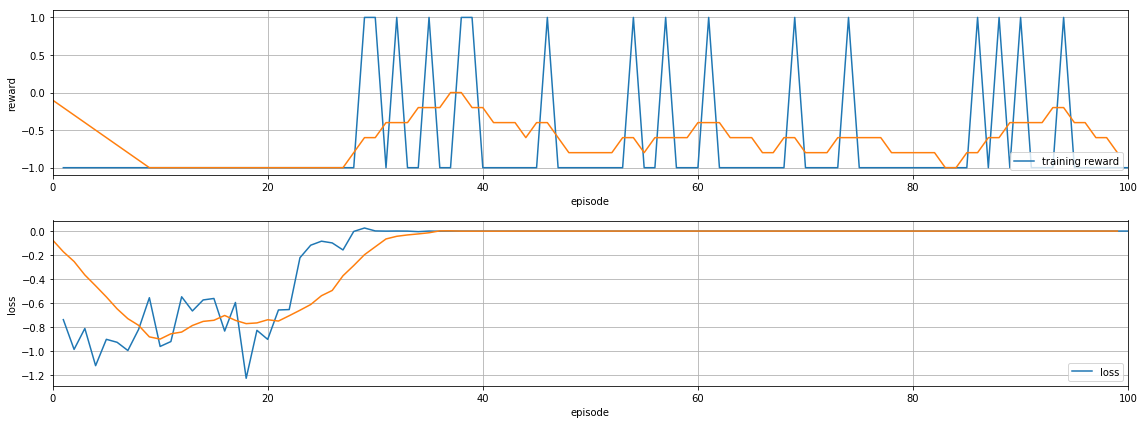

In [0]:
# plot results
import matplotlib.pyplot as plt

def moving_average(a, n=10) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret / n

plt.figure(figsize=(16,6))
plt.subplot(211)
plt.plot(range(1, len(training_rewards)+1), training_rewards, label='training reward')
plt.plot(moving_average(training_rewards))
plt.xlabel('episode'); plt.ylabel('reward')
plt.xlim((0, len(training_rewards)))
plt.legend(loc=4); plt.grid()
plt.subplot(212)
plt.plot(range(1, len(losses)+1), losses, label='loss')
plt.plot(moving_average(losses))
plt.xlabel('episode'); plt.ylabel('loss')
plt.xlim((0, len(losses)))
plt.legend(loc=4); plt.grid()
plt.tight_layout(); plt.show()